### loading dataset


In [3]:
import os
import pickle
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.feature_selection import RFE
import pickle



pickle_filename = 'dataset.pkl'

if os.path.exists(pickle_filename):
    with open(pickle_filename, 'rb') as file:
        df_tmp = pickle.load(file)
    print(f"Dataset loaded from {pickle_filename}")
else:
    excel_filename = 'H-1B_Disclosure_Data_FY2019.xlsx'
    df_tmp = pd.read_excel(excel_filename)
    
    with open(pickle_filename, 'wb') as file:
        pickle.dump(df_tmp, file)
    print(f"Dataset loaded from {excel_filename} and saved to {pickle_filename}")

df_tmp.head()

pickle_filename = 'dataset_new.pkl'

if os.path.exists(pickle_filename):
    with open(pickle_filename, 'rb') as file:
        df_tmp2 = pickle.load(file)
    print(f"Dataset loaded from {pickle_filename}")
else:
    excel_filename = 'H-1B_Disclosure_Data_FY2018_EOY.xlsx'
    df_tmp2 = pd.read_excel(excel_filename)
    
    with open(pickle_filename, 'wb') as file:
        pickle.dump(df_tmp2, file)
    print(f"Dataset loaded from {excel_filename} and saved to {pickle_filename}")

df_tmp2.head()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Dataset loaded from dataset.pkl
Dataset loaded from dataset_new.pkl


CASE_NUMBER CASE_STATUS CASE_SUBMITTED DECISION_DATE VISA_CLASS  \
0  I-200-18026-338377   CERTIFIED     2018-01-29    2018-02-02       H-1B   
1  I-200-17296-353451   CERTIFIED     2017-10-23    2017-10-27       H-1B   
2  I-200-18242-524477   CERTIFIED     2018-08-30    2018-09-06       H-1B   
3  I-200-18070-575236   CERTIFIED            NaT    2018-03-30       H-1B   
4  I-200-18243-850522   CERTIFIED     2018-08-31    2018-09-07       H-1B   

  EMPLOYMENT_START_DATE EMPLOYMENT_END_DATE                EMPLOYER_NAME  \
0            2018-07-28          2021-07-27        MICROSOFT CORPORATION   
1            2017-11-06          2020-11-06       ERNST & YOUNG U.S. LLP   
2            2018-09-10          2021-09-09                 LOGIXHUB LLC   
3            2018-09-10          2021-09-09  HEXAWARE TECHNOLOGIES, INC.   
4            2018-09-07          2021-09-06             ECLOUD LABS,INC.   

  EMPLOYER_BUSINESS_DBA       EMPLOYER_ADDRESS  ... H1B_DEPENDENT  \
0                   NaN        1 MICROSOFT WAY  ...             N   
1                   NaN        200 PLAZA DRIVE  ...             N   
2                   NaN       320 DECKER DRIVE  ...             N   
3                   NaN  101 WOOD AVENUE SOUTH  ...             Y   
4                   NaN      120 S WOOD AVENUE  ...             Y   

  WILLFUL_VIOLATOR SUPPORT_H1B LABOR_CON_AGREE PUBLIC_DISCLOSURE_LOCATION  \
0                N         NaN             NaN                        NaN   
1                N         NaN             NaN                        NaN   
2                N         NaN             NaN                        NaN   
3                N           Y             NaN                        NaN   
4                N           Y               Y                        NaN   

  WORKSITE_CITY WORKSITE_COUNTY WORKSITE_STATE WORKSITE_POSTAL_CODE  \
0       REDMOND            KING             WA                98052   
1   SANTA CLARA        SAN JOSE             CA                95110   
2        IRVING          DALLAS             TX                75062   
3    NEW CASTLE      NEW CASTLE             DE                19720   
4    BIRMINGHAM          SHELBY             AL                35244   

  ORIGINAL_CERT_DATE  
0                NaT  
1                NaT  
2                NaT  
3                NaT  
4                NaT  

[5 rows x 52 columns]

In [4]:
# Create the RFE model
def rfefunc(estimator, num_features,X,y ):
    rfe = RFE(estimator, n_features_to_select=num_features)
    # Fit the RFE model
    rfe.fit(X, y)

    # Get selected features
    selected_features = rfe.support_
    ranking = rfe.ranking_

    print("Selected Features:", selected_features)
    print("Feature Ranking:", ranking)
    return selected_features

In [5]:
df=df_tmp
df2=df_tmp2

In [6]:
print(df.shape)
df2.shape

(664616, 260)


(654360, 52)

In [7]:
df.head()

CASE_NUMBER CASE_STATUS CASE_SUBMITTED DECISION_DATE  \
0  I-200-16092-327771   WITHDRAWN     2016-04-08    2019-04-30   
1  I-203-17188-450729   WITHDRAWN     2017-07-14    2019-05-13   
2  I-203-17229-572307   WITHDRAWN     2017-08-23    2019-04-30   
3  I-203-17356-299648   WITHDRAWN     2017-12-22    2019-08-20   
4  I-203-18008-577576   WITHDRAWN     2018-01-10    2019-04-15   

  ORIGINAL_CERT_DATE      VISA_CLASS                    JOB_TITLE SOC_CODE  \
0                NaT            H-1B  ASSOCIATE CREATIVE DIRECTOR  11-2011   
1                NaT  E-3 Australian  ACCOUNT SUPERVISOR (MOTHER)  11-2011   
2                NaT  E-3 Australian  EXECUTIVE CREATIVE DIRECTOR  11-2011   
3                NaT  E-3 Australian      PROJECT MANAGEMENT LEAD  11-2011   
4                NaT  E-3 Australian        CREATIVE DIRECTOR, UX  11-2011   

                             SOC_TITLE FULL_TIME_POSITION  ...  \
0  ADVERTISING AND PROMOTIONS MANAGERS                  Y  ...   
1  ADVERTISING AND PROMOTIONS MANAGERS                  Y  ...   
2  ADVERTISING AND PROMOTIONS MANAGERS                  Y  ...   
3  ADVERTISING AND PROMOTIONS MANAGERS                  Y  ...   
4  ADVERTISING AND PROMOTIONS MANAGERS                  Y  ...   

  PW_OTHER_SOURCE_10 PW_NON-OES_YEAR_10  PW_SURVEY_PUBLISHER_10  \
0                NaN                NaN                     NaN   
1                NaN                NaN                     NaN   
2                NaN                NaN                     NaN   
3                NaN                NaN                     NaN   
4                NaN                NaN                     NaN   

  PW_SURVEY_NAME_10 H-1B_DEPENDENT  WILLFUL_VIOLATOR  SUPPORT_H1B  \
0               NaN              N                 N          NaN   
1               NaN            NaN               NaN          NaN   
2               NaN            NaN               NaN          NaN   
3               NaN            NaN               NaN          NaN   
4               NaN            NaN               NaN          NaN   

   STATUTORY_BASIS  MASTERS_EXEMPTION PUBLIC_DISCLOSURE  
0              NaN                NaN               NaN  
1              NaN                NaN               NaN  
2              NaN                NaN               NaN  
3              NaN                NaN               NaN  
4              NaN                NaN               NaN  

[5 rows x 260 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664616 entries, 0 to 664615
Columns: 260 entries, CASE_NUMBER to PUBLIC_DISCLOSURE
dtypes: datetime64[ns](3), float64(81), int64(3), object(173)
memory usage: 1.3+ GB


In [9]:
df.describe()

CASE_SUBMITTED                  DECISION_DATE  \
count                         664616                         664616   
mean   2019-02-28 18:43:46.180379392  2019-03-30 19:00:45.991277568   
min              2012-08-13 00:00:00            2018-10-01 00:00:00   
25%    2019-02-05 15:28:26.750000128     2019-02-19 06:47:24.500000   
50%              2019-03-13 19:18:08            2019-03-20 22:05:11   
75%    2019-05-08 18:58:33.750000128            2019-05-20 22:01:23   
max              2019-09-30 22:26:05            2019-09-30 22:26:05   
std                              NaN                            NaN   

                  ORIGINAL_CERT_DATE  TOTAL_WORKER_POSITIONS  \
count                          46946           664614.000000   
mean   2018-05-16 22:01:03.990350336                1.604953   
min              2014-03-10 00:00:00                1.000000   
25%              2017-10-26 00:00:00                1.000000   
50%              2018-08-06 00:00:00                1.000000   
75%              2019-03-12 22:04:45                1.000000   
max              2019-09-30 22:01:24              594.000000   
std                              NaN                4.422125   

       CHANGE_PREVIOUS_EMPLOYMENT  NEW_CONCURRENT_EMPLOYMENT  CHANGE_EMPLOYER  \
count               664616.000000              664615.000000    664616.000000   
mean                     0.121800                   0.013208         0.254923   
min                      0.000000                   0.000000         0.000000   
25%                      0.000000                   0.000000         0.000000   
50%                      0.000000                   0.000000         0.000000   
75%                      0.000000                   0.000000         0.000000   
max                    338.000000                  99.000000        99.000000   
std                      0.907174                   0.283244         1.109193   

       AMENDED_PETITION     NAICS_CODE  WORKSITE_WORKERS_1  ...  \
count     664616.000000  664614.000000       580900.000000  ...   
mean           0.223296  450965.588053            5.118612  ...   
min            0.000000      31.000000            1.000000  ...   
25%            0.000000  454111.000000            1.000000  ...   
50%            0.000000  541511.000000            1.000000  ...   
75%            0.000000  541512.000000            1.000000  ...   
max           99.000000  928120.000000       160500.000000  ...   
std            0.896687  190115.692575          489.230557  ...   

       PW_NON-OES_YEAR_9  PW_SURVEY_PUBLISHER_9  WORKSITE_WORKERS_10  \
count         303.000000              93.000000           288.000000   
mean         2018.412541            2018.161290             3.378472   
min          2018.000000            2013.000000             1.000000   
25%          2018.000000            2018.000000             1.000000   
50%          2018.000000            2018.000000             1.000000   
75%          2019.000000            2018.000000             1.000000   
max          2020.000000            2019.000000            45.000000   
std             0.550233               0.726671             5.718649   

       WORKSITE_POSTAL_CODE_10  WAGE_RATE_OF_PAY_FROM_10  \
count               288.000000                288.000000   
mean              47751.086806             121666.356007   
min                2115.000000                 11.200000   
25%               18510.000000              58067.190000   
50%               44011.000000              89718.050000   
75%               77786.000000             205500.000000   
max               99218.000000             525000.000000   
std               29978.676785             103333.352227   

       WAGE_RATE_OF_PAY_TO_10  PREVAILING_WAGE_10  PW_OES_YEAR_10  \
count              120.000000          288.000000       79.000000   
mean            124975.303417        87865.179583     2018.253165   
min                 11.200000            9.530000     2017.000000   
25%  

In [10]:
df_filtered2 = df2[df2['CASE_STATUS'] != 'CERTIFIED'].copy()
df_filtered2.rename(columns={
    'TOTAL_WORKERS': 'TOTAL_WORKER_POSITIONS',
    'H1B_DEPENDENT': 'H-1B_DEPENDENT',
    'NEW_CONCURRENT_EMP': 'NEW_CONCURRENT_EMPLOYMENT',
    'PREVAILING_WAGE': 'PREVAILING_WAGE_1',
    'WORKSITE_CITY': 'WORKSITE_CITY_1',
    'WORKSITE_STATE': 'WORKSITE_STATE_1',
    'PW_UNIT_OF_PAY': 'PW_UNIT_OF_PAY_1',
    'SOC_NAME': 'SOC_TITLE'
}, inplace=True)

df2 = df_filtered2

### Dropping columns with entries less than threshold

In [11]:

df=df.dropna(axis=1, thresh=100000)
# df2=df2.dropna(axis=1, thresh=100000)

In [12]:
print(df.shape)
df2.shape

(664616, 61)


(74911, 52)

In [13]:
df.describe()

CASE_SUBMITTED                  DECISION_DATE  \
count                         664616                         664616   
mean   2019-02-28 18:43:46.180379392  2019-03-30 19:00:45.991277568   
min              2012-08-13 00:00:00            2018-10-01 00:00:00   
25%    2019-02-05 15:28:26.750000128     2019-02-19 06:47:24.500000   
50%              2019-03-13 19:18:08            2019-03-20 22:05:11   
75%    2019-05-08 18:58:33.750000128            2019-05-20 22:01:23   
max              2019-09-30 22:26:05            2019-09-30 22:26:05   
std                              NaN                            NaN   

       TOTAL_WORKER_POSITIONS  CHANGE_PREVIOUS_EMPLOYMENT  \
count           664614.000000               664616.000000   
mean                 1.604953                    0.121800   
min                  1.000000                    0.000000   
25%                  1.000000                    0.000000   
50%                  1.000000                    0.000000   
75%                  1.000000                    0.000000   
max                594.000000                  338.000000   
std                  4.422125                    0.907174   

       NEW_CONCURRENT_EMPLOYMENT  CHANGE_EMPLOYER  AMENDED_PETITION  \
count              664615.000000    664616.000000     664616.000000   
mean                    0.013208         0.254923          0.223296   
min                     0.000000         0.000000          0.000000   
25%                     0.000000         0.000000          0.000000   
50%                     0.000000         0.000000          0.000000   
75%                     0.000000         0.000000          0.000000   
max                    99.000000        99.000000         99.000000   
std                     0.283244         1.109193          0.896687   

          NAICS_CODE  WORKSITE_WORKERS_1  WAGE_RATE_OF_PAY_FROM_1  \
count  664614.000000       580900.000000             6.646080e+05   
mean   450965.588053            5.118612             9.383640e+04   
min        31.000000            1.000000             7.500000e+00   
25%    454111.000000            1.000000             7.311200e+04   
50%    541511.000000            1.000000             9.000000e+04   
75%    541512.000000            1.000000             1.136720e+05   
max    928120.000000       160500.000000             3.300000e+06   
std    190115.692575          489.230557             4.708376e+04   

       WAGE_RATE_OF_PAY_TO_1  PREVAILING_WAGE_1  PW_NON-OES_YEAR_1  \
count           3.328550e+05      631369.000000       5.540460e+05   
mean            1.077588e+05       84331.625656       2.035588e+03   
min             0.000000e+00           7.250000       1.000000e+00   
25%             8.100000e+04       68578.000000       2.018000e+03   
50%             1.000000e+05       84240.000000       2.018000e+03   
75%             1.300000e+05      102648.000000       2.019000e+03   
max             3.000000e+06      849680.000000       8.731800e+06   
std             5.378552e+04       35950.599109       1.173290e+04   

       WAGE_RATE_OF_PAY_FROM_2  
count             1.018110e+05  
mean              1.025169e+05  
min               7.500000e+00  
25%               7.723000e+04  
50%               9.503500e+04  
75%               1.207500e+05  
max               3.500000e+06  
std               5.625230e+04

In [14]:
column_types = df.dtypes
# print(column_types)

with open('column_types.txt', 'w') as f:
    f.write("column_types per column:\n")
    f.write(column_types.to_string())


In [15]:
columns_to_select = [
    'CASE_STATUS',
    'VISA_CLASS',
    'NEW_EMPLOYMENT',
    'CONTINUED_EMPLOYMENT',
    'CHANGE_PREVIOUS_EMPLOYMENT',
    'NEW_CONCURRENT_EMPLOYMENT',
    'CHANGE_EMPLOYER',
    'AMENDED_PETITION',
    'EMPLOYER_NAME',
    'SOC_TITLE',
    'SOC_CODE',
    'JOB_TITLE',
    'AGENT_REPRESENTING_EMPLOYER',
    'WILLFUL_VIOLATOR',
    'H-1B_DEPENDENT',
    'TOTAL_WORKER_POSITIONS',
    'FULL_TIME_POSITION',
    'PREVAILING_WAGE_1',
    'PW_UNIT_OF_PAY_1',
    'WORKSITE_CITY_1',
    'WORKSITE_STATE_1',
]

df = df.loc[:, columns_to_select]
df2 = df2.loc[:, columns_to_select]

combined_df = pd.concat([df, df2], ignore_index=True)
print(combined_df.shape)
df = combined_df
df = df.dropna()

(739527, 21)


### filtering datapoints having binary entries for the given columns

In [16]:
columns_to_check = [
    'NEW_EMPLOYMENT',
    'CONTINUED_EMPLOYMENT',
    'CHANGE_PREVIOUS_EMPLOYMENT',
    'NEW_CONCURRENT_EMPLOYMENT',
    'CHANGE_EMPLOYER',
    'AMENDED_PETITION'
]

# Filter out rows where any of the specified columns are not 0 or 1
df_filtered = df[df[columns_to_check].isin([0, 1]).all(axis=1)]

df=df_filtered

df.shape

print("\nUnique values and their counts:")
print(df['CASE_STATUS'].value_counts())
# df.dropna()
# print(df['CASE_STATUS'].value_counts())



Unique values and their counts:
CASE_STATUS
CERTIFIED              504620
CERTIFIED-WITHDRAWN     61952
WITHDRAWN               34861
DENIED                  11387
Name: count, dtype: int64


In [17]:
value_counts = df['FULL_TIME_POSITION'].value_counts()
print(value_counts)

FULL_TIME_POSITION
Y    601669
N     11151
Name: count, dtype: int64


### mapping values to 0,1

In [18]:
# df['H-1B_DEPENDENT'] = df['H-1B_DEPENDENT'].replace({'Y': 1, 'N': 0})
# # df['PUBLIC_DISCLOSURE'] = df['PUBLIC_DISCLOSURE'].replace({'PLACE OF BUSINESS': 1, 'PLACE OF EMPLOYMENT': 0, 'BOTH': 2})
# df['WILLFUL_VIOLATOR'] = df['WILLFUL_VIOLATOR'].replace({'Y': 1, 'N': 0})
# df['AGENT_REPRESENTING_EMPLOYER'] = df['AGENT_REPRESENTING_EMPLOYER'].replace({'Y': 1, 'N': 0})
# df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].replace({'Y': 1, 'N': 0})
# Use .loc to avoid SettingWithCopyWarning and cast to int to handle downcasting warning
# Use .loc[] to avoid SettingWithCopyWarning and cast columns to int to avoid downcasting warning
# Drop rows with NaN values in specific columns
df = df.dropna(subset=['H-1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'AGENT_REPRESENTING_EMPLOYER', 'FULL_TIME_POSITION'])

# Now, you can perform the replacement and conversion without any NaN issues
df['H-1B_DEPENDENT'] = df['H-1B_DEPENDENT'].replace({'Y': 1, 'N': 0}).astype(int)
df['WILLFUL_VIOLATOR'] = df['WILLFUL_VIOLATOR'].replace({'Y': 1, 'N': 0}).astype(int)
df['AGENT_REPRESENTING_EMPLOYER'] = df['AGENT_REPRESENTING_EMPLOYER'].replace({'Y': 1, 'N': 0}).astype(int)
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].replace({'Y': 1, 'N': 0}).astype(int)



C:\Users\acer\AppData\Local\Temp\ipykernel_39308\1811469385.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['H-1B_DEPENDENT'] = df['H-1B_DEPENDENT'].replace({'Y': 1, 'N': 0}).astype(int)
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\1811469385.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['WILLFUL_VIOLATOR'] = df['WILLFUL_VIOLATOR'].replace({'Y': 1, 'N': 0}).astype(int)
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\1811469385.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be 

### plotting heatmap

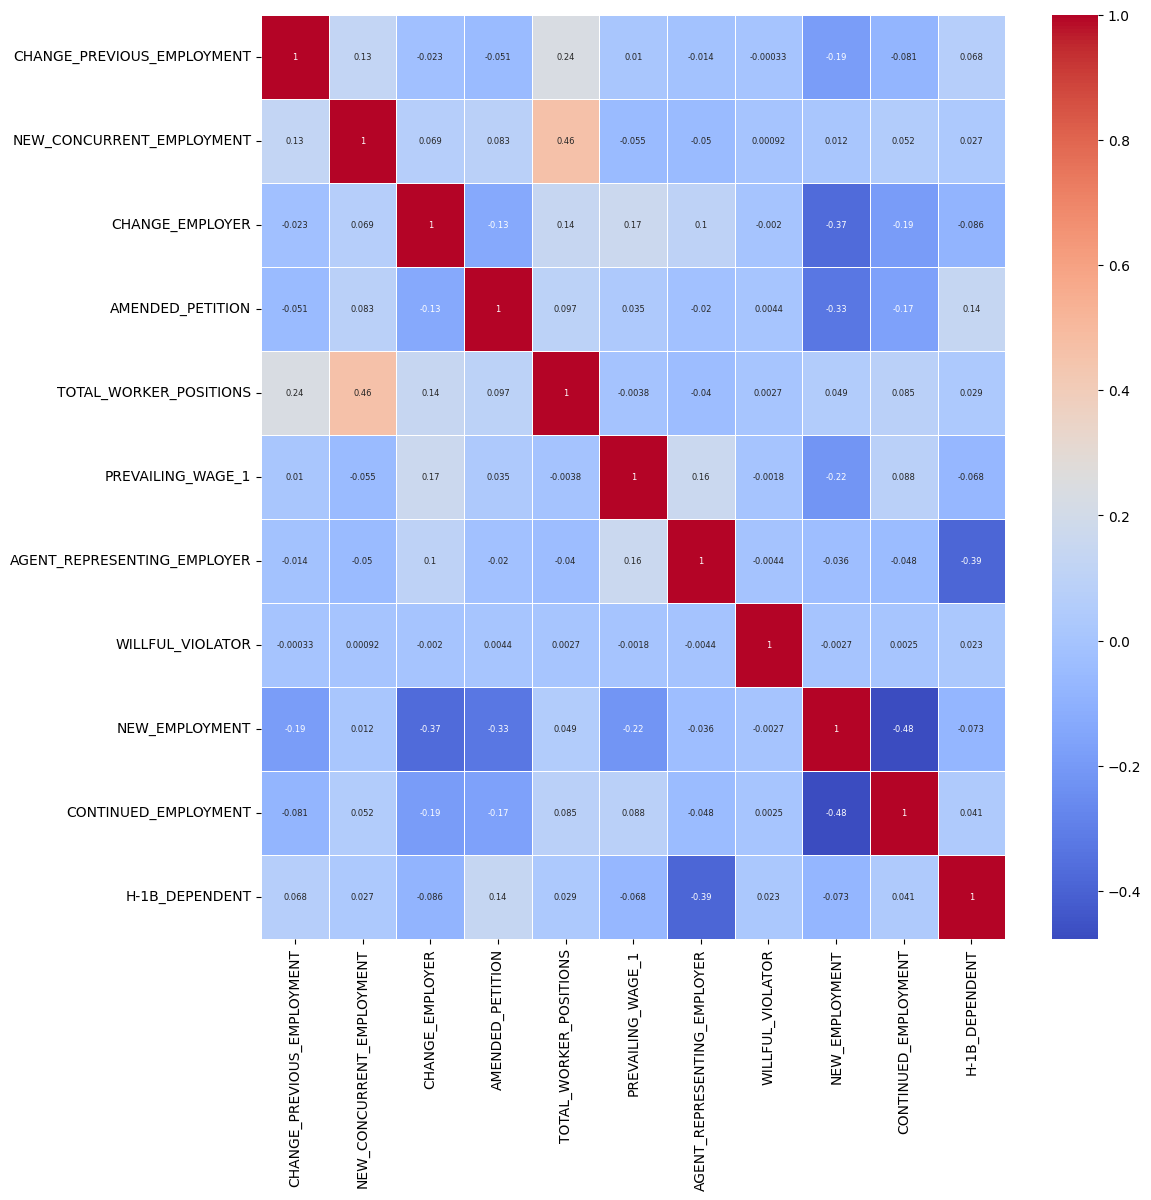

In [19]:
additional_columns = [
    'AGENT_REPRESENTING_EMPLOYER',
    'WILLFUL_VIOLATOR',
    'NEW_EMPLOYMENT',
    'CONTINUED_EMPLOYMENT',
    'CHANGE_PREVIOUS_EMPLOYMENT',
    'NEW_CONCURRENT_EMPLOYMENT',
    'CHANGE_EMPLOYER',
    'AMENDED_PETITION',
    'H-1B_DEPENDENT'
]

# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Add only the additional binary columns that are not already in df_numeric
additional_columns_to_add = [col for col in additional_columns if col not in df_numeric.columns]

# Concatenate df_numeric and the additional columns
df_numeric = pd.concat([df_numeric, df[additional_columns_to_add]], axis=1)

fig, ax = plt.subplots(figsize=(12, 12)) 
sns.heatmap(df_numeric.corr(), linewidths=0.5, annot=True, cmap="coolwarm", ax=ax,annot_kws={"size": 6})

plt.show()


### selected columns

In [20]:
# columns_to_select = [
#     'CASE_STATUS',
#     'VISA_CLASS',
#     'NEW_EMPLOYMENT',
#     'CONTINUED_EMPLOYMENT',
#     'CHANGE_PREVIOUS_EMPLOYMENT',
#     'NEW_CONCURRENT_EMPLOYMENT',
#     'CHANGE_EMPLOYER',
#     'AMENDED_PETITION',
#     'EMPLOYER_NAME',
#     'SOC_TITLE',
#     'SOC_CODE',
#     'JOB_TITLE',
#     'AGENT_REPRESENTING_EMPLOYER',
#     'WILLFUL_VIOLATOR',
#     'PUBLIC_DISCLOSURE',
#     'H-1B_DEPENDENT',
#     'TOTAL_WORKER_POSITIONS',
#     'FULL_TIME_POSITION',
#     'PREVAILING_WAGE_1',
#     'PW_UNIT_OF_PAY_1',
#     'WORKSITE_CITY_1',
#     'WORKSITE_STATE_1',
# ]

# df = df.loc[:, columns_to_select]
df['NEW_CONCURRENT_EMPLOYMENT'] = df['NEW_CONCURRENT_EMPLOYMENT'].astype(int)
df.head()


CASE_STATUS VISA_CLASS NEW_EMPLOYMENT CONTINUED_EMPLOYMENT  \
7    WITHDRAWN       H-1B              0                    1   
8    WITHDRAWN       H-1B              0                    1   
9    WITHDRAWN       H-1B              1                    0   
10   WITHDRAWN       H-1B              1                    0   
11   WITHDRAWN       H-1B              1                    0   

    CHANGE_PREVIOUS_EMPLOYMENT  NEW_CONCURRENT_EMPLOYMENT  CHANGE_EMPLOYER  \
7                            0                          0                0   
8                            0                          0                0   
9                            0                          0                0   
10                           0                          0                0   
11                           0                          0                0   

    AMENDED_PETITION                          EMPLOYER_NAME  \
7                  0                             KIIP, INC.   
8                  0  SUNSHINE SACHS & ASSOCIATES WEST, LLC   
9                  0           SOLAREDGE TECHNOLOGIES, INC.   
10                 0                              SOULSIGHT   
11                 0                        VF OUTDOOR, LLC   

                              SOC_TITLE  ...  \
7   ADVERTISING AND PROMOTIONS MANAGERS  ...   
8   ADVERTISING AND PROMOTIONS MANAGERS  ...   
9   ADVERTISING AND PROMOTIONS MANAGERS  ...   
10  ADVERTISING AND PROMOTIONS MANAGERS  ...   
11  ADVERTISING AND PROMOTIONS MANAGERS  ...   

                             JOB_TITLE AGENT_REPRESENTING_EMPLOYER  \
7         HEAD OF BUSINESS DEVELOPMENT                           1   
8       ACCOUNT DIRECTOR, SOCIAL MEDIA                           1   
9            PRODUCT MARKETING MANAGER                           1   
10  ASSOCIATE ACCOUNT STRATEGY MANAGER                           1   
11             SENIOR MANAGER, LOYALTY                           1   

    WILLFUL_VIOLATOR  H-1B_DEPENDENT  TOTAL_WORKER_POSITIONS  \
7                  0               0                     1.0   
8                  0               0                     1.0   
9                  0               0                     1.0   
10                 0               0                     1.0   
11                 0               0                     1.0   

    FULL_TIME_POSITION  PREVAILING_WAGE_1  PW_UNIT_OF_PAY_1 WORKSITE_CITY_1  \
7                    1           131685.0              Year   San Francisco   
8                    1            97365.0              Year     Los Angeles   
9                    1           126901.0              Year         Fremont   
10                   1            47549.0              Year         Chicago   
11                   1            97781.0              Year         Alameda   

   WORKSITE_STATE_1  
7        CALIFORNIA  
8        CALIFORNIA  
9        CALIFORNIA  
10         ILLINOIS  
11       CALIFORNIA  

[5 rows x 21 columns]

### converting wage to annual

In [21]:
# df.dropna(subset=['PREVAILING_WAGE_1'], inplace=True)
# wage_df = df.copy()

df.dropna(subset=['PREVAILING_WAGE_1'], inplace=True)

# Conversion rates to yearly wage
conversion_factors = {
    'Hour': 40 * 52,  # Assuming 40 hours per week, 52 weeks per year
    'Week': 52,       # 52 weeks in a year
    'Month': 12,      # 12 months in a year
    'Year': 1,        # Already in yearly unit
    'Bi-Weekly': 26   # 26 bi-weekly periods in a year
}

# Function to convert wages to yearly equivalent
def convert_to_yearly(row):
    unit = row['PW_UNIT_OF_PAY_1']
    wage = row['PREVAILING_WAGE_1']
    return wage * conversion_factors[unit]

# Apply the conversion and update both the PREVAILING_WAGE_1 and PW_UNIT_OF_PAY_1 columns
df.loc[:, 'PREVAILING_WAGE_1'] = df.apply(convert_to_yearly, axis=1)
df.loc[df['PW_UNIT_OF_PAY_1'] != 'Year', 'PW_UNIT_OF_PAY_1'] = 'Year'

In [22]:
df.head()

CASE_STATUS VISA_CLASS NEW_EMPLOYMENT CONTINUED_EMPLOYMENT  \
7    WITHDRAWN       H-1B              0                    1   
8    WITHDRAWN       H-1B              0                    1   
9    WITHDRAWN       H-1B              1                    0   
10   WITHDRAWN       H-1B              1                    0   
11   WITHDRAWN       H-1B              1                    0   

    CHANGE_PREVIOUS_EMPLOYMENT  NEW_CONCURRENT_EMPLOYMENT  CHANGE_EMPLOYER  \
7                            0                          0                0   
8                            0                          0                0   
9                            0                          0                0   
10                           0                          0                0   
11                           0                          0                0   

    AMENDED_PETITION                          EMPLOYER_NAME  \
7                  0                             KIIP, INC.   
8                  0  SUNSHINE SACHS & ASSOCIATES WEST, LLC   
9                  0           SOLAREDGE TECHNOLOGIES, INC.   
10                 0                              SOULSIGHT   
11                 0                        VF OUTDOOR, LLC   

                              SOC_TITLE  ...  \
7   ADVERTISING AND PROMOTIONS MANAGERS  ...   
8   ADVERTISING AND PROMOTIONS MANAGERS  ...   
9   ADVERTISING AND PROMOTIONS MANAGERS  ...   
10  ADVERTISING AND PROMOTIONS MANAGERS  ...   
11  ADVERTISING AND PROMOTIONS MANAGERS  ...   

                             JOB_TITLE AGENT_REPRESENTING_EMPLOYER  \
7         HEAD OF BUSINESS DEVELOPMENT                           1   
8       ACCOUNT DIRECTOR, SOCIAL MEDIA                           1   
9            PRODUCT MARKETING MANAGER                           1   
10  ASSOCIATE ACCOUNT STRATEGY MANAGER                           1   
11             SENIOR MANAGER, LOYALTY                           1   

    WILLFUL_VIOLATOR  H-1B_DEPENDENT  TOTAL_WORKER_POSITIONS  \
7                  0               0                     1.0   
8                  0               0                     1.0   
9                  0               0                     1.0   
10                 0               0                     1.0   
11                 0               0                     1.0   

    FULL_TIME_POSITION  PREVAILING_WAGE_1  PW_UNIT_OF_PAY_1 WORKSITE_CITY_1  \
7                    1           131685.0              Year   San Francisco   
8                    1            97365.0              Year     Los Angeles   
9                    1           126901.0              Year         Fremont   
10                   1            47549.0              Year         Chicago   
11                   1            97781.0              Year         Alameda   

   WORKSITE_STATE_1  
7        CALIFORNIA  
8        CALIFORNIA  
9        CALIFORNIA  
10         ILLINOIS  
11       CALIFORNIA  

[5 rows x 21 columns]

In [23]:
df['WORKSITE_CITY_1'] = df['WORKSITE_CITY_1'].str.upper()

df["WORKSITE_CITY_1"].value_counts
df.head()

unique_city = df["WORKSITE_CITY_1"].value_counts()

# print(unique_counts)

with open('unique_city.txt', 'w') as f:
    f.write("column_types per column:\n")
    f.write(unique_city.to_string())

# unique_cities = df["WORKSITE_CITY_1"].unique()

# with open('unique_city.txt', 'w') as f:
#     for city in unique_cities:
#         f.write(str(city) + '\n')  # No need for .toString()




In [24]:
unique_states = df["WORKSITE_STATE_1"].value_counts()

# print(unique_counts)

with open('unique_states.txt', 'w') as f:
    f.write("column_types per column:\n")
    f.write(unique_states.to_string())


In [25]:
df.shape

(612820, 21)

In [26]:
df=df.dropna()

### merging city and state

In [27]:
# map state abbreviations to full state names
state_hash = {
    "AK": "Alaska", "AL": "Alabama", "AR": "Arkansas", "AZ": "Arizona", "CA": "California", "CO": "Colorado",
    "CT": "Connecticut", "DC": "District of Columbia", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "IA": "Iowa", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "KS": "Kansas", "KY": "Kentucky",
    "LA": "Louisiana", "MA": "Massachusetts", "MD": "Maryland", "ME": "Maine", "MI": "Michigan", "MN": "Minnesota",
    "MO": "Missouri", "MS": "Mississippi", "MT": "Montana", "NC": "North Carolina", "ND": "North Dakota",
    "NE": "Nebraska", "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NV": "Nevada",
    "NY": "New York", "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "PR": "Puerto Rico",
    "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas",
    "UT": "Utah", "VA": "Virginia", "VT": "Vermont", "WA": "Washington", "WI": "Wisconsin", 
    "WV": "West Virginia", "WY": "Wyoming"
}

# Map the WORKSITE_STATE to full state names
df['WORKSITE_STATE_FULL'] = df['WORKSITE_STATE_1'].map(lambda x: state_hash.get(x, x)).str.upper()

# Rename WORKSITE_STATE column to WORKSITE_STATE_ABB
df.rename(columns={'WORKSITE_STATE_1': 'WORKSITE_STATE_ABB'}, inplace=True)

def site_merge(city, state_full):
    return f"{city}, {state_full}"

# Apply the site_merge function to create a new WORKSITE column
df['WORKSITE'] = df.apply(lambda row: site_merge(row['WORKSITE_CITY_1'], row['WORKSITE_STATE_FULL']), axis=1)
df['WORKSITE'] = df['WORKSITE'].str.upper()

# print(df)


In [28]:
df.head()

CASE_STATUS VISA_CLASS NEW_EMPLOYMENT CONTINUED_EMPLOYMENT  \
7    WITHDRAWN       H-1B              0                    1   
8    WITHDRAWN       H-1B              0                    1   
9    WITHDRAWN       H-1B              1                    0   
10   WITHDRAWN       H-1B              1                    0   
11   WITHDRAWN       H-1B              1                    0   

    CHANGE_PREVIOUS_EMPLOYMENT  NEW_CONCURRENT_EMPLOYMENT  CHANGE_EMPLOYER  \
7                            0                          0                0   
8                            0                          0                0   
9                            0                          0                0   
10                           0                          0                0   
11                           0                          0                0   

    AMENDED_PETITION                          EMPLOYER_NAME  \
7                  0                             KIIP, INC.   
8                  0  SUNSHINE SACHS & ASSOCIATES WEST, LLC   
9                  0           SOLAREDGE TECHNOLOGIES, INC.   
10                 0                              SOULSIGHT   
11                 0                        VF OUTDOOR, LLC   

                              SOC_TITLE  ... WILLFUL_VIOLATOR H-1B_DEPENDENT  \
7   ADVERTISING AND PROMOTIONS MANAGERS  ...                0              0   
8   ADVERTISING AND PROMOTIONS MANAGERS  ...                0              0   
9   ADVERTISING AND PROMOTIONS MANAGERS  ...                0              0   
10  ADVERTISING AND PROMOTIONS MANAGERS  ...                0              0   
11  ADVERTISING AND PROMOTIONS MANAGERS  ...                0              0   

    TOTAL_WORKER_POSITIONS  FULL_TIME_POSITION  PREVAILING_WAGE_1  \
7                      1.0                   1           131685.0   
8                      1.0                   1            97365.0   
9                      1.0                   1           126901.0   
10                     1.0                   1            47549.0   
11                     1.0                   1            97781.0   

    PW_UNIT_OF_PAY_1  WORKSITE_CITY_1  WORKSITE_STATE_ABB WORKSITE_STATE_FULL  \
7               Year    SAN FRANCISCO          CALIFORNIA          CALIFORNIA   
8               Year      LOS ANGELES          CALIFORNIA          CALIFORNIA   
9               Year          FREMONT          CALIFORNIA          CALIFORNIA   
10              Year          CHICAGO            ILLINOIS            ILLINOIS   
11              Year          ALAMEDA          CALIFORNIA          CALIFORNIA   

                     WORKSITE  
7   SAN FRANCISCO, CALIFORNIA  
8     LOS ANGELES, CALIFORNIA  
9         FREMONT, CALIFORNIA  
10          CHICAGO, ILLINOIS  
11        ALAMEDA, CALIFORNIA  

[5 rows x 23 columns]

In [29]:
wrong_names = ["NEW YROK, NEW YORK", "SUUNYVALE, CALIFORNIA", "SAN FRANSISCO, CALIFORNIA"]

# Filter and group by WORKSITE, then count occurrences
result = (df[df['WORKSITE'].isin(wrong_names)]
          .groupby('WORKSITE')
          .size()
          .reset_index(name='count'))

print(result)

                    WORKSITE  count
0         NEW YROK, NEW YORK      1
1  SAN FRANSISCO, CALIFORNIA     17
2      SUUNYVALE, CALIFORNIA      1


### trying to fix wrong city names. Failure

In [30]:

# import pandas as pd
# import os
# from gpt4all import GPT4All

# # Load the model (ensure that you have the model downloaded and configured)
# # installation_path = os.path.dirname(gpt4all.__file__)
# gpt4all_model = GPT4All("Meta-Llama-3-8B-Instruct.Q4_0.gguf")

# # Function to get the corrected site name from GPT4All
# def get_corrected_site(site):
#     try:
#         prompt = f"Please suggest the correct name for the site: '{site}'."
#         corrected_name = gpt4all_model.generate(prompt)
#         print(corrected_name)
#         return corrected_name.strip()
#     except Exception as e:
#         print(f"Error retrieving corrected name for {site}: {e}")
#         return site  # Return original if there's an error

# # Sample DataFrame to simulate your sites_count DataFrame
# # data = {'WORKSITE': ['worksite', 'workste', 'worksit', 'worst', 'site', 'work']}
# sites_count = pd.DataFrame(df)

# # Create lists to store original and corrected sites
# sites_before = []
# sites_after = []

# # Loop through each site and get the corrected name
# for site in sites_count['WORKSITE']:
#     corrected = get_corrected_site(site)
#     if corrected != site:  # Only log if a correction occurred
#         sites_before.append(site)
#         sites_after.append(corrected)

# # Create a dictionary to map corrected sites
# sites_corrected_dict = dict(zip(sites_before, sites_after))

# # Print the corrected sites
# print("Corrected Sites:")
# for before, after in sites_corrected_dict.items():
#     print(f"{before} -> {after}")


In [31]:
# # Function to correct worksite using the hash
# def worksite_correct(x, hash_dict):
#     return hash_dict.get(x, x)

# # Apply the correction to the WORKSITE column
# df['WORKSITE_CORRECTED'] = df['WORKSITE'].apply(worksite_correct, hash_dict=sites_corrected_dict)

# # Remove the original WORKSITE column and rename WORKSITE_CORRECTED to WORKSITE
# df = df.drop(columns='WORKSITE').rename(columns={'WORKSITE_CORRECTED': 'WORKSITE'})

# # Display the corrected DataFrame
# # print(df)

In [32]:
df.head()

CASE_STATUS VISA_CLASS NEW_EMPLOYMENT CONTINUED_EMPLOYMENT  \
7    WITHDRAWN       H-1B              0                    1   
8    WITHDRAWN       H-1B              0                    1   
9    WITHDRAWN       H-1B              1                    0   
10   WITHDRAWN       H-1B              1                    0   
11   WITHDRAWN       H-1B              1                    0   

    CHANGE_PREVIOUS_EMPLOYMENT  NEW_CONCURRENT_EMPLOYMENT  CHANGE_EMPLOYER  \
7                            0                          0                0   
8                            0                          0                0   
9                            0                          0                0   
10                           0                          0                0   
11                           0                          0                0   

    AMENDED_PETITION                          EMPLOYER_NAME  \
7                  0                             KIIP, INC.   
8                  0  SUNSHINE SACHS & ASSOCIATES WEST, LLC   
9                  0           SOLAREDGE TECHNOLOGIES, INC.   
10                 0                              SOULSIGHT   
11                 0                        VF OUTDOOR, LLC   

                              SOC_TITLE  ... WILLFUL_VIOLATOR H-1B_DEPENDENT  \
7   ADVERTISING AND PROMOTIONS MANAGERS  ...                0              0   
8   ADVERTISING AND PROMOTIONS MANAGERS  ...                0              0   
9   ADVERTISING AND PROMOTIONS MANAGERS  ...                0              0   
10  ADVERTISING AND PROMOTIONS MANAGERS  ...                0              0   
11  ADVERTISING AND PROMOTIONS MANAGERS  ...                0              0   

    TOTAL_WORKER_POSITIONS  FULL_TIME_POSITION  PREVAILING_WAGE_1  \
7                      1.0                   1           131685.0   
8                      1.0                   1            97365.0   
9                      1.0                   1           126901.0   
10                     1.0                   1            47549.0   
11                     1.0                   1            97781.0   

    PW_UNIT_OF_PAY_1  WORKSITE_CITY_1  WORKSITE_STATE_ABB WORKSITE_STATE_FULL  \
7               Year    SAN FRANCISCO          CALIFORNIA          CALIFORNIA   
8               Year      LOS ANGELES          CALIFORNIA          CALIFORNIA   
9               Year          FREMONT          CALIFORNIA          CALIFORNIA   
10              Year          CHICAGO            ILLINOIS            ILLINOIS   
11              Year          ALAMEDA          CALIFORNIA          CALIFORNIA   

                     WORKSITE  
7   SAN FRANCISCO, CALIFORNIA  
8     LOS ANGELES, CALIFORNIA  
9         FREMONT, CALIFORNIA  
10          CHICAGO, ILLINOIS  
11        ALAMEDA, CALIFORNIA  

[5 rows x 23 columns]

In [33]:
wrong_names = ["NEW YROK, NEW YORK", "SUUNYVALE, CALIFORNIA", "SAN FRANSISCO, CALIFORNIA"]

# Filter and group by WORKSITE, then count occurrences
result = (df[df['WORKSITE'].isin(wrong_names)]
          .groupby('WORKSITE')
          .size()
          .reset_index(name='count'))

# Display the result
print(result)

                    WORKSITE  count
0         NEW YROK, NEW YORK      1
1  SAN FRANSISCO, CALIFORNIA     17
2      SUUNYVALE, CALIFORNIA      1


In [34]:
unique_worksite = df["WORKSITE"].value_counts()
# print(unique_counts)

with open('unique_worksite.txt', 'w') as f:
    f.write("column_types per column:\n")
    f.write(unique_worksite.to_string())


### finding latitude and longitude of worksite

In [35]:
us_cities_df = pd.read_csv('uscitieslatlong.csv')  
us_cities_df = us_cities_df.rename(columns={'city': 'WORKSITE_CITY_1', 'state_name': 'WORKSITE_STATE_FULL'})


us_cities_df['WORKSITE_CITY_1'] = us_cities_df['WORKSITE_CITY_1'].str.upper()
us_cities_df['WORKSITE_STATE_FULL'] = us_cities_df['WORKSITE_STATE_FULL'].str.upper()

# Merge the dataframes on city and state
df = pd.merge(df, us_cities_df[['WORKSITE_CITY_1', 'WORKSITE_STATE_FULL', 'lat', 'lng']],
                            on=['WORKSITE_CITY_1', 'WORKSITE_STATE_FULL'], how='left')

missing_lat_long = df[df['lat'].isna() | df['lng'].isna()]

missing_lat_long.head()

# Count rows where either 'lat' or 'lng' is NaN
nan_count = df[['lat', 'lng']].isna().any(axis=1).sum()

print(f"Number of rows with NaN in either 'lat' or 'lng': {nan_count}")

df.head()


Number of rows with NaN in either 'lat' or 'lng': 51796


CASE_STATUS VISA_CLASS NEW_EMPLOYMENT CONTINUED_EMPLOYMENT  \
0   WITHDRAWN       H-1B              0                    1   
1   WITHDRAWN       H-1B              0                    1   
2   WITHDRAWN       H-1B              1                    0   
3   WITHDRAWN       H-1B              1                    0   
4   WITHDRAWN       H-1B              1                    0   

   CHANGE_PREVIOUS_EMPLOYMENT  NEW_CONCURRENT_EMPLOYMENT  CHANGE_EMPLOYER  \
0                           0                          0                0   
1                           0                          0                0   
2                           0                          0                0   
3                           0                          0                0   
4                           0                          0                0   

   AMENDED_PETITION                          EMPLOYER_NAME  \
0                 0                             KIIP, INC.   
1                 0  SUNSHINE SACHS & ASSOCIATES WEST, LLC   
2                 0           SOLAREDGE TECHNOLOGIES, INC.   
3                 0                              SOULSIGHT   
4                 0                        VF OUTDOOR, LLC   

                             SOC_TITLE  ... TOTAL_WORKER_POSITIONS  \
0  ADVERTISING AND PROMOTIONS MANAGERS  ...                    1.0   
1  ADVERTISING AND PROMOTIONS MANAGERS  ...                    1.0   
2  ADVERTISING AND PROMOTIONS MANAGERS  ...                    1.0   
3  ADVERTISING AND PROMOTIONS MANAGERS  ...                    1.0   
4  ADVERTISING AND PROMOTIONS MANAGERS  ...                    1.0   

  FULL_TIME_POSITION  PREVAILING_WAGE_1  PW_UNIT_OF_PAY_1  WORKSITE_CITY_1  \
0                  1           131685.0              Year    SAN FRANCISCO   
1                  1            97365.0              Year      LOS ANGELES   
2                  1           126901.0              Year          FREMONT   
3                  1            47549.0              Year          CHICAGO   
4                  1            97781.0              Year          ALAMEDA   

   WORKSITE_STATE_ABB  WORKSITE_STATE_FULL                   WORKSITE  \
0          CALIFORNIA           CALIFORNIA  SAN FRANCISCO, CALIFORNIA   
1          CALIFORNIA           CALIFORNIA    LOS ANGELES, CALIFORNIA   
2          CALIFORNIA           CALIFORNIA        FREMONT, CALIFORNIA   
3            ILLINOIS             ILLINOIS          CHICAGO, ILLINOIS   
4          CALIFORNIA           CALIFORNIA        ALAMEDA, CALIFORNIA   

       lat       lng  
0  37.7558 -122.4449  
1  34.1141 -118.4068  
2  37.5265 -121.9843  
3  41.8375  -87.6866  
4  37.7668 -122.2670  

[5 rows x 25 columns]

### for missing worksites, lat and long mapped to state mean

In [36]:
state_coords = {
    'ALABAMA': (32.806671, -86.791368),  'ALASKA': (61.370716, -152.404419),  'ARIZONA': (33.729759, -111.431221),  'ARKANSAS': (34.969704, -92.373123),  'CALIFORNIA': (36.116203, -119.681564),
    'COLORADO': (39.059811, -105.311104),  'CONNECTICUT': (41.597782, -72.755371),  'DELAWARE': (39.318523, -75.507141),  'DISTRICT OF COLUMBIA': (38.897438, -77.026168),  'FLORIDA': (27.766279, -81.686783),
    'GEORGIA': (33.040619, -83.643074),  'HAWAII': (21.094318, -157.498337),  'IDAHO': (44.240459, -114.478828),  'ILLINOIS': (40.349457, -88.998024),  'INDIANA': (39.849426, -86.258278),
    'IOWA': (42.011539, -93.210526),  'KANSAS': (39.063946, -98.386291),  'KENTUCKY': (37.668140, -84.670067),  'LOUISIANA': (31.169546, -91.867805),  'MAINE': (44.693742, -69.381927),
    'MARYLAND': (39.063946, -76.802101),  'MASSACHUSETTS': (42.230171, -71.530106),  'MICHIGAN': (43.326618, -84.536095),  'MINNESOTA': (45.694454, -93.900192),  'MISSISSIPPI': (32.741646, -89.678696),
    'MISSOURI': (38.456085, -92.288368),  'MONTANA': (46.921925, -110.454353),  'NEBRASKA': (41.125370, -98.268082),  'NEVADA': (38.313515, -117.055374),  'NEW HAMPSHIRE': (43.452492, -71.563896),
    'NEW JERSEY': (40.298904, -74.521011),  'NEW MEXICO': (34.840515, -106.248482),  'NEW YORK': (42.165726, -74.948051),  'NORTH CAROLINA': (35.630066, -79.806419),  'NORTH DAKOTA': (47.528912, -99.784012),
    'OHIO': (40.388783, -82.764915),  'OKLAHOMA': (35.565342, -96.928917),  'OREGON': (43.934493, -120.558201),  'PENNSYLVANIA': (40.590752, -77.209755),  'RHODE ISLAND': (41.680893, -71.511780),
    'SOUTH CAROLINA': (33.856892, -80.945007),  'SOUTH DAKOTA': (44.299782, -99.438828),  'TENNESSEE': (35.747845, -86.692345),  'TEXAS': (31.054487, -97.563461),  'UTAH': (40.150032, -111.862434),
    'VERMONT': (44.045876, -72.710686),  'VIRGINIA': (37.769337, -78.169968),  'WASHINGTON': (47.400902, -121.490494),  'WEST VIRGINIA': (38.491226, -80.954201),  'WISCONSIN': (44.268543, -89.616508),
    'WYOMING': (42.755966, -107.302490)
}


def get_state(worksite):
    return worksite.split(",")[-1].strip()  

# Fill missing lat/lng with state coordinates
for state, (lat, lng) in state_coords.items():
    df.loc[(df['WORKSITE_STATE_FULL'] == state) & (df['lat'].isna()), 'lat'] = lat
    df.loc[(df['WORKSITE_STATE_FULL'] == state) & (df['lng'].isna()), 'lng'] = lng

df.head()

# Count rows where either 'lat' or 'lng' is NaN
nan_count = df[['lat', 'lng']].isna().any(axis=1).sum()

print(f"Number of rows with NaN in either 'lat' or 'lng': {nan_count}")




Number of rows with NaN in either 'lat' or 'lng': 539


In [37]:
df.head()

CASE_STATUS VISA_CLASS NEW_EMPLOYMENT CONTINUED_EMPLOYMENT  \
0   WITHDRAWN       H-1B              0                    1   
1   WITHDRAWN       H-1B              0                    1   
2   WITHDRAWN       H-1B              1                    0   
3   WITHDRAWN       H-1B              1                    0   
4   WITHDRAWN       H-1B              1                    0   

   CHANGE_PREVIOUS_EMPLOYMENT  NEW_CONCURRENT_EMPLOYMENT  CHANGE_EMPLOYER  \
0                           0                          0                0   
1                           0                          0                0   
2                           0                          0                0   
3                           0                          0                0   
4                           0                          0                0   

   AMENDED_PETITION                          EMPLOYER_NAME  \
0                 0                             KIIP, INC.   
1                 0  SUNSHINE SACHS & ASSOCIATES WEST, LLC   
2                 0           SOLAREDGE TECHNOLOGIES, INC.   
3                 0                              SOULSIGHT   
4                 0                        VF OUTDOOR, LLC   

                             SOC_TITLE  ... TOTAL_WORKER_POSITIONS  \
0  ADVERTISING AND PROMOTIONS MANAGERS  ...                    1.0   
1  ADVERTISING AND PROMOTIONS MANAGERS  ...                    1.0   
2  ADVERTISING AND PROMOTIONS MANAGERS  ...                    1.0   
3  ADVERTISING AND PROMOTIONS MANAGERS  ...                    1.0   
4  ADVERTISING AND PROMOTIONS MANAGERS  ...                    1.0   

  FULL_TIME_POSITION  PREVAILING_WAGE_1  PW_UNIT_OF_PAY_1  WORKSITE_CITY_1  \
0                  1           131685.0              Year    SAN FRANCISCO   
1                  1            97365.0              Year      LOS ANGELES   
2                  1           126901.0              Year          FREMONT   
3                  1            47549.0              Year          CHICAGO   
4                  1            97781.0              Year          ALAMEDA   

   WORKSITE_STATE_ABB  WORKSITE_STATE_FULL                   WORKSITE  \
0          CALIFORNIA           CALIFORNIA  SAN FRANCISCO, CALIFORNIA   
1          CALIFORNIA           CALIFORNIA    LOS ANGELES, CALIFORNIA   
2          CALIFORNIA           CALIFORNIA        FREMONT, CALIFORNIA   
3            ILLINOIS             ILLINOIS          CHICAGO, ILLINOIS   
4          CALIFORNIA           CALIFORNIA        ALAMEDA, CALIFORNIA   

       lat       lng  
0  37.7558 -122.4449  
1  34.1141 -118.4068  
2  37.5265 -121.9843  
3  41.8375  -87.6866  
4  37.7668 -122.2670  

[5 rows x 25 columns]

### finding cost of living index(COLI) with respect to cities

In [38]:
# Function to map state abbreviations to full state names
def get_full_state_name(state_abbreviation, state_hash):
    return state_hash.get(state_abbreviation.upper(), None)

# Function to merge city and state into a WORKSITE
def site_merge(city, state):
    if pd.isna(city) or pd.isna(state):
        return None
    return f"{city}, {state}"


coli_data = pd.read_csv("coli.csv", dtype=str)

# Strip all spaces from entries in the DataFrame
coli_data = coli_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


# Select and rename columns to match our dataframe
coli_data = coli_data[['City', 'State', 'Cost of Living Index']].rename(columns={
    'City': 'WORKSITE_CITY',
    'State': 'WORKSITE_STATE_ABB',
    'Cost of Living Index': 'COLI'
})

# Map state abbreviation to full state name
coli_data['WORKSITE_STATE_FULL'] = coli_data['WORKSITE_STATE_ABB'].apply(lambda x: get_full_state_name(x, state_hash))

with open('worksite_state_full.txt', 'w') as file:
    for state in coli_data['WORKSITE_STATE_FULL']:
        file.write(f"{state}\n")

# Create WORKSITE column by merging city and state
coli_data['WORKSITE'] = coli_data.apply(lambda row: site_merge(row['WORKSITE_CITY'].upper(), row['WORKSITE_STATE_FULL'].upper()), axis=1)
with open('workdvdfbvdfbs.txt', 'w') as file:
    for state in coli_data['WORKSITE']:
        file.write(f"{state}\n")

# Keep only WORKSITE and COLI columns
coli_data = coli_data[['WORKSITE', 'COLI']]

# print(coli_data)

# Perform the left join on WORKSITE
df= df.merge(coli_data, on="WORKSITE", how="left")

nan_count = df['COLI'].isna().sum()

print(f"Number of NaN values in COLI column: {nan_count}")

Number of NaN values in COLI column: 346382


C:\Users\acer\AppData\Local\Temp\ipykernel_39308\51625080.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coli_data = coli_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### finding coli with respect to states for missing values

In [39]:
# Load the COLI CSV file that contains state-level COLI data
coli_state_data = pd.read_csv("coli_state.csv")  

# Create a mapping of state abbreviation to COLI value
state_coli_mapping = dict(zip(coli_state_data['state'].str.upper(), coli_state_data['CostOfLivingIndex2023']))

# Fill NaN values in COLI using the state mapping
df['COLI'] = df.apply(lambda row: state_coli_mapping.get(row['WORKSITE_STATE_FULL'], row['COLI']) 
                           if pd.isna(row['COLI']) else row['COLI'], axis=1)

df.head()
with open('workdvdfbvdfbs.txt', 'w') as file:
    for state in df['COLI']:
        file.write(f"{state}\n")

nan_count = df['COLI'].isna().sum()

print(f"Number of NaN values in COLI column: {nan_count}")

Number of NaN values in COLI column: 639


### dropping all NaN rows

In [40]:
df=df.dropna()
df.head()

CASE_STATUS VISA_CLASS NEW_EMPLOYMENT CONTINUED_EMPLOYMENT  \
0   WITHDRAWN       H-1B              0                    1   
1   WITHDRAWN       H-1B              0                    1   
2   WITHDRAWN       H-1B              1                    0   
3   WITHDRAWN       H-1B              1                    0   
4   WITHDRAWN       H-1B              1                    0   

   CHANGE_PREVIOUS_EMPLOYMENT  NEW_CONCURRENT_EMPLOYMENT  CHANGE_EMPLOYER  \
0                           0                          0                0   
1                           0                          0                0   
2                           0                          0                0   
3                           0                          0                0   
4                           0                          0                0   

   AMENDED_PETITION                          EMPLOYER_NAME  \
0                 0                             KIIP, INC.   
1                 0  SUNSHINE SACHS & ASSOCIATES WEST, LLC   
2                 0           SOLAREDGE TECHNOLOGIES, INC.   
3                 0                              SOULSIGHT   
4                 0                        VF OUTDOOR, LLC   

                             SOC_TITLE  ... FULL_TIME_POSITION  \
0  ADVERTISING AND PROMOTIONS MANAGERS  ...                  1   
1  ADVERTISING AND PROMOTIONS MANAGERS  ...                  1   
2  ADVERTISING AND PROMOTIONS MANAGERS  ...                  1   
3  ADVERTISING AND PROMOTIONS MANAGERS  ...                  1   
4  ADVERTISING AND PROMOTIONS MANAGERS  ...                  1   

  PREVAILING_WAGE_1  PW_UNIT_OF_PAY_1  WORKSITE_CITY_1  WORKSITE_STATE_ABB  \
0          131685.0              Year    SAN FRANCISCO          CALIFORNIA   
1           97365.0              Year      LOS ANGELES          CALIFORNIA   
2          126901.0              Year          FREMONT          CALIFORNIA   
3           47549.0              Year          CHICAGO            ILLINOIS   
4           97781.0              Year          ALAMEDA          CALIFORNIA   

   WORKSITE_STATE_FULL                   WORKSITE      lat       lng   COLI  
0           CALIFORNIA  SAN FRANCISCO, CALIFORNIA  37.7558 -122.4449  178.6  
1           CALIFORNIA    LOS ANGELES, CALIFORNIA  34.1141 -118.4068  140.6  
2           CALIFORNIA        FREMONT, CALIFORNIA  37.5265 -121.9843  134.5  
3             ILLINOIS          CHICAGO, ILLINOIS  41.8375  -87.6866  100.1  
4           CALIFORNIA        ALAMEDA, CALIFORNIA  37.7668 -122.2670  134.5  

[5 rows x 26 columns]

### dropping columns that are unnecessary

In [41]:
df.drop(['SOC_TITLE', 'WORKSITE_CITY_1','PW_UNIT_OF_PAY_1', 'WORKSITE_STATE_ABB', 'WORKSITE_STATE_FULL'], axis=1, inplace=True)


### mapping CASE_STATUS values

In [42]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2, 'WITHDRAWN' : 3})

df.head()

CASE_STATUS VISA_CLASS NEW_EMPLOYMENT CONTINUED_EMPLOYMENT  \
0            3       H-1B              0                    1   
1            3       H-1B              0                    1   
2            3       H-1B              1                    0   
3            3       H-1B              1                    0   
4            3       H-1B              1                    0   

   CHANGE_PREVIOUS_EMPLOYMENT  NEW_CONCURRENT_EMPLOYMENT  CHANGE_EMPLOYER  \
0                           0                          0                0   
1                           0                          0                0   
2                           0                          0                0   
3                           0                          0                0   
4                           0                          0                0   

   AMENDED_PETITION                          EMPLOYER_NAME SOC_CODE  ...  \
0                 0                             KIIP, INC.  11-2011  ...   
1                 0  SUNSHINE SACHS & ASSOCIATES WEST, LLC  11-2011  ...   
2                 0           SOLAREDGE TECHNOLOGIES, INC.  11-2011  ...   
3                 0                              SOULSIGHT  11-2011  ...   
4                 0                        VF OUTDOOR, LLC  11-2011  ...   

  AGENT_REPRESENTING_EMPLOYER  WILLFUL_VIOLATOR  H-1B_DEPENDENT  \
0                           1                 0               0   
1                           1                 0               0   
2                           1                 0               0   
3                           1                 0               0   
4                           1                 0               0   

   TOTAL_WORKER_POSITIONS  FULL_TIME_POSITION  PREVAILING_WAGE_1  \
0                     1.0                   1           131685.0   
1                     1.0                   1            97365.0   
2                     1.0                   1           126901.0   
3                     1.0                   1            47549.0   
4                     1.0                   1            97781.0   

                    WORKSITE      lat       lng   COLI  
0  SAN FRANCISCO, CALIFORNIA  37.7558 -122.4449  178.6  
1    LOS ANGELES, CALIFORNIA  34.1141 -118.4068  140.6  
2        FREMONT, CALIFORNIA  37.5265 -121.9843  134.5  
3          CHICAGO, ILLINOIS  41.8375  -87.6866  100.1  
4        ALAMEDA, CALIFORNIA  37.7668 -122.2670  134.5  

[5 rows x 21 columns]

In [43]:
import pandas as pd

# Example DataFrame
# df = pd.read_csv('your_file.csv')  # Load your DataFrame

# Separate rows where case_status == 0
case_status_0 = df[df['CASE_STATUS'] == 0]

# Randomly sample 100,000 rows where case_status == 0
sampled_case_status_0 = case_status_0.sample(n=120000, random_state=42)

# Retain all rows where case_status != 0
other_case_status = df[df['CASE_STATUS'] != 0]

# Combine the sampled rows with the other rows
result_df = pd.concat([sampled_case_status_0, other_case_status], ignore_index=True)

# Shuffle the combined DataFrame if needed
result_df = result_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save or proceed with the new DataFrame
# result_df.to_csv('filtered_data.csv', index=False)
df=result_df

In [44]:
df.describe()

CASE_STATUS  CHANGE_PREVIOUS_EMPLOYMENT  NEW_CONCURRENT_EMPLOYMENT  \
count  228127.000000               228127.000000              228127.000000   
mean        0.828959                    0.053361                   0.003871   
std         1.075756                    0.224752                   0.062094   
min         0.000000                    0.000000                   0.000000   
25%         0.000000                    0.000000                   0.000000   
50%         0.000000                    0.000000                   0.000000   
75%         1.000000                    0.000000                   0.000000   
max         3.000000                    1.000000                   1.000000   

       CHANGE_EMPLOYER  AMENDED_PETITION  AGENT_REPRESENTING_EMPLOYER  \
count    228127.000000     228127.000000                228127.000000   
mean          0.157246          0.118846                     0.674523   
std           0.364033          0.323608                     0.468554   
min           0.000000          0.000000                     0.000000   
25%           0.000000          0.000000                     0.000000   
50%           0.000000          0.000000                     1.000000   
75%           0.000000          0.000000                     1.000000   
max           1.000000          1.000000                     1.000000   

       WILLFUL_VIOLATOR  H-1B_DEPENDENT  TOTAL_WORKER_POSITIONS  \
count     228127.000000   228127.000000           228127.000000   
mean           0.000710        0.339241                1.026770   
std            0.026639        0.473453                0.461142   
min            0.000000        0.000000                1.000000   
25%            0.000000        0.000000                1.000000   
50%            0.000000        0.000000                1.000000   
75%            0.000000        1.000000                1.000000   
max            1.000000        1.000000              110.000000   

       FULL_TIME_POSITION  PREVAILING_WAGE_1            lat            lng  
count       228127.000000       2.281270e+05  228127.000000  228127.000000  
mean             0.980274       2.254165e+05      38.201841     -93.182088  
std              0.139057       5.288114e+06       4.529245      18.390730  
min              0.000000       0.000000e+00      19.688300    -159.356400  
25%              1.000000       6.762100e+04      35.108700    -112.089200  
50%              1.000000       8.209800e+04      38.949700     -87.686600  
75%              1.000000       9.979800e+04      41.022000     -77.016300  
max              1.000000       3.914955e+08      64.835300     -67.987400

## Training model over unsampled dataset

In [45]:
y_normal = df['CASE_STATUS']  # target variable
X_normal = df.loc[:, df.columns != 'CASE_STATUS']  # Select all columns except 'CASE_STATUS'

# Encoding categorical features
categorical_columns = X_normal.select_dtypes(include=['object']).columns  # Get categorical columns
le = LabelEncoder()

for col in categorical_columns:
    X_normal.loc[:, col] = le.fit_transform(X_normal[col].astype(str))  # Encode categorical columns

X_train_US, X_test_US, y_train_US, y_test_US = train_test_split(X_normal, y_normal, test_size=0.2, random_state=None)



### Unsampled Min-Max Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Specify the columns to scale
columns_to_scale = ['PREVAILING_WAGE_1', 'COLI']  # Replace with your column names

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Apply scaling only to the specified columns
X_train_US[columns_to_scale] = scaler.fit_transform(X_train_US[columns_to_scale])  # Fit and transform on train data
X_test_US[columns_to_scale] = scaler.transform(X_test_US[columns_to_scale])       # Transform test data

X_train_minmax_US=X_train_US
X_test_minmax_US=X_test_US


In [47]:
# Initialize classifiers
# import pickle
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    # "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=0, enable_categorical=True),
    "Perceptron": Perceptron(random_state=0)
}

results = {}
X_tmp=X_train_US
y_tmp=y_train_US
Xt_tmp=X_test_US
yt_tmp=y_test_US
# Train and evaluate each classifier
for name, clf in classifiers.items():
    
    X_train_US=X_tmp
    y_train_US=y_tmp
    X_test_US=Xt_tmp
    y_test_US=yt_tmp
    selected_features_US=rfefunc(clf, 12, X_train_US, y_train_US)
    # Use `.iloc` for boolean indexing in a DataFrame
    X_train_US = X_train_US.iloc[:, selected_features_US]
    X_test_US = X_test_US.iloc[:, selected_features_US]


    if name == "XGBoost":       #XGB needs separate encoding, manual one
        y_normal = df['CASE_STATUS']  
        X_normal = df.loc[:, df.columns != 'CASE_STATUS']  
        for col in ['VISA_CLASS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'EMPLOYER_NAME', 
                    'SOC_CODE', 'JOB_TITLE', 'WORKSITE', 'COLI']:
            X_normal[col] = le.fit_transform(X_normal[col].astype(str))  
        X_train_US, X_test_US, y_train_US, y_test_US = train_test_split(X_normal, y_normal, test_size=0.2, random_state=None)
        X_tmp=X_train_US
        y_tmp=y_train_US
        Xt_tmp=X_test_US
        yt_tmp=y_test_US
        selected_features_US=rfefunc(clf, 12, X_train_US, y_train_US)
        # Use `.iloc` for boolean indexing in a DataFrame
        X_train_US = X_train_US.iloc[:, selected_features_US]
        X_test_US = X_test_US.iloc[:, selected_features_US]


        clf.fit(X_train_US, y_train_US)
    
        y_pred_US = clf.predict(X_test_US)
        
        accuracy = accuracy_score(y_test_US, y_pred_US)
        class_report = classification_report(y_test_US, y_pred_US, output_dict=True, zero_division=0)
        
        results[name] = {
            "accuracy": accuracy,
            "confusion_matrix": confusion_matrix(y_test_US, y_pred_US),
            "classification_report": class_report
        }
        X_train_US=X_tmp
        y_train_US=y_tmp
        X_test_US=Xt_tmp
        y_test_US=yt_tmp
        continue
    
    clf.fit(X_train_US, y_train_US)
    
    y_pred_US = clf.predict(X_test_US)
    
    accuracy = accuracy_score(y_test_US, y_pred_US)
    class_report = classification_report(y_test_US, y_pred_US, output_dict=True, zero_division=0)
    
    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix(y_test_US, y_pred_US),
        "classification_report": class_report
    }
    # if(name=="Decision Tree"):
    #             # Save the model to a file using pickle
    #     with open('ml_model.pkl', 'wb') as file:
    #         pickle.dump(clf, file)
    #         break

X_train_US=X_tmp
y_train_US=y_tmp
X_test_US=Xt_tmp
y_test_US=yt_tmp


Selected Features: [False  True False  True False False  True  True  True  True  True False
 False False False  True  True  True  True  True]
Feature Ranking: [7 1 4 1 8 2 1 1 1 1 1 9 3 5 6 1 1 1 1 1]
Selected Features: [False  True False False False  True  True  True  True  True  True False
 False False False  True  True  True  True  True]
Feature Ranking: [7 1 3 4 8 1 1 1 1 1 1 9 2 6 5 1 1 1 1 1]
Selected Features: [ True False  True  True False False  True  True  True  True  True False
  True  True  True  True False False False False]
Feature Ranking: [1 3 1 1 7 2 1 1 1 1 1 6 1 1 1 1 9 5 4 8]


C:\Users\acer\AppData\Local\Temp\ipykernel_39308\270789168.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_normal[col] = le.fit_transform(X_normal[col].astype(str))
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\270789168.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_normal[col] = le.fit_transform(X_normal[col].astype(str))
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\270789168.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Selected Features: [ True False  True False False False  True  True  True  True  True  True
  True  True  True  True False False False False]
Feature Ranking: [1 3 1 2 8 4 1 1 1 1 1 1 1 1 1 1 9 6 5 7]
Selected Features: [ True False False False False False False  True  True  True  True False
 False  True  True  True  True  True  True  True]
Feature Ranking: [1 5 3 7 8 4 6 1 1 1 1 9 2 1 1 1 1 1 1 1]


### plotting result for models over unsampled data

C:\Users\acer\AppData\Local\Temp\ipykernel_39308\1322097614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


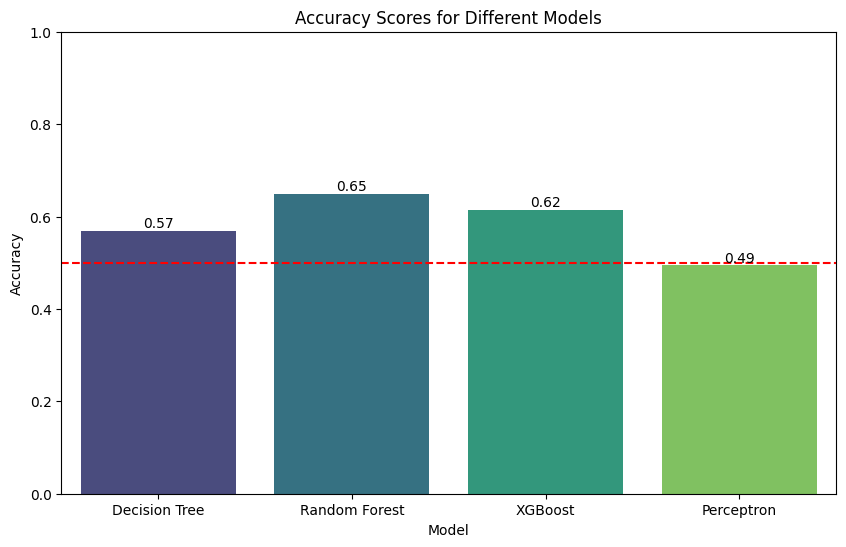

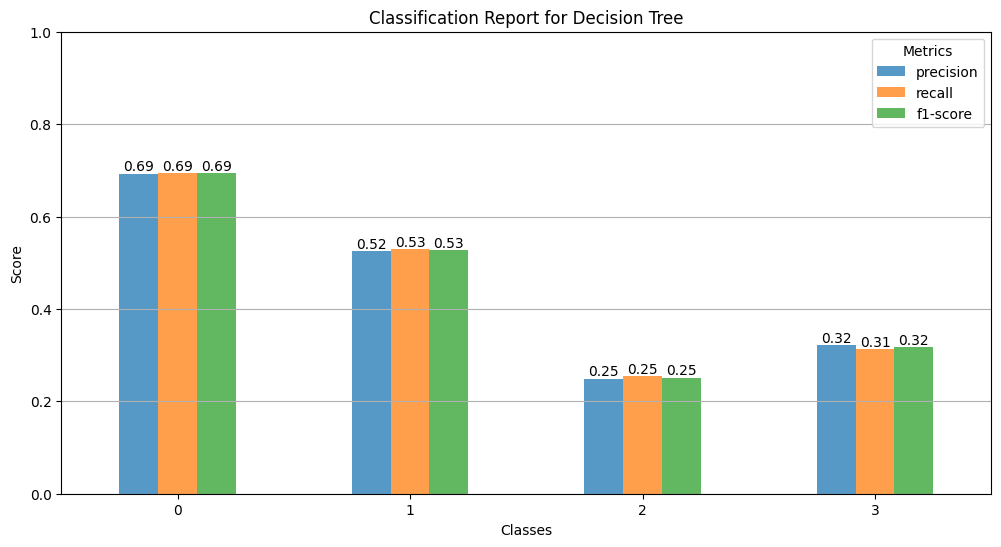

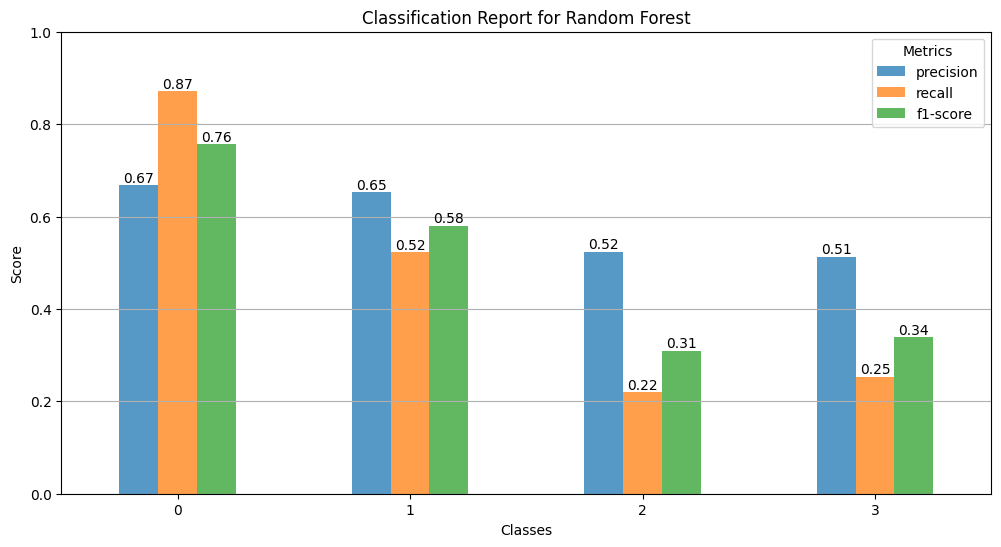

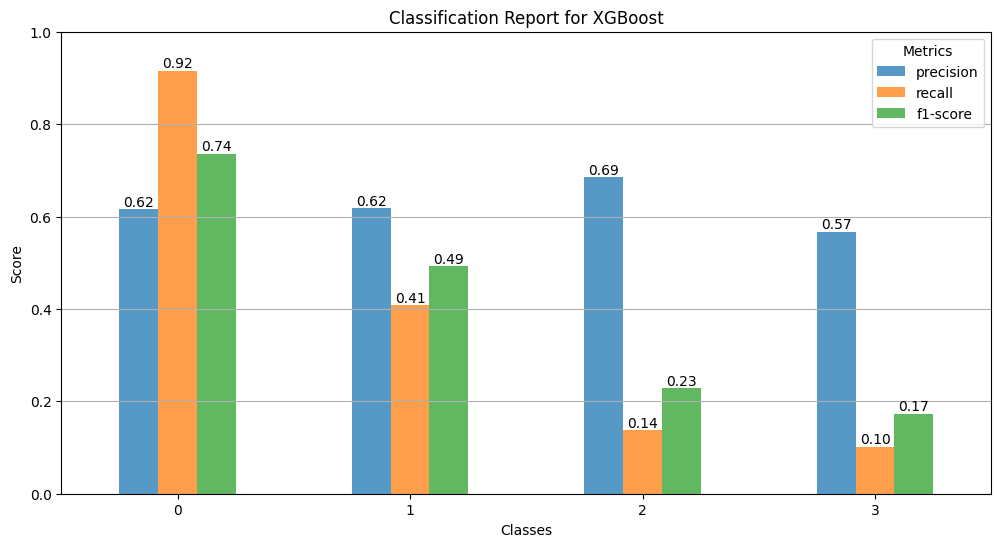

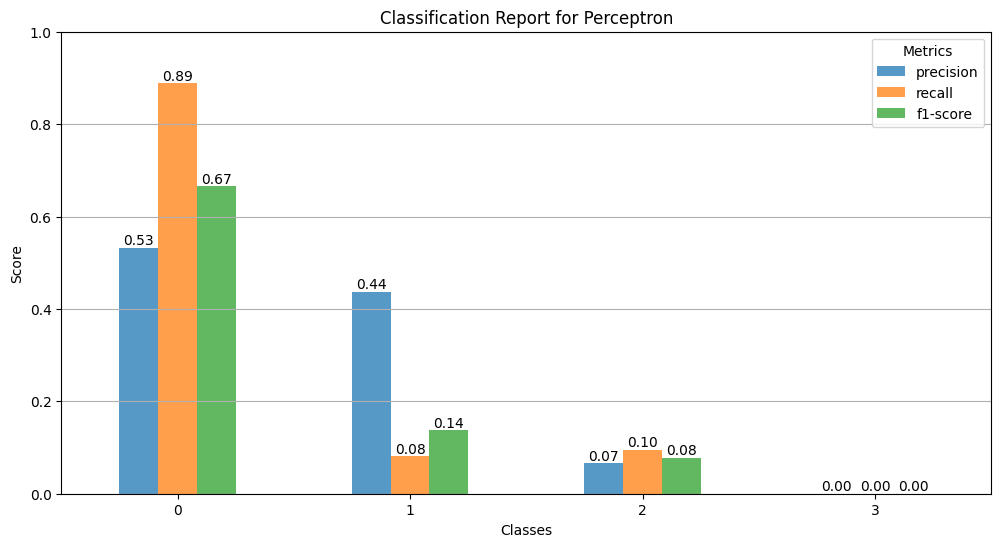

In [48]:
# Plotting Accuracy Scores
model_names = list(results.keys())
accuracy_scores = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title('Accuracy Scores for Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--')  #ref line

# Add values over bars
for i, p in enumerate(plt.gca().patches):
    plt.gca().annotate(f'{accuracy_scores[i]:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black')
plt.show()

# Plotting Classification Reports
def plot_classification_report(report, model_name):
    """Plot precision, recall, and f1-score for each class in the classification report."""
    metrics = ['precision', 'recall', 'f1-score']
    classes = list(report.keys())[:-3] 

    data = {metric: [] for metric in metrics}
    for cls in classes:
        for metric in metrics:
            data[metric].append(report[cls][metric])
    report_df = pd.DataFrame(data, index=classes)

    ax = report_df.plot(kind='bar', figsize=(12, 6), alpha=0.75)
    plt.title(f'Classification Report for {model_name}')
    plt.ylabel('Score')
    plt.xlabel('Classes')
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.legend(title='Metrics')
    plt.grid(axis='y')

    # Add values over bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.show()

for name, result in results.items():
    plot_classification_report(result['classification_report'], name)

### Model training on Unsampled Min-Max Scaling

In [49]:
# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=0, enable_categorical=True),
    "Perceptron": Perceptron(random_state=0)
}

results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    if name == "XGBoost":       #XGB needs separate encoding, manual one
        y_normal = df['CASE_STATUS']  
        X_normal = df.loc[:, df.columns != 'CASE_STATUS']  
        for col in ['VISA_CLASS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'EMPLOYER_NAME', 
                    'SOC_CODE', 'JOB_TITLE', 'WORKSITE', 'COLI']:
            X_normal[col] = le.fit_transform(X_normal[col].astype(str))  
        X_train_US, X_test_US, y_train_US, y_test_US = train_test_split(X_normal, y_normal, test_size=0.2, random_state=None)
        X_train_US[columns_to_scale] = scaler.fit_transform(X_train_US[columns_to_scale])  # Fit and transform on train data
        X_test_US[columns_to_scale] = scaler.transform(X_test_US[columns_to_scale]) 
        X_train_minmax_US=X_train_US
        X_test_minmax_US=X_test_US

        clf.fit(X_train_minmax_US, y_train_US)
    
        y_pred_US = clf.predict(X_test_minmax_US)
        
        accuracy = accuracy_score(y_test_US, y_pred_US)
        class_report = classification_report(y_test_US, y_pred_US, output_dict=True, zero_division=0)
        
        results[name] = {
            "accuracy": accuracy,
            "confusion_matrix": confusion_matrix(y_test_US, y_pred_US),
            "classification_report": class_report
        }
        continue
    
    clf.fit(X_train_minmax_US, y_train_US)
    
    y_pred_US = clf.predict(X_test_minmax_US)
    
    accuracy = accuracy_score(y_test_US, y_pred_US)
    class_report = classification_report(y_test_US, y_pred_US, output_dict=True, zero_division=0)
    
    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix(y_test_US, y_pred_US),
        "classification_report": class_report
    }


C:\Users\acer\AppData\Local\Temp\ipykernel_39308\656880277.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_normal[col] = le.fit_transform(X_normal[col].astype(str))
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\656880277.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_normal[col] = le.fit_transform(X_normal[col].astype(str))
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\656880277.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

C:\Users\acer\AppData\Local\Temp\ipykernel_39308\1322097614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


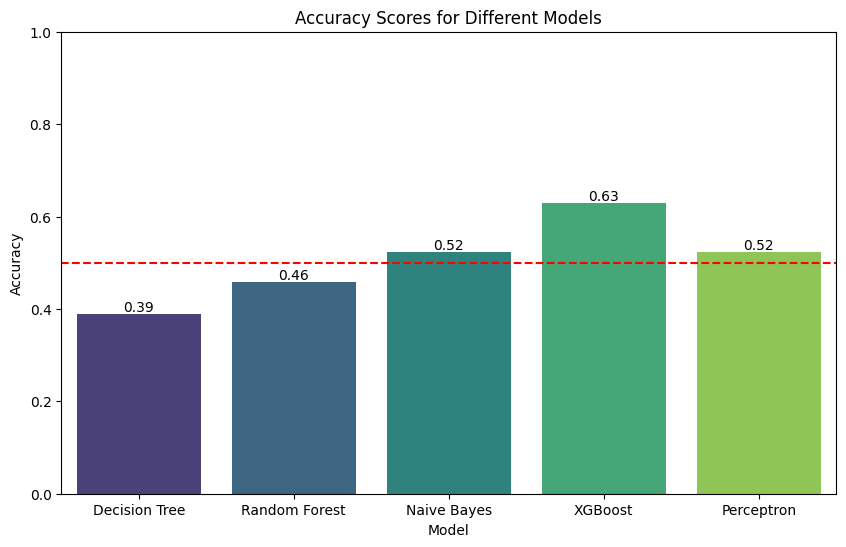

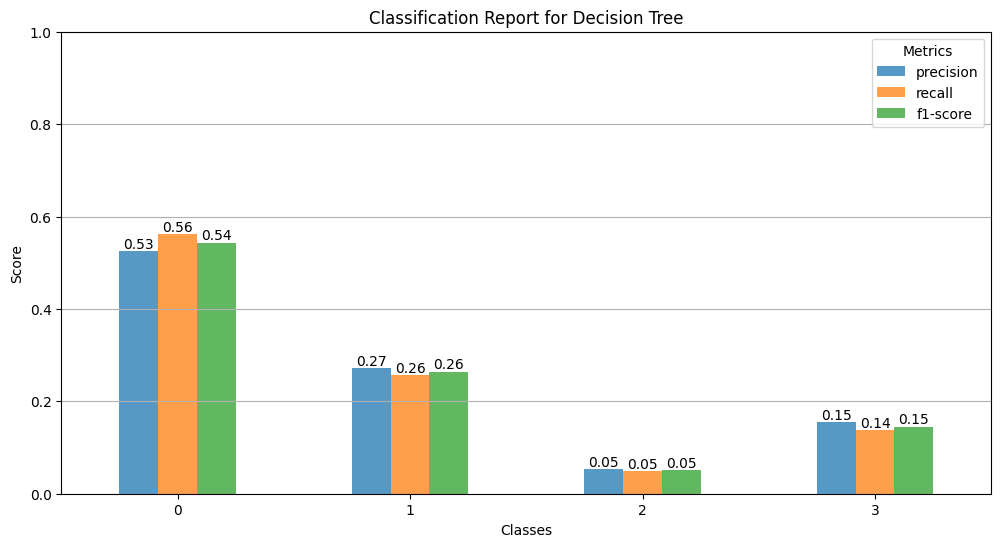

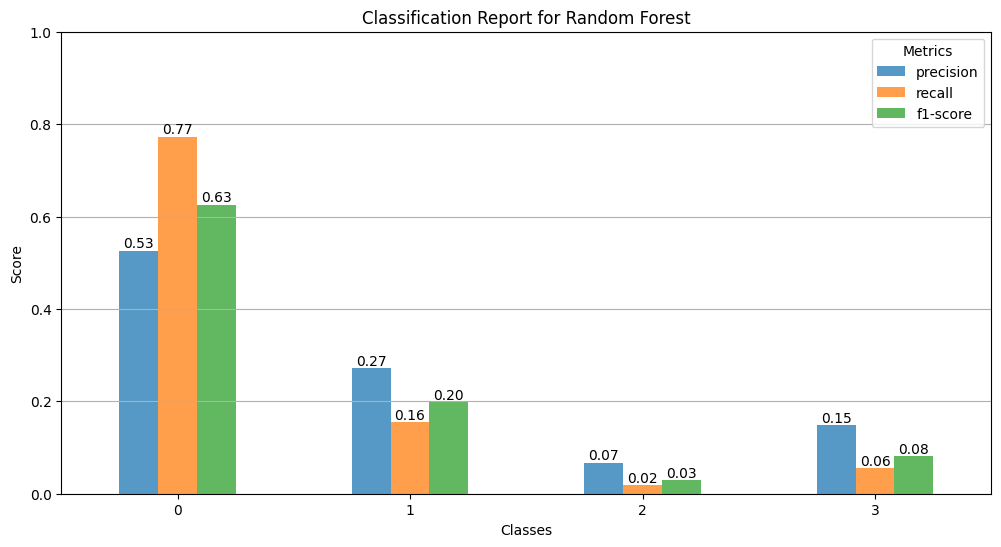

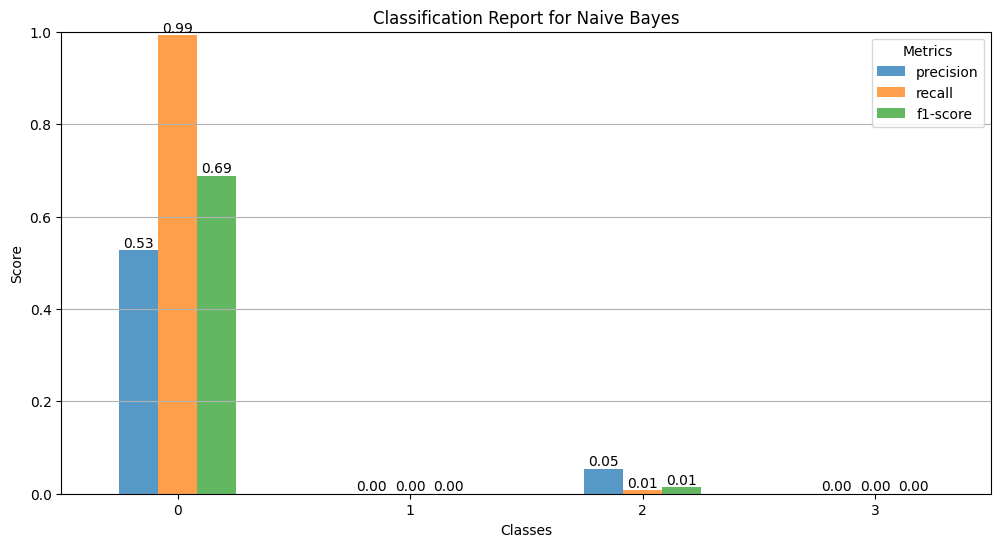

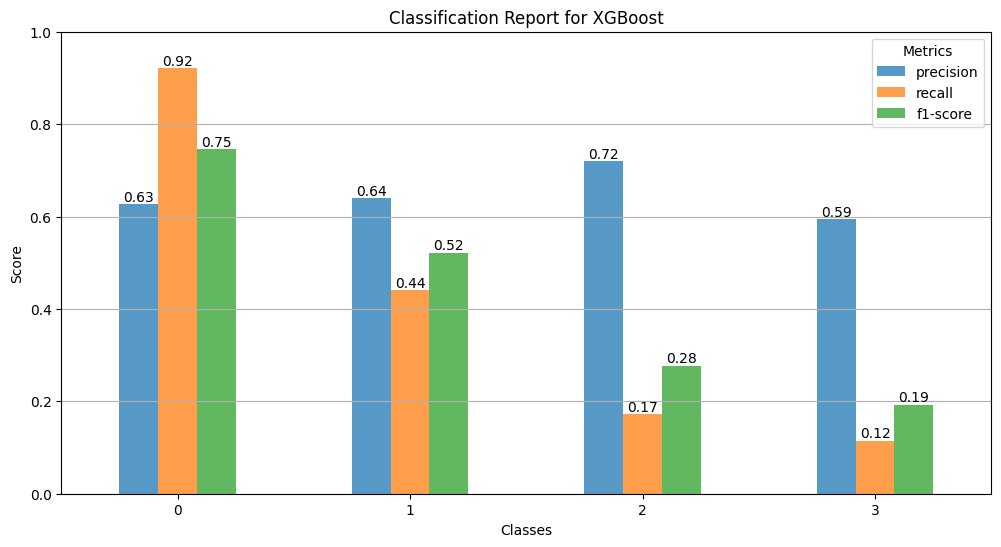

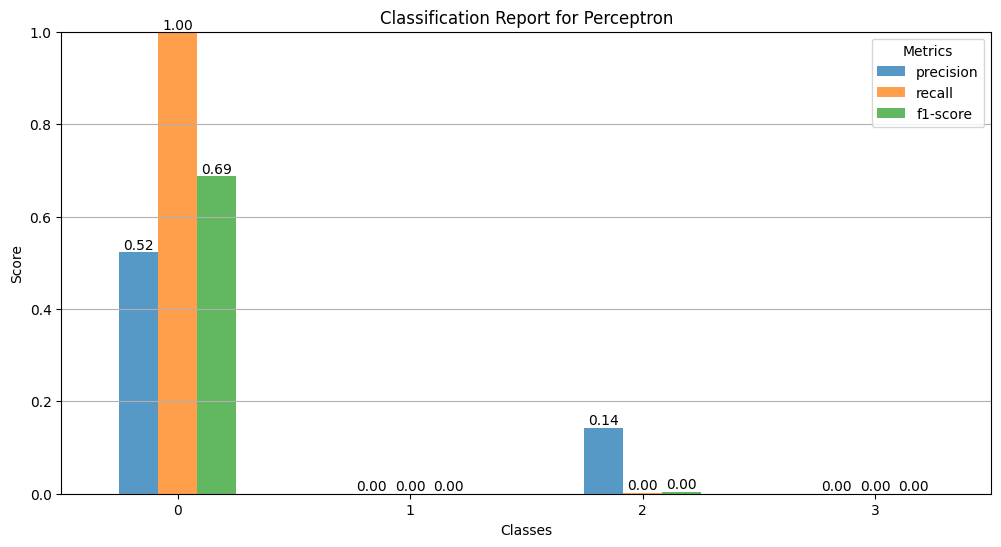

In [50]:
# Plotting Accuracy Scores
model_names = list(results.keys())
accuracy_scores = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title('Accuracy Scores for Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--')  #ref line

# Add values over bars
for i, p in enumerate(plt.gca().patches):
    plt.gca().annotate(f'{accuracy_scores[i]:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black')
plt.show()

# Plotting Classification Reports
def plot_classification_report(report, model_name):
    """Plot precision, recall, and f1-score for each class in the classification report."""
    metrics = ['precision', 'recall', 'f1-score']
    classes = list(report.keys())[:-3] 

    data = {metric: [] for metric in metrics}
    for cls in classes:
        for metric in metrics:
            data[metric].append(report[cls][metric])
    report_df = pd.DataFrame(data, index=classes)

    ax = report_df.plot(kind='bar', figsize=(12, 6), alpha=0.75)
    plt.title(f'Classification Report for {model_name}')
    plt.ylabel('Score')
    plt.xlabel('Classes')
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.legend(title='Metrics')
    plt.grid(axis='y')

    # Add values over bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.show()

for name, result in results.items():
    plot_classification_report(result['classification_report'], name)

## Undersampling

In [51]:
class_counts = df['CASE_STATUS'].value_counts()
print("Class distribution before undersampling:\n", class_counts)

# Find the minimum number of samples among the minority classes
min_class_size = class_counts[class_counts != class_counts.max()].min()

# Separate each class into different DataFrames
class_dfs = {class_label: df[df['CASE_STATUS'] == class_label] for class_label in class_counts.index}

# Perform undersampling on the majority class
class_dfs[class_counts.idxmax()] = class_dfs[class_counts.idxmax()].sample(min_class_size*4, random_state=None)

# Adjust sizes: Undersample other classes to the minimum class size
for class_label in class_counts.index:
    if class_label != class_counts.idxmax() and class_label != class_counts.idxmin():  # Skip the majority class
        class_dfs[class_label] = class_dfs[class_label].sample(min_class_size, random_state=42)


# Combine all the undersampled and minority class DataFrames
df_undersampled = pd.concat(class_dfs.values())

# Shuffle the DataFrame to ensure the order of the rows is mixed
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

print("Class distribution after undersampling:\n", df_undersampled['CASE_STATUS'].value_counts())


Class distribution before undersampling:
 CASE_STATUS
0    120000
1     61992
3     34846
2     11289
Name: count, dtype: int64
Class distribution after undersampling:
 CASE_STATUS
0    45156
1    11289
2    11289
3    11289
Name: count, dtype: int64


In [52]:
y_undersampled= df_undersampled['CASE_STATUS']  

# Select all columns except 'CASE_STATUS' for features
X_undersampled = df_undersampled.loc[:, df_undersampled.columns != 'CASE_STATUS']


### label encoding

In [53]:
categorical_cols = X_undersampled.select_dtypes(include=['object']).columns

# Perform label encoding on categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Fit and transform the column and assign it directly
    X_undersampled[col] = le.fit_transform(X_undersampled[col].astype(str))  # Convert to string to handle any non-string values
    label_encoders[col] = le


C:\Users\acer\AppData\Local\Temp\ipykernel_39308\4192314113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_undersampled[col] = le.fit_transform(X_undersampled[col].astype(str))  # Convert to string to handle any non-string values
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\4192314113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_undersampled[col] = le.fit_transform(X_undersampled[col].astype(str))  # Convert to string to handle any non-string values
C:\Users\acer\AppData\Local\Temp\ipyke

In [54]:

X_train_US, X_test_US, y_train_US, y_test_US = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=None)


### Min Max Undersampled

In [55]:
# Perform Min-Max Scaling
X_train_US[columns_to_scale] = scaler.fit_transform(X_train_US[columns_to_scale])  # Fit and transform on train data
X_test_US[columns_to_scale] = scaler.transform(X_test_US[columns_to_scale])  

X_train_minmax_US = X_train_US  
X_test_minmax_US = X_test_US

## Oversampling

In [56]:
X_OS = df.loc[:, df.columns != 'CASE_STATUS']
y_OS = df['CASE_STATUS']
# print(y)

categorical_cols_OS = X_OS.select_dtypes(include=['object']).columns

label_encoders_OS = {}

for col in categorical_cols_OS:
    le_OS = LabelEncoder()
    X_OS.loc[:, col] = le_OS.fit_transform(X_OS[col].astype(str))  # Convert to string to handle any non-string values
    label_encoders_OS[col] = le_OS 

X_train_before_OS, X_test_OS, y_train_before_OS, y_test_OS = train_test_split(X_OS, y_OS, test_size=0.2, random_state=None)

# Now apply SMOTE to the encoded features
smote = SMOTE(random_state=None)
X_train_OS, y_train_OS = smote.fit_resample(X_train_before_OS, y_train_before_OS)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_OS).value_counts())


Class distribution after SMOTE:
CASE_STATUS
1    95985
0    95985
3    95985
2    95985
Name: count, dtype: int64


### Min Max Oversampled

In [57]:
# Perform Min-Max Scaling
X_train_OS[columns_to_scale] = scaler.fit_transform(X_train_OS[columns_to_scale])  # Fit and transform on train data
X_test_OS[columns_to_scale] = scaler.transform(X_test_OS[columns_to_scale])  

X_train_minmax_OS = X_train_OS # Fit and transform on training data
X_test_minmax_OS = X_test_OS

In [58]:
# model = LogisticRegression(max_iter=2000)
# model.fit(X_train, y_train)


### Model Function

In [59]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    predictions_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })
    unique_counts = predictions_df['Predicted'].value_counts()
    return accuracy, conf_matrix, class_report, unique_counts


### Plot function

In [60]:

label_map = {'CERTIFIED': 0, 'CERTIFIED-WITHDRAWN': 1, 'DENIED': 2, 'WITHDRAWN': 3}
labels = list(label_map.keys())

def plot_classification_results(conf_matrix_dtrees_OS, conf_matrix_dtrees_US, 
                                 class_report_dtrees_OS, class_report_dtrees_US, 
                                 unique_counts_OS, unique_counts_US, 
                                 accuracy_dtrees_OS, accuracy_dtrees_US, 
                                 label_map):
    
    # Extract classification report metrics (precision, recall, f1-score)
    def extract_report_data(report):
        data = []
        for label in label_map.values():
            precision = report[str(label)]['precision']
            recall = report[str(label)]['recall']
            f1_score = report[str(label)]['f1-score']
            data.append([precision, recall, f1_score])
        return np.array(data)

    metrics_OS = extract_report_data(class_report_dtrees_OS)
    metrics_US = extract_report_data(class_report_dtrees_US)
    metrics_labels = ['Precision', 'Recall', 'F1-score']

    # Plotting the confusion matrices
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Confusion matrix for undersampled data
    disp_us = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dtrees_US, display_labels=list(label_map.keys()))
    disp_us.plot(ax=axs[0], cmap=plt.cm.viridis)
    axs[0].set_title("Confusion Matrix (Undersampled)")
    axs[0].tick_params(axis='x', rotation=90)

    # Confusion matrix for oversampled data
    disp_os = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dtrees_OS, display_labels=list(label_map.keys()))
    disp_os.plot(ax=axs[1], cmap=plt.cm.viridis)
    axs[1].set_title("Confusion Matrix (Oversampled)")
    axs[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

    # Bar plots for distinct cases, classification report metrics, and accuracy
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2.5, 1]})

    # Plot 1: Distinct Predicted Cases (Oversampled vs Undersampled)
    bars1 = axs[0].bar(['Oversampled', 'Undersampled'], [len(unique_counts_OS), len(unique_counts_US)], width=0.4, color=['orange', '#43A5BE'])
    axs[0].set_title('Distinct Predicted Cases (OS vs US)')
    axs[0].set_ylabel('Number of Distinct Cases')

    # Add value labels on top of the bars for Plot 1
    for bar in bars1:
        yval = bar.get_height()
        axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    # Plot 2: Classification Report Metrics (Precision, Recall, F1-score)
    x = np.arange(len(metrics_labels))
    bars2_1 = axs[1].bar(x - 0.2, metrics_OS.mean(axis=0), 0.4, label='Oversampled', color='orange')
    bars2_2 = axs[1].bar(x + 0.2, metrics_US.mean(axis=0), 0.4, label='Undersampled', color='#43A5BE')
    axs[1].set_title('Classification Report Comparison (OS vs US)')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(metrics_labels)
    axs[1].legend()

    # Add value labels on top of the bars for Plot 2
    for bar in bars2_1:
        yval = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha='center', va='bottom')

    for bar in bars2_2:
        yval = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha='center', va='bottom')

    # Plot 3: Accuracy Comparison (Oversampled vs Undersampled)
    bars3 = axs[2].bar(['OS', 'US'], [accuracy_dtrees_OS, accuracy_dtrees_US], width=0.4, color=['orange', '#43A5BE'])
    axs[2].set_title('Accuracy Comparison (OS vs US)')
    axs[2].set_ylim([0, 1])

    # Add value labels on top of the bars for Plot 3
    for bar in bars3:
        yval = bar.get_height()
        axs[2].text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

## Decision Tree Classifier

### undersampled

In [61]:
model_dtrees = DecisionTreeClassifier(random_state=None)

accuracy_dtrees_US, conf_matrix_dtrees_US, class_report_dtrees_US, unique_counts_US = evaluate_model(
    model_dtrees, X_train_US, y_train_US, X_test_US, y_test_US
)

# Print the evaluation results (optional)
# print(f"Accuracy: {accuracy_dtrees_US:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix_dtrees_US)
# print("Classification Report:")
# print(class_report_dtrees_US)
# print("Unique Counts of Predictions:")
# print(unique_counts_US)


### oversampled

In [62]:
model_dtrees_OS = DecisionTreeClassifier(random_state=None)

accuracy_dtrees_OS, conf_matrix_dtrees_OS, class_report_dtrees_OS, unique_counts_OS = evaluate_model(
    model_dtrees_OS, X_train_OS, y_train_OS, X_test_OS, y_test_OS
)

# print(f"Accuracy: {accuracy_dtrees_OS}")
# print("Confusion Matrix:")
# print(conf_matrix_dtrees_OS)
# print("Classification Report:")
# print(class_report_dtrees_OS)
# print("Unique Counts of Predictions:")
# print(unique_counts_OS)

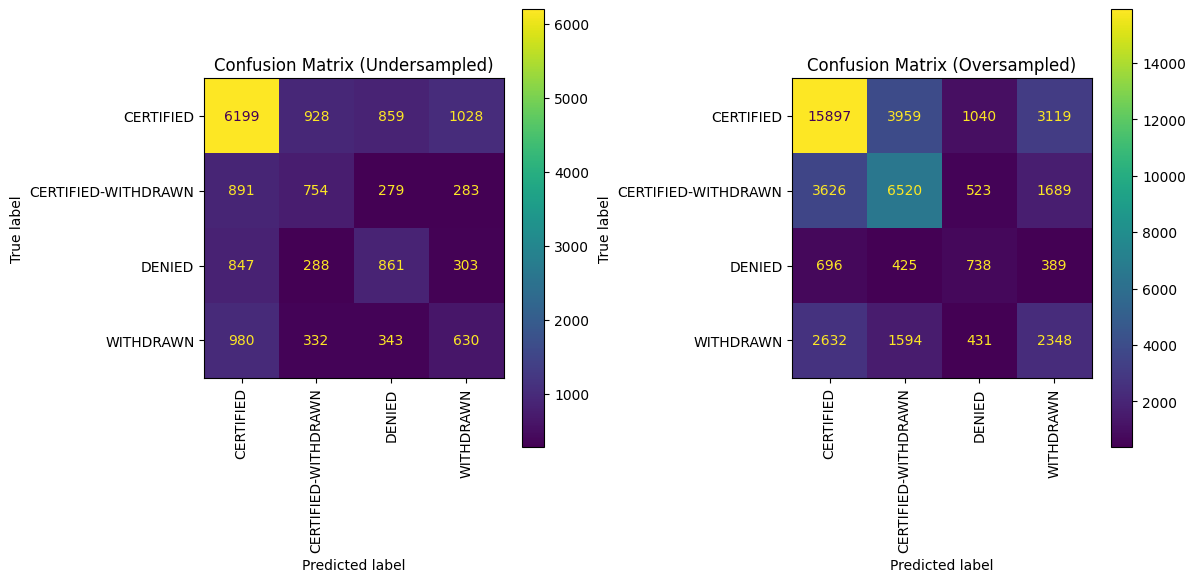

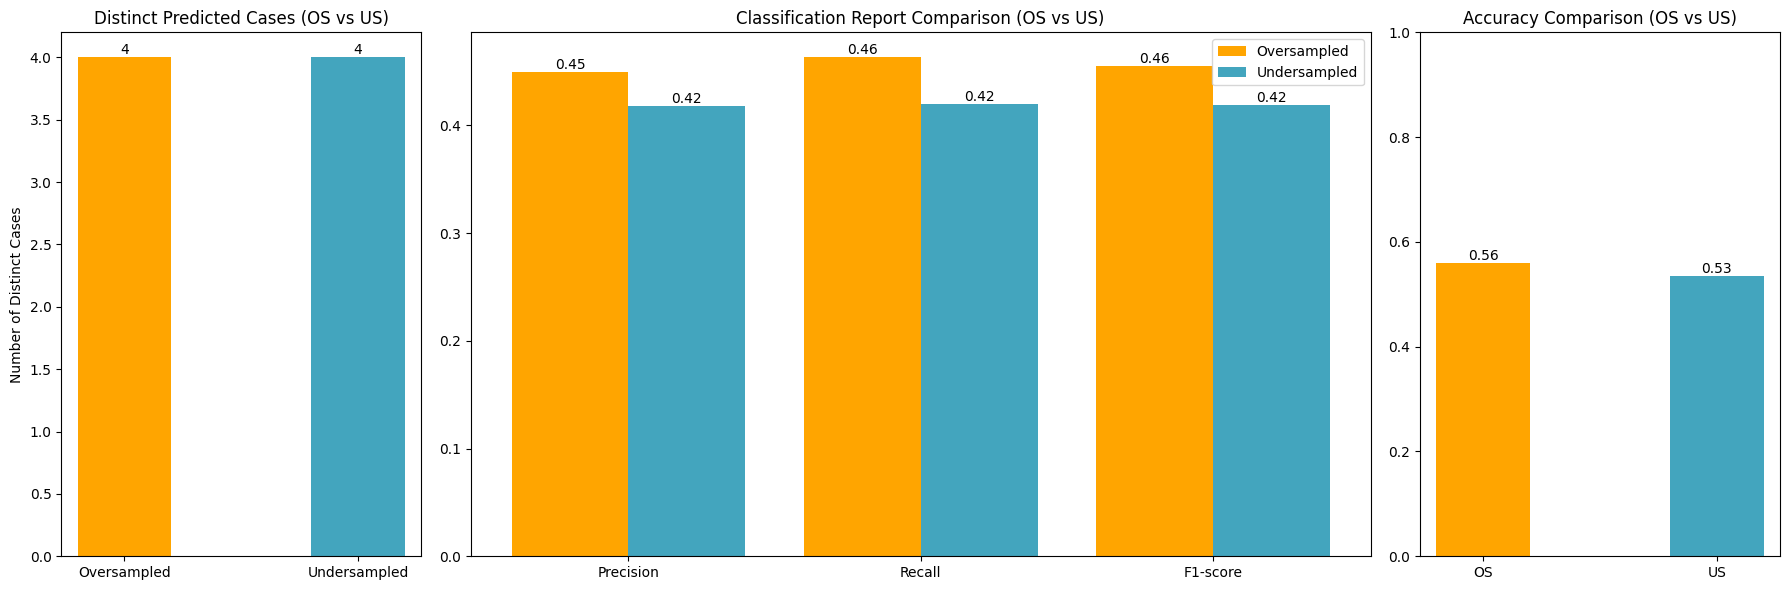

In [63]:

plot_classification_results(conf_matrix_dtrees_OS, conf_matrix_dtrees_US, 
                            class_report_dtrees_OS, class_report_dtrees_US, 
                            unique_counts_OS, unique_counts_US, 
                            accuracy_dtrees_OS, accuracy_dtrees_US, 
                            label_map)

### Min Max Undersampled


In [64]:
model_dtrees_minmax_ = DecisionTreeClassifier(random_state=None)

accuracy_dtrees_minmax_US, conf_matrix_dtrees_minmax_US, class_report_dtrees_minmax_US, unique_counts_minmax_US = evaluate_model(
    model_dtrees_minmax_, X_train_minmax_US, y_train_US, X_test_minmax_US, y_test_US
)

# Print the evaluation results (optional)
# print(f"Accuracy: {accuracy_dtrees_US:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix_dtrees_US)
# print("Classification Report:")
# print(class_report_dtrees_US)
# print("Unique Counts of Predictions:")
# print(unique_counts_US)


### Min Max Oversampled

In [65]:
model_dtrees_minmax_OS = DecisionTreeClassifier(random_state=None)

accuracy_dtrees_minmax_OS, conf_matrix_dtrees_minmax_OS, class_report_dtrees_minmax_OS, unique_counts_minmax_OS = evaluate_model(
    model_dtrees_minmax_OS, X_train_minmax_OS, y_train_OS, X_test_minmax_OS, y_test_OS
)

# Print the evaluation results (optional)
# print(f"Accuracy: {accuracy_dtrees_minmax_OS:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix_dtrees_minmax_OS)
# print("Classification Report:")
# print(class_report_dtrees_minmax_OS)
# print("Unique Counts of Predictions:")
# print(unique_counts_minmax_OS)


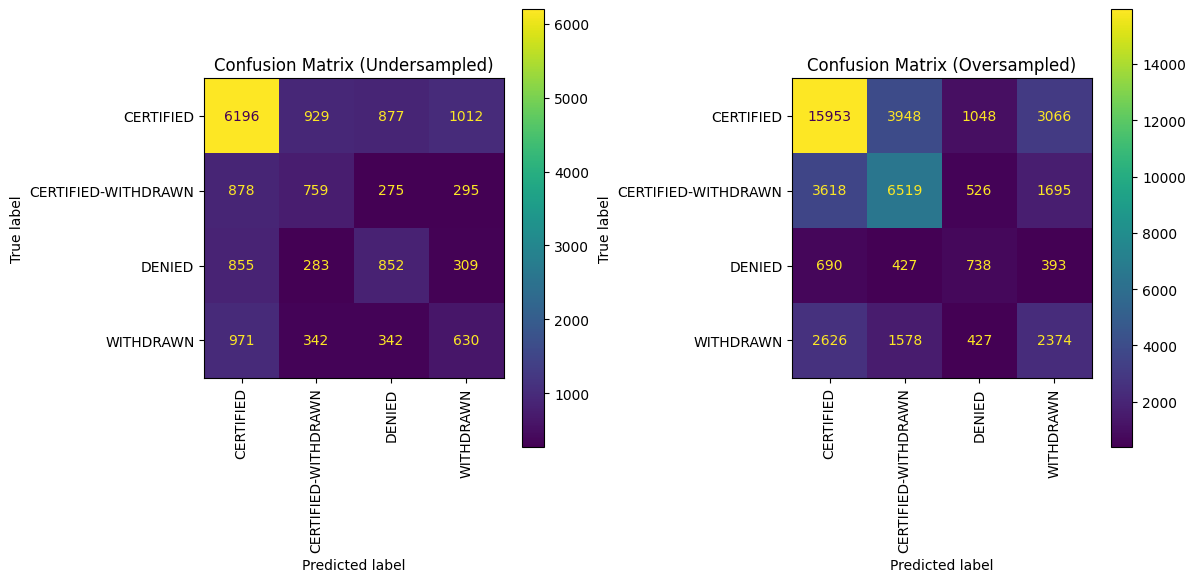

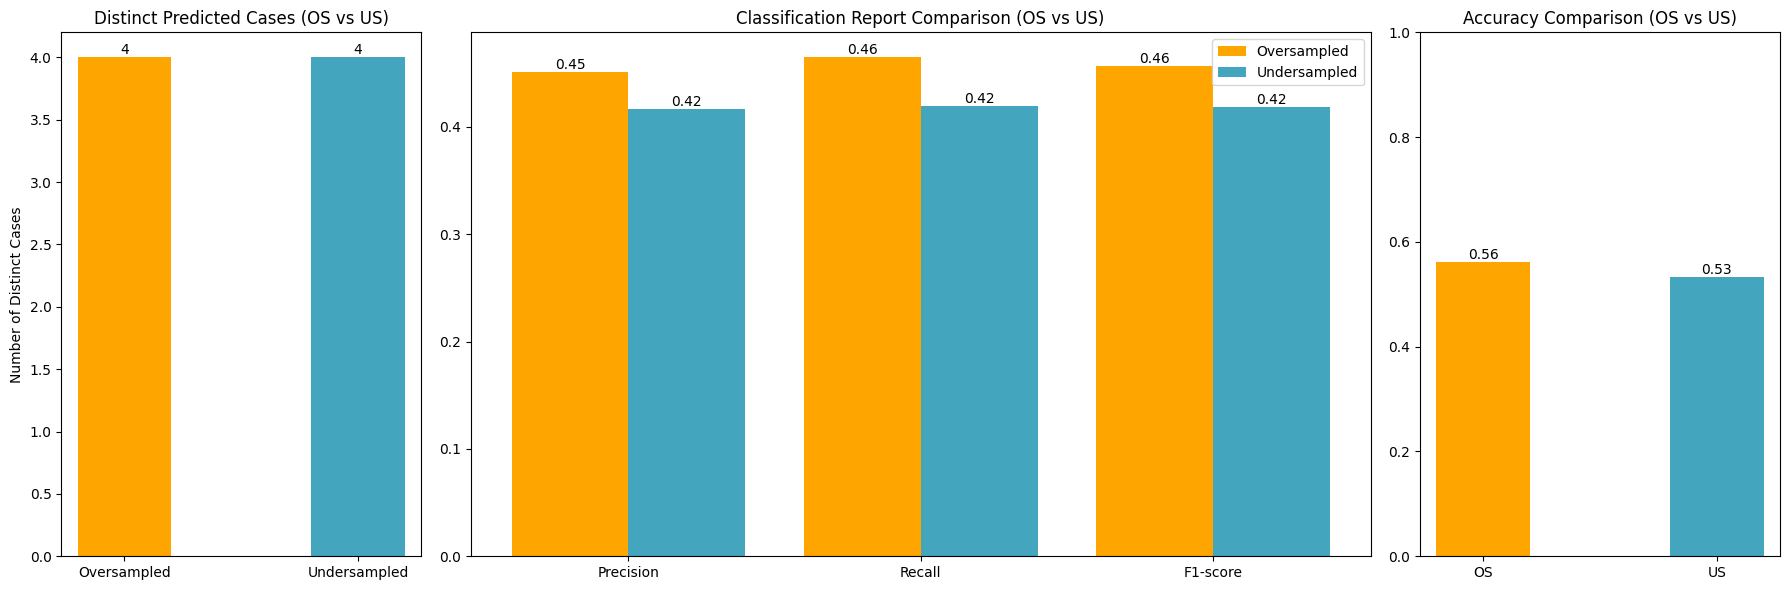

In [66]:

plot_classification_results(conf_matrix_dtrees_minmax_OS, conf_matrix_dtrees_minmax_US, 
                            class_report_dtrees_minmax_OS, class_report_dtrees_minmax_US, 
                            unique_counts_minmax_OS, unique_counts_minmax_US, 
                            accuracy_dtrees_minmax_OS, accuracy_dtrees_minmax_US, 
                            label_map)


## Random Forest Classifier

In [67]:
rf_model = RandomForestClassifier(random_state=None)

rf_accuracy_US, rf_conf_matrix_US, rf_class_report_US, unique_counts_rf_US = evaluate_model(
    rf_model, X_train_US, y_train_US, X_test_US, y_test_US
)

# print(f"Random Forest Accuracy: {rf_accuracy_US:.2f}")
# print("Random Forest Confusion Matrix:")
# print(rf_conf_matrix_US)
# print("Random Forest Classification Report:")
# print(rf_class_report_US)
# print("Unique Counts of Random Forest Predictions:")
# print(unique_counts_rf_US)


In [68]:
rf_model_OS = RandomForestClassifier(random_state=None)

rf_accuracy_OS, rf_conf_matrix_OS, rf_class_report_OS, unique_counts_rf_OS = evaluate_model(
    rf_model_OS, X_train_OS, y_train_OS, X_test_OS, y_test_OS
)

# print(f"Random Forest Accuracy (Oversampled): {rf_accuracy_OS:.2f}")
# print("Random Forest Confusion Matrix (Oversampled):")
# print(rf_conf_matrix_OS)
# print("Random Forest Classification Report (Oversampled):")
# print(rf_class_report_OS)
# print("Unique Counts of Random Forest Predictions (Oversampled):")
# print(unique_counts_rf_OS)


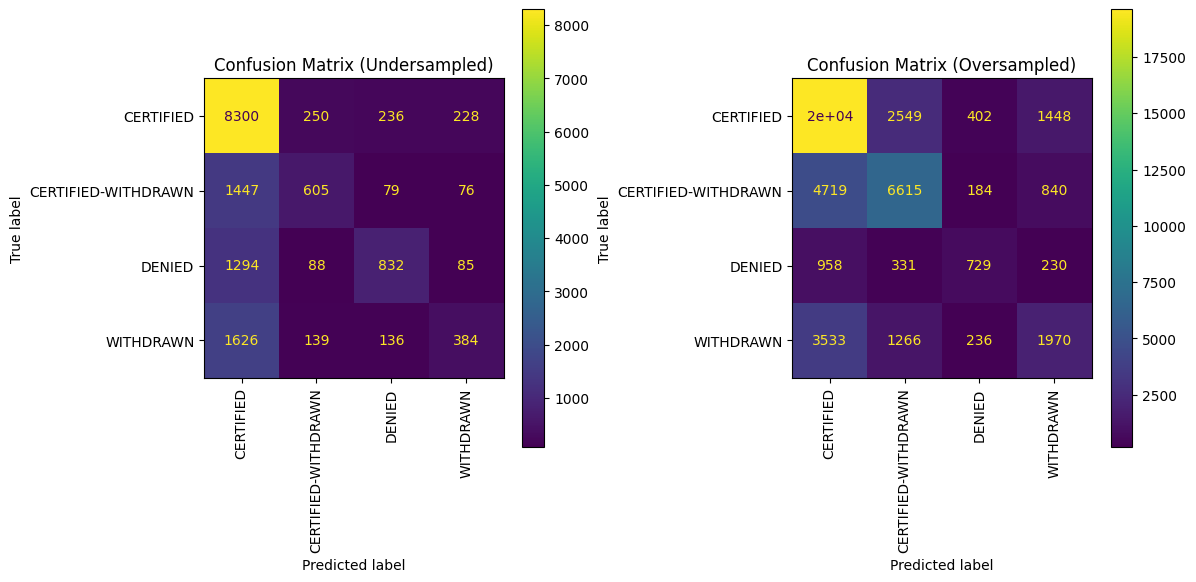

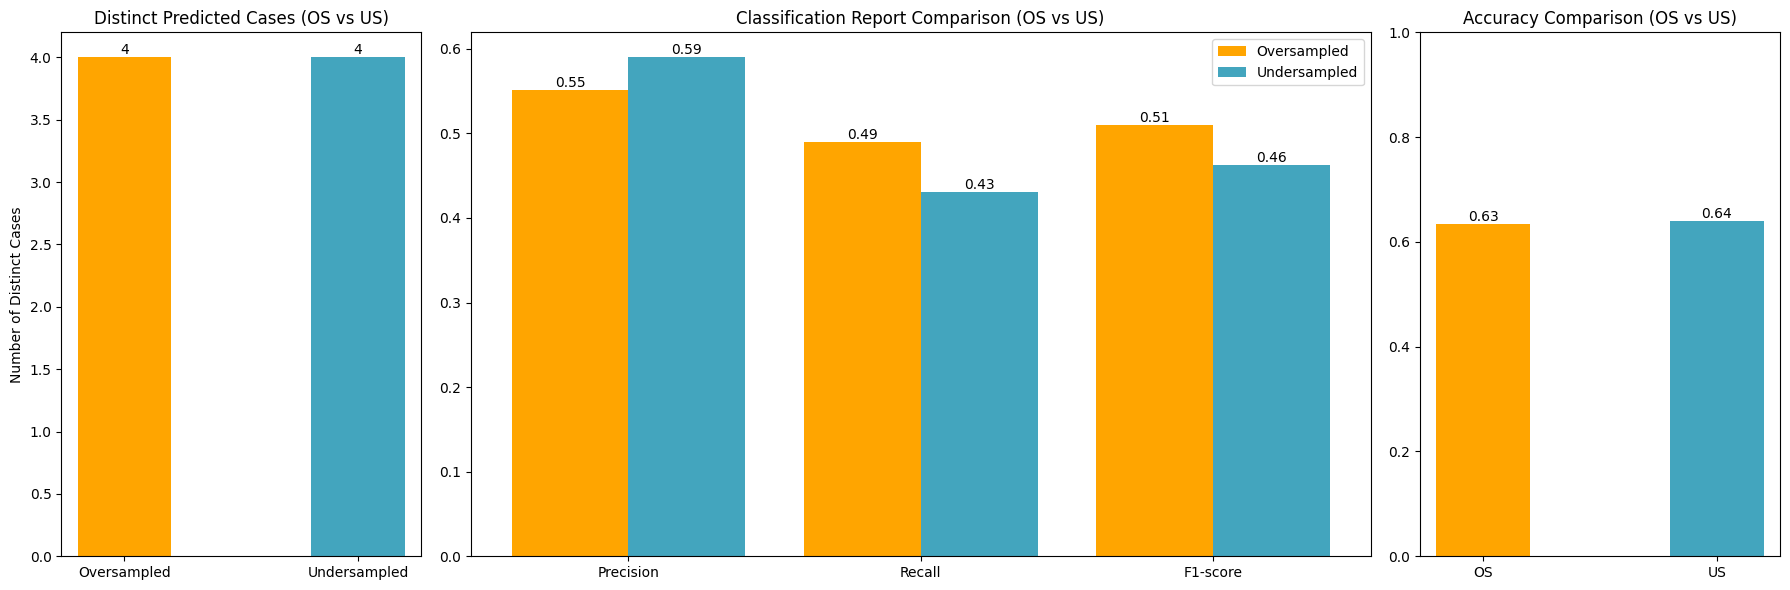

In [69]:
plot_classification_results(
    rf_conf_matrix_OS,         
    rf_conf_matrix_US,         
    rf_class_report_OS,        
    rf_class_report_US,        
    unique_counts_OS,          
    unique_counts_US,          
    rf_accuracy_OS,            
    rf_accuracy_US,            
    label_map                 
)


### MinMax Undersampled

In [70]:
rf_model_minmax_US = RandomForestClassifier(random_state=None)

rf_accuracy_minmax_US, rf_conf_matrix_minmax_US, rf_class_report_minmax_US, unique_counts_rf_minmax_US = evaluate_model(
    rf_model_minmax_US, X_train_minmax_US, y_train_US, X_test_minmax_US, y_test_US
)

# print(f"Random Forest Accuracy: {rf_accuracy_minmax_US:.2f}")
# print("Random Forest Confusion Matrix:")
# print(rf_conf_matrix_minmax_US)
# print("Random Forest Classification Report:")
# print(rf_class_report_minmax_US)
# print("Unique Counts of Random Forest Predictions:")
# print(unique_counts_rf_minmax_US)



### MinMax oversampled

In [71]:
rf_model_minmax_OS = RandomForestClassifier(random_state=None)

rf_accuracy_minmax_OS, rf_conf_matrix_minmax_OS, rf_class_report_minmax_OS, unique_counts_rf_minmax_OS = evaluate_model(
    rf_model_minmax_OS, X_train_minmax_OS, y_train_OS, X_test_minmax_OS, y_test_OS
)

# print(f"Random Forest Accuracy (MinMax, Oversampled): {rf_accuracy_minmax_OS:.2f}")
# print("Random Forest Confusion Matrix (MinMax, Oversampled):")
# print(rf_conf_matrix_minmax_OS)
# print("Random Forest Classification Report (MinMax, Oversampled):")
# print(rf_class_report_minmax_OS)
# print("Unique Counts of Random Forest Predictions (MinMax, Oversampled):")
# print(unique_counts_rf_minmax_OS)



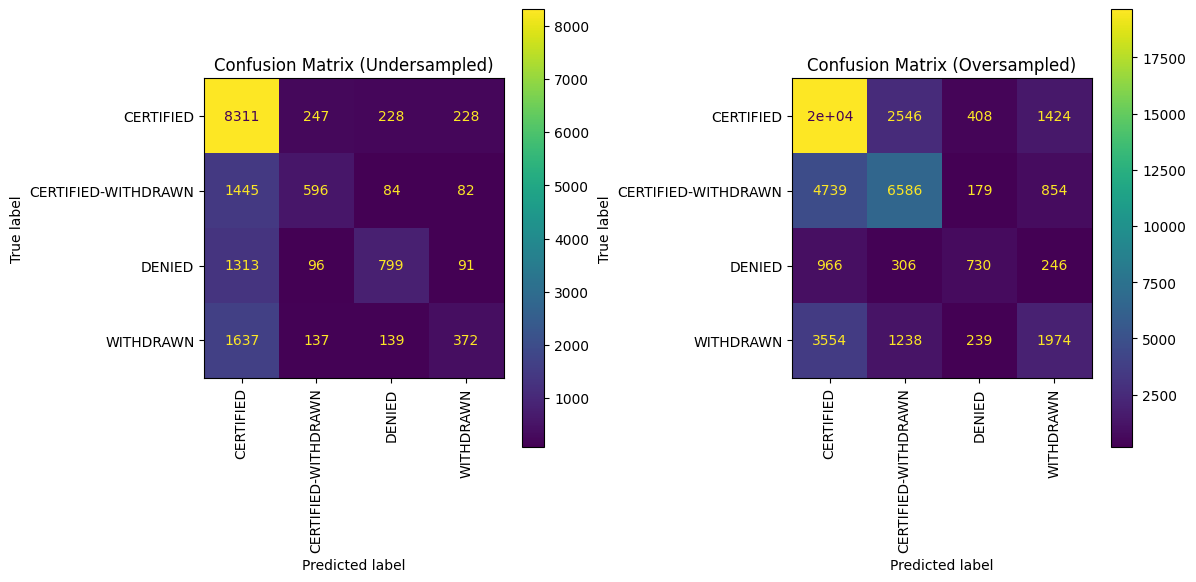

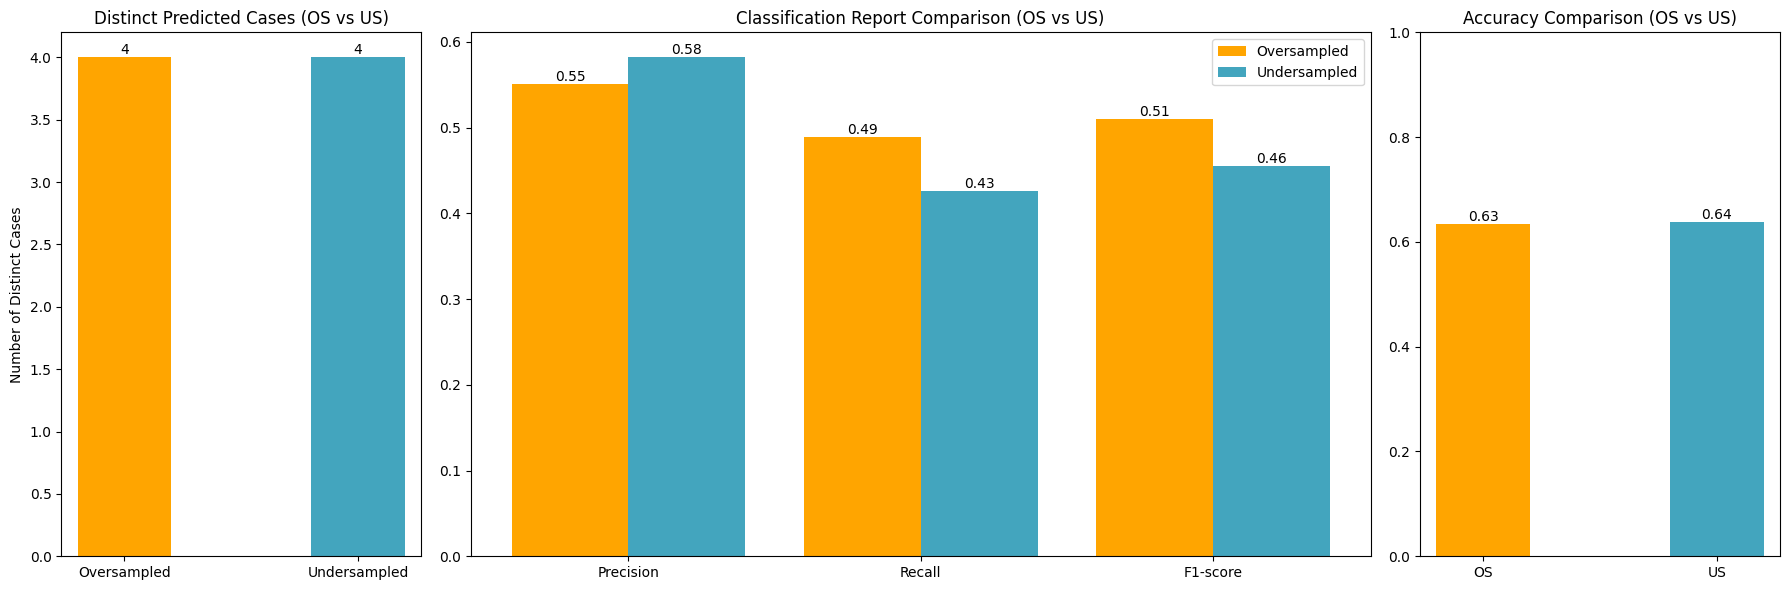

In [72]:
plot_classification_results(
    rf_conf_matrix_minmax_OS,         
    rf_conf_matrix_minmax_US,         
    rf_class_report_minmax_OS,        
    rf_class_report_minmax_US,        
    unique_counts_rf_minmax_OS,          
    unique_counts_rf_minmax_US,          
    rf_accuracy_minmax_OS,            
    rf_accuracy_minmax_US,            
    label_map                 
)


## Naive Bayes Model

### undersampled

In [73]:
nb_model = GaussianNB()

nb_accuracy_US, nb_conf_matrix_US, nb_class_report_US, unique_counts_nb_US = evaluate_model(
    nb_model, X_train_US, y_train_US, X_test_US, y_test_US
)

# print(f"Naive Bayes Accuracy: {nb_accuracy_US:.2f}")
# print("Naive Bayes Confusion Matrix:")
# print(nb_conf_matrix_US)
# print("Naive Bayes Classification Report:")
# print(nb_class_report_US)
# print("Unique Counts of Naive Bayes Predictions:")
# print(unique_counts_nb_US)


### oversampled

In [74]:
nb_model_OS = GaussianNB()

nb_accuracy_OS, nb_conf_matrix_OS, nb_class_report_OS, unique_counts_nb_OS = evaluate_model(
    nb_model_OS, X_train_OS, y_train_OS, X_test_OS, y_test_OS
)

# print(f"Naive Bayes Accuracy (Oversampled): {nb_accuracy_OS:.2f}")
# print("Naive Bayes Confusion Matrix (Oversampled):")
# print(nb_conf_matrix_OS)
# print("Naive Bayes Classification Report (Oversampled):")
# print(nb_class_report_OS)
# print("Unique Counts of Naive Bayes Predictions (Oversampled):")
# print(unique_counts_nb_OS)


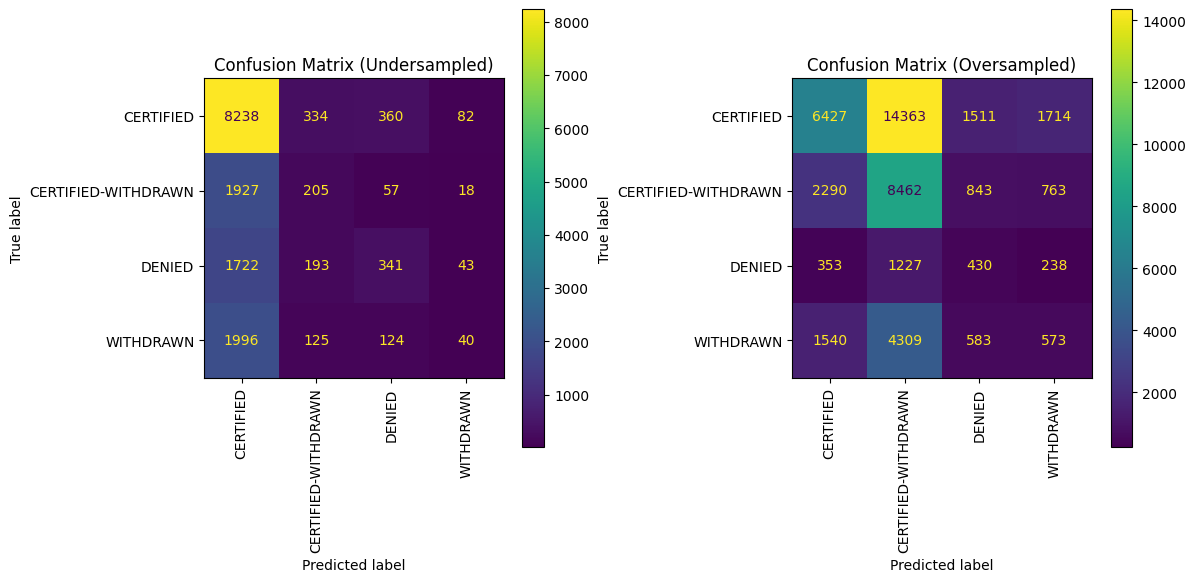

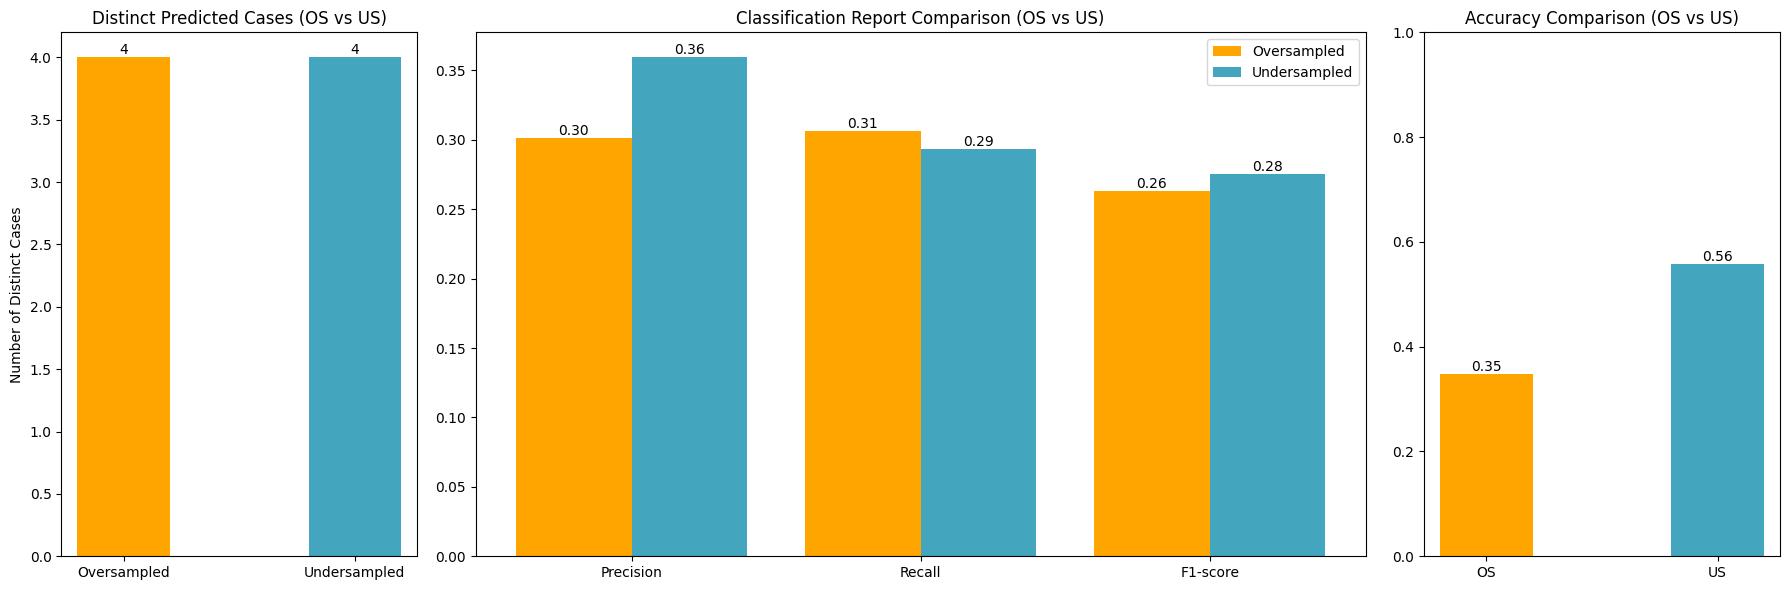

In [75]:
plot_classification_results(
    nb_conf_matrix_OS,        
    nb_conf_matrix_US,        
    nb_class_report_OS,       
    nb_class_report_US,       
    unique_counts_nb_OS,      
    unique_counts_nb_US,      
    nb_accuracy_OS,           
    nb_accuracy_US,           
    label_map                 
)


In [76]:
nb_model_minmax_US = GaussianNB()

nb_accuracy_minmax_US, nb_conf_matrix_minmax_US, nb_class_report_minmax_US, unique_counts_nb_minmax_US = evaluate_model(
    nb_model_minmax_US, X_train_minmax_US, y_train_US, X_test_minmax_US, y_test_US
)

# print(f"Naive Bayes Accuracy (MinMax, US): {nb_accuracy_minmax_US:.2f}")
# print("Naive Bayes Confusion Matrix (MinMax, US):")
# print(nb_conf_matrix_minmax_US)
# print("Naive Bayes Classification Report (MinMax, US):")
# print(nb_class_report_minmax_US)
# print("Unique Counts of Naive Bayes Predictions (MinMax, US):")
# print(unique_counts_nb_minmax_US)


In [77]:
nb_model_minmax_OS = GaussianNB()

nb_accuracy_minmax_OS, nb_conf_matrix_minmax_OS, nb_class_report_minmax_OS, unique_counts_nb_minmax_OS = evaluate_model(
    nb_model_minmax_OS, X_train_minmax_OS, y_train_OS, X_test_minmax_OS, y_test_OS
)

# print(f"Naive Bayes Accuracy (MinMax, Oversampled): {nb_accuracy_minmax_OS:.2f}")
# print("Naive Bayes Confusion Matrix (MinMax, Oversampled):")
# print(nb_conf_matrix_minmax_OS)
# print("Naive Bayes Classification Report (MinMax, Oversampled):")
# print(nb_class_report_minmax_OS)
# print("Unique Counts of Naive Bayes Predictions (MinMax, Oversampled):")
# print(unique_counts_nb_minmax_OS)


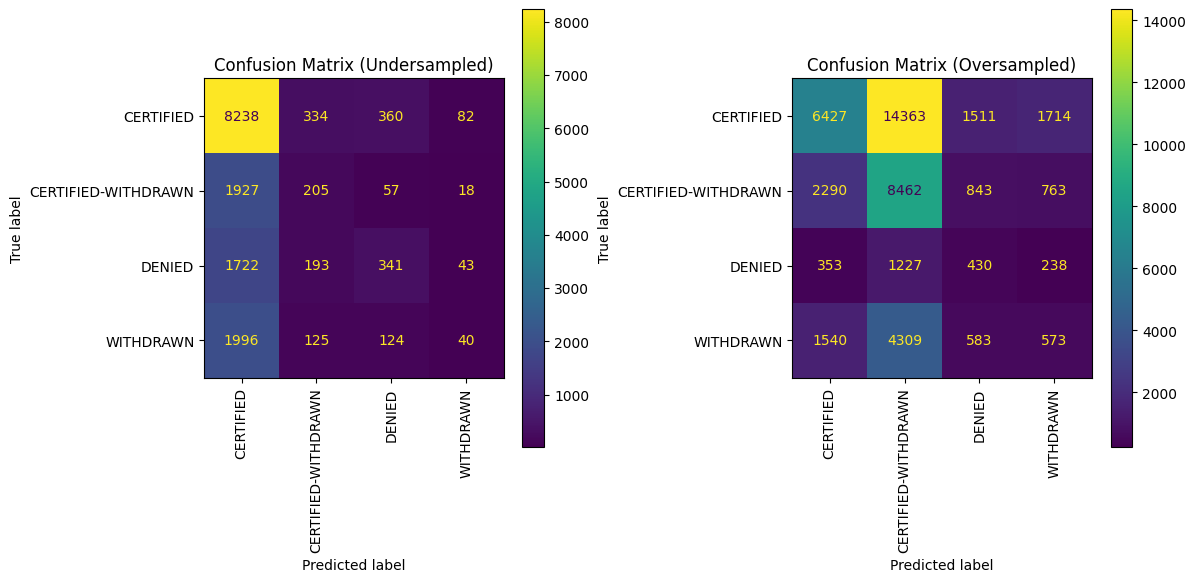

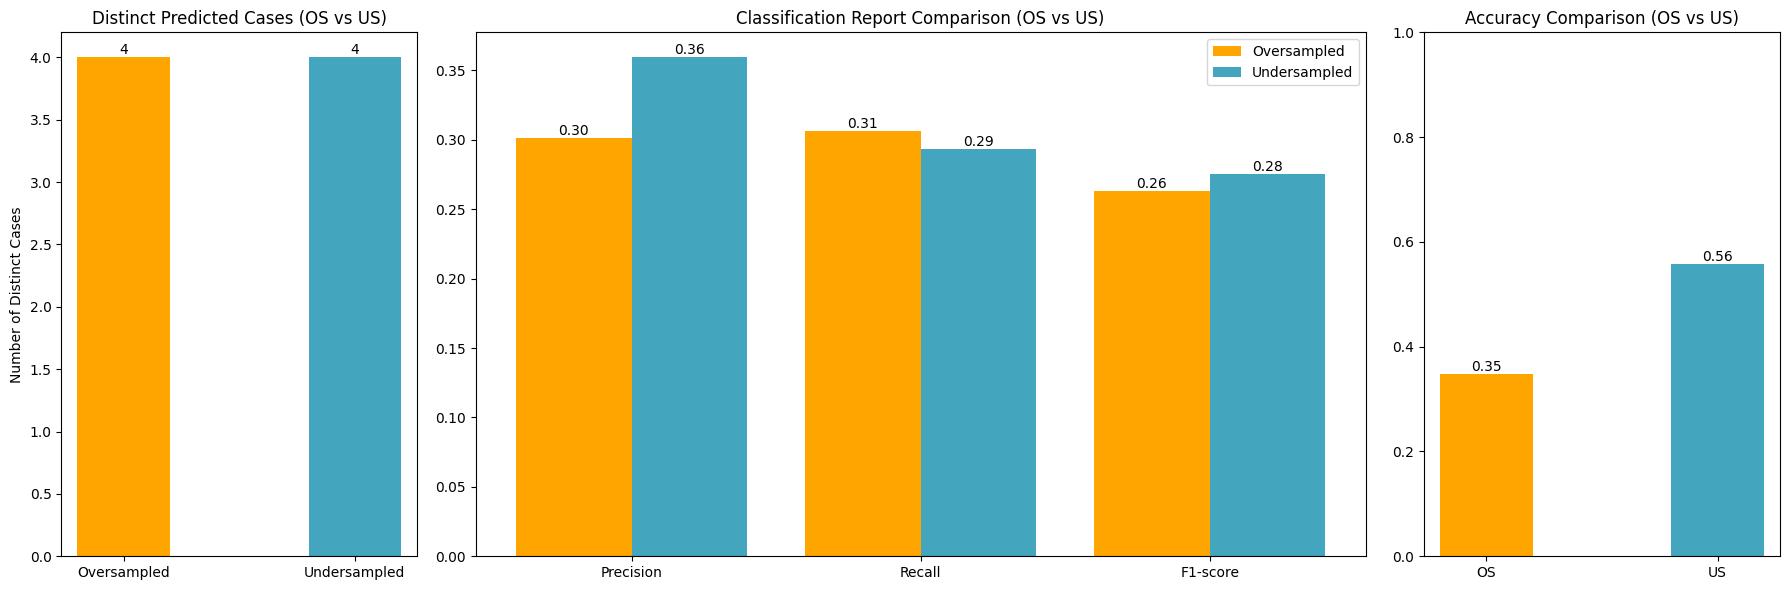

In [78]:
plot_classification_results(
    nb_conf_matrix_minmax_OS,        
    nb_conf_matrix_minmax_US,        
    nb_class_report_minmax_OS,       
    nb_class_report_minmax_US,       
    unique_counts_nb_minmax_OS,      
    unique_counts_nb_minmax_US,      
    nb_accuracy_minmax_OS,           
    nb_accuracy_minmax_US,           
    label_map                 
)


In [79]:
perceptron_model = Perceptron(random_state=None)

perceptron_accuracy_US, perceptron_conf_matrix_US, perceptron_class_report_US, unique_counts_perceptron_US = evaluate_model(
    perceptron_model, X_train_US, y_train_US, X_test_US, y_test_US
)

# print(f"Perceptron Accuracy: {perceptron_accuracy_US:.2f}")
# print("Perceptron Confusion Matrix:")
# print(perceptron_conf_matrix_US)
# print("Perceptron Classification Report:")
# print(perceptron_class_report_US)
# print("Unique Counts of Perceptron Predictions:")
# print(unique_counts_perceptron_US)


In [80]:
perceptron_model = Perceptron(random_state=None)

perceptron_accuracy_OS, perceptron_conf_matrix_OS, perceptron_class_report_OS, unique_counts_perceptron_OS = evaluate_model(
    perceptron_model, X_train_OS, y_train_OS, X_test_OS, y_test_OS
)

# print(f"Perceptron Accuracy: {perceptron_accuracy_US:.2f}")
# print("Perceptron Confusion Matrix:")
# print(perceptron_conf_matrix_US)
# print("Perceptron Classification Report:")
# print(perceptron_class_report_US)
# print("Unique Counts of Perceptron Predictions:")
# print(unique_counts_perceptron_US)


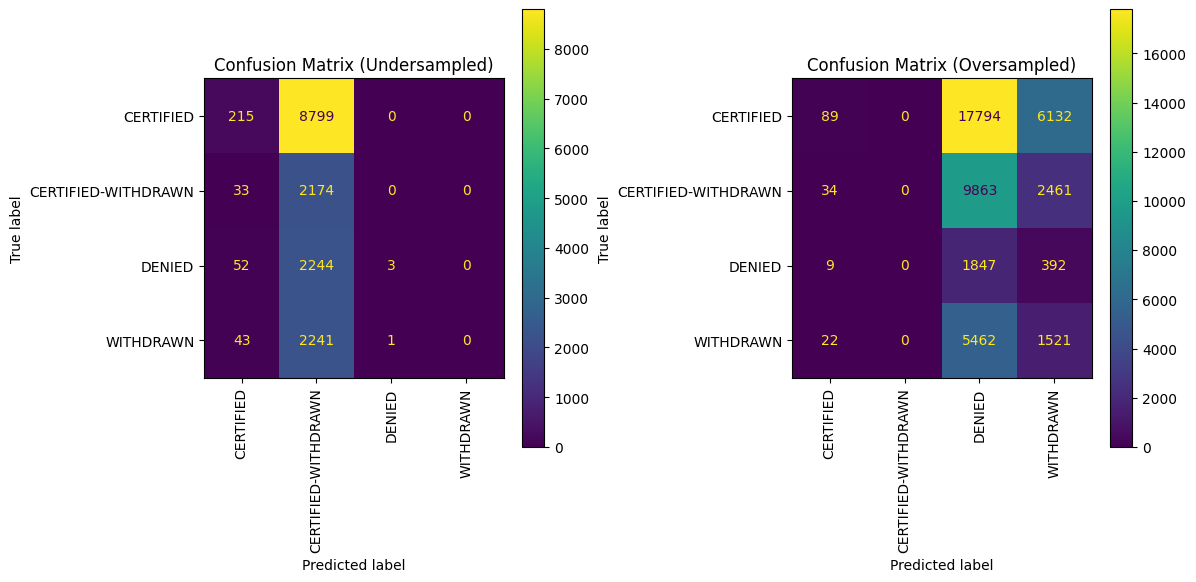

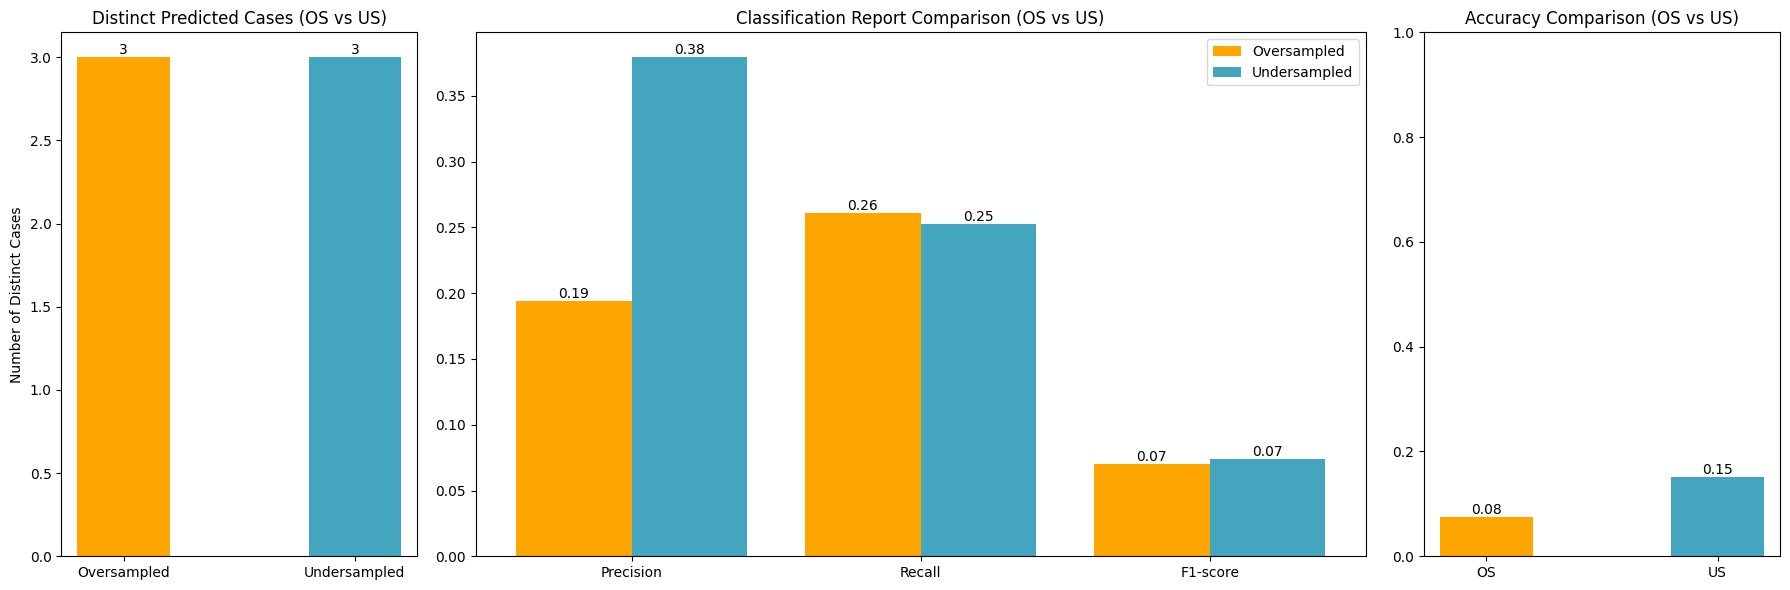

In [81]:
plot_classification_results(
    perceptron_conf_matrix_OS,        
    perceptron_conf_matrix_US,        
    perceptron_class_report_OS,       
    perceptron_class_report_US,       
    unique_counts_perceptron_OS,      
    unique_counts_perceptron_US,      
    perceptron_accuracy_OS,           
    perceptron_accuracy_US,           
    label_map                 
)

In [82]:
perceptron_model_minmax_US = Perceptron(random_state=None)

perceptron_accuracy_minmax_US, perceptron_conf_matrix_minmax_US, perceptron_class_report_minmax_US, unique_counts_perceptron_minmax_US = evaluate_model(
    perceptron_model_minmax_US, X_train_minmax_US, y_train_US, X_test_minmax_US, y_test_US
)

# print(f"Perceptron Accuracy (MinMax, US): {perceptron_accuracy_minmax_US:.2f}")
# print("Perceptron Confusion Matrix (MinMax, US):")
# print(perceptron_conf_matrix_minmax_US)
# print("Perceptron Classification Report (MinMax, US):")
# print(perceptron_class_report_minmax_US)
# print("Unique Counts of Perceptron Predictions (MinMax, US):")
# print(unique_counts_perceptron_minmax_US)

In [83]:
perceptron_model_minmax_OS = Perceptron(random_state=None)

perceptron_accuracy_minmax_OS, perceptron_conf_matrix_minmax_OS, perceptron_class_report_minmax_OS, unique_counts_perceptron_minmax_OS = evaluate_model(
    perceptron_model_minmax_OS, X_train_minmax_OS, y_train_OS, X_test_minmax_OS, y_test_OS
)

# print(f"Perceptron Accuracy (MinMax, Oversampled): {perceptron_accuracy_minmax_OS:.2f}")
# print("Perceptron Confusion Matrix (MinMax, Oversampled):")
# print(perceptron_conf_matrix_minmax_OS)
# print("Perceptron Classification Report (MinMax, Oversampled):")
# print(perceptron_class_report_minmax_OS)
# print("Unique Counts of Perceptron Predictions (MinMax, Oversampled):")
# print(unique_counts_perceptron_minmax_OS)



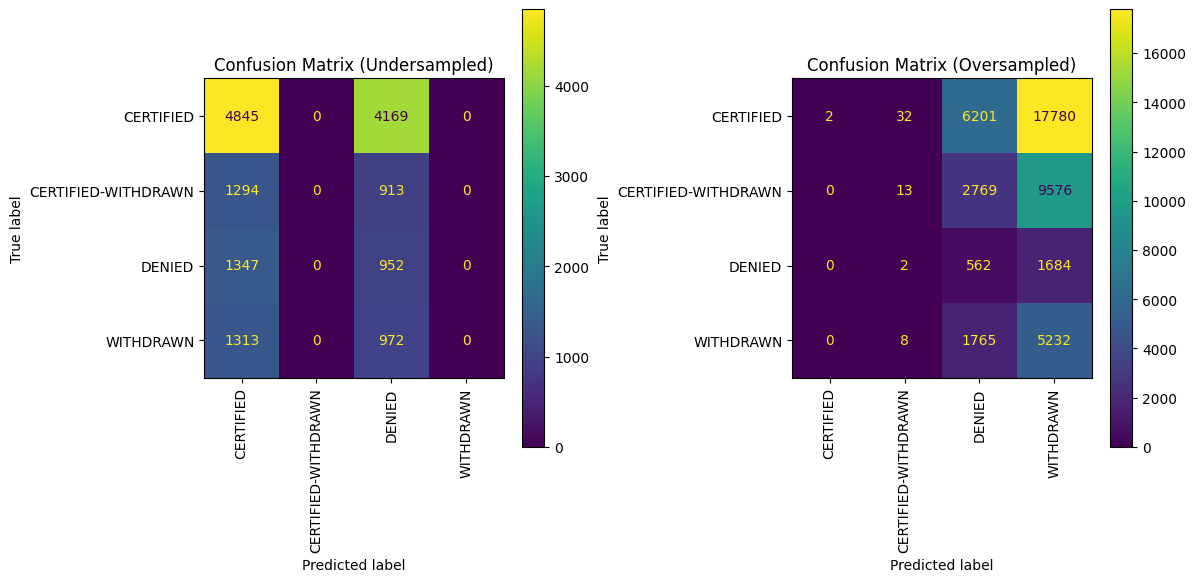

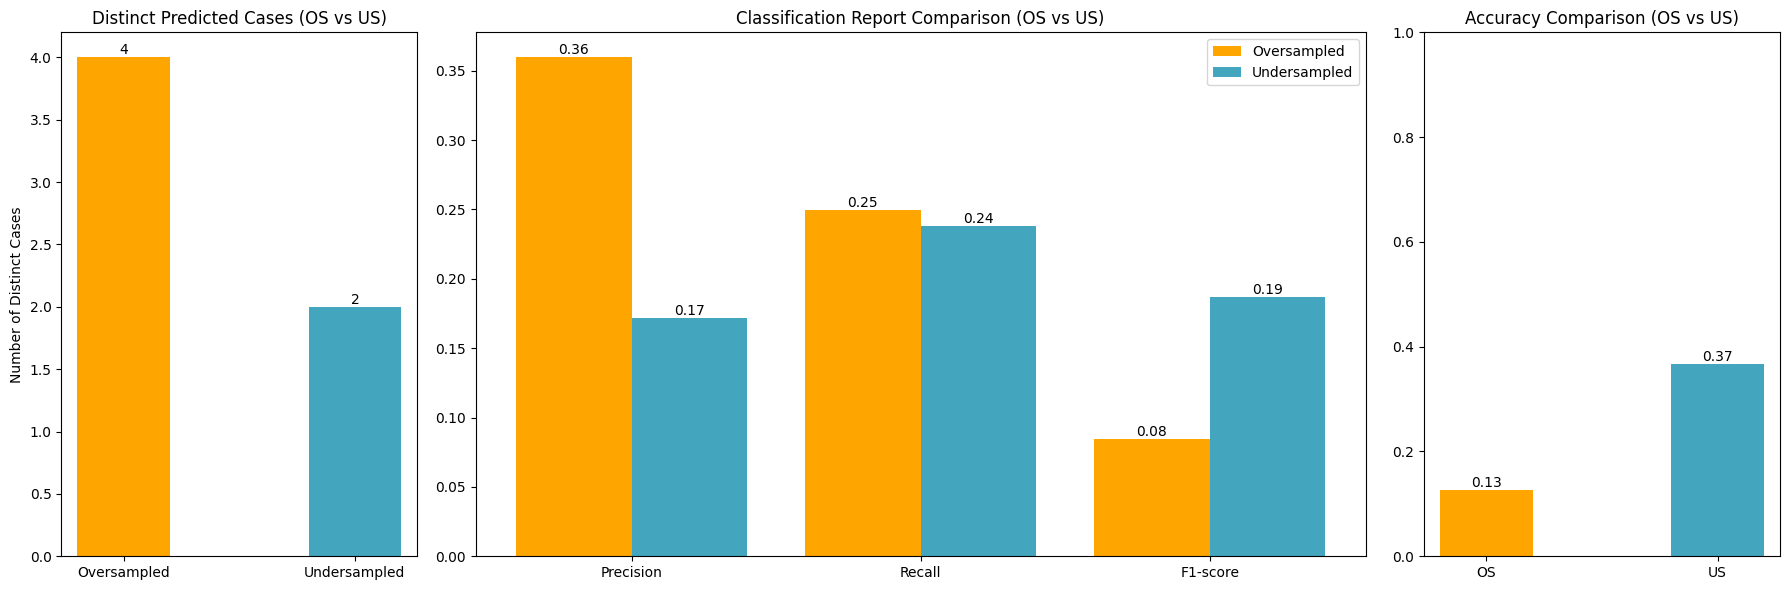

In [84]:
plot_classification_results(
    perceptron_conf_matrix_minmax_OS,        
    perceptron_conf_matrix_minmax_US,        
    perceptron_class_report_minmax_OS,       
    perceptron_class_report_minmax_US,       
    unique_counts_perceptron_minmax_OS,      
    unique_counts_perceptron_minmax_US,      
    perceptron_accuracy_minmax_OS,           
    perceptron_accuracy_minmax_US,           
    label_map                 
)


### XGBoost over Undersampled

In [85]:
le_y_xgb_US = LabelEncoder()
y_xgb_encoded_US = le_y_xgb_US.fit_transform(y_undersampled)

X_train_xgb_US, X_test_xgb_US, y_train_xgb_US, y_test_xgb_US = train_test_split(X_undersampled, y_xgb_encoded_US, test_size=0.2, random_state=42)


xgb_model_US = XGBClassifier( eval_metric='logloss', enable_categorical=True)

xgb_model_US.fit(X_train_xgb_US, y_train_xgb_US)

y_xgb_pred_US = xgb_model_US.predict(X_test_xgb_US)

xgb_accuracy_US = accuracy_score(y_test_xgb_US, y_xgb_pred_US)
xgb_conf_matrix_US = confusion_matrix(y_test_xgb_US, y_xgb_pred_US)
xgb_class_report_US = classification_report(y_test_xgb_US, y_xgb_pred_US, zero_division=0)

# print(f'XGBoost Accuracy: {xgb_accuracy_US:.2f}')
# print('XGBoost Confusion Matrix:')
# print(xgb_conf_matrix_US)
# print('XGBoost Classification Report:')
# print(xgb_class_report_US)

predictions_xgb_US = pd.DataFrame({
    'Actual': y_test_xgb_US,
    'Predicted': y_xgb_pred_US
})

unique_counts_xgb_US = predictions_xgb_US['Predicted'].value_counts()

### XGBoost over Oversampled

In [86]:

le_y_xgb_OS = LabelEncoder()
y_xgb_encoded_OS = le_y_xgb_OS.fit_transform(y_OS)

# Convert object columns to categorical type and encode them
categorical_columns = ['VISA_CLASS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'EMPLOYER_NAME', 
                       'SOC_CODE', 'JOB_TITLE', 'WORKSITE', 'COLI']

for col in categorical_columns:
    le = LabelEncoder()  
    X_OS.loc[:, col] = le.fit_transform(X_OS[col].astype(str))  # Convert to integers

# Convert to categorical type
X_OS[categorical_columns] = X_OS[categorical_columns].astype('category')

X_train_xgb_OS, X_test_xgb_OS, y_train_xgb_OS, y_test_xgb_OS = train_test_split(X_OS, y_xgb_encoded_OS, test_size=0.2, random_state=42)

xgb_model_OS = XGBClassifier(eval_metric='logloss', enable_categorical=True)

xgb_model_OS.fit(X_train_xgb_OS, y_train_xgb_OS)

y_xgb_pred_OS = xgb_model_OS.predict(X_test_xgb_OS)

xgb_accuracy_OS = accuracy_score(y_test_xgb_OS, y_xgb_pred_OS)
xgb_conf_matrix_OS = confusion_matrix(y_test_xgb_OS, y_xgb_pred_OS)
xgb_class_report_OS = classification_report(y_test_xgb_OS, y_xgb_pred_OS, zero_division=0)

# print(f'XGBoost Accuracy: {xgb_accuracy_OS:.2f}')
# print('XGBoost Confusion Matrix:')
# print(xgb_conf_matrix_OS)
# print('XGBoost Classification Report:')
# print(xgb_class_report_OS)

predictions_xgb_OS = pd.DataFrame({
    'Actual': y_test_xgb_OS,
    'Predicted': y_xgb_pred_OS
})

unique_counts_xgb_OS = predictions_xgb_OS['Predicted'].value_counts()

C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2220137078.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_OS[categorical_columns] = X_OS[categorical_columns].astype('category')


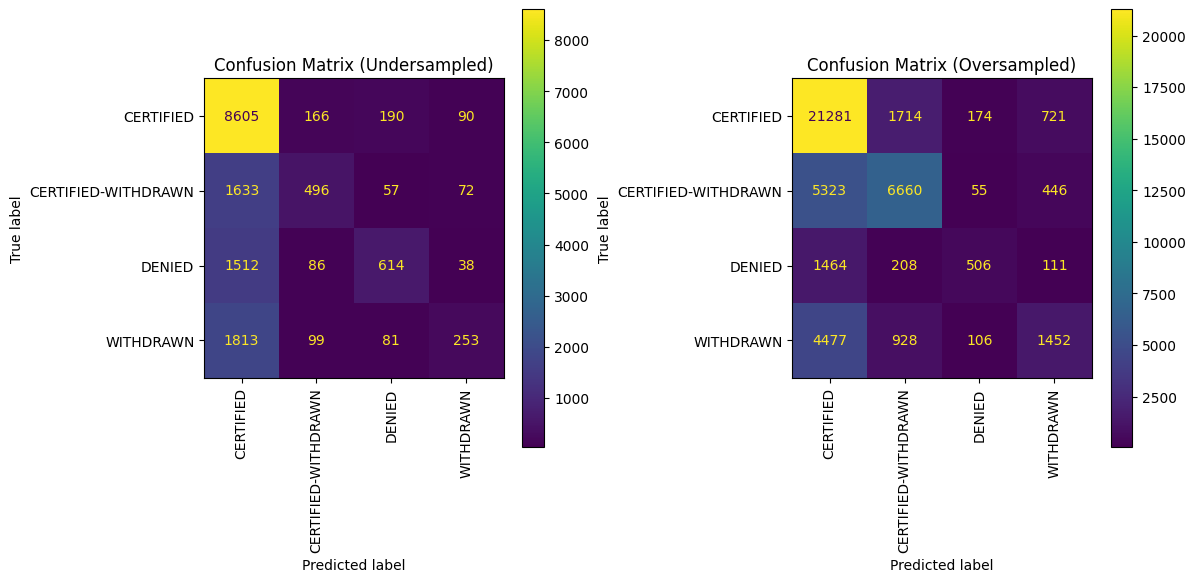

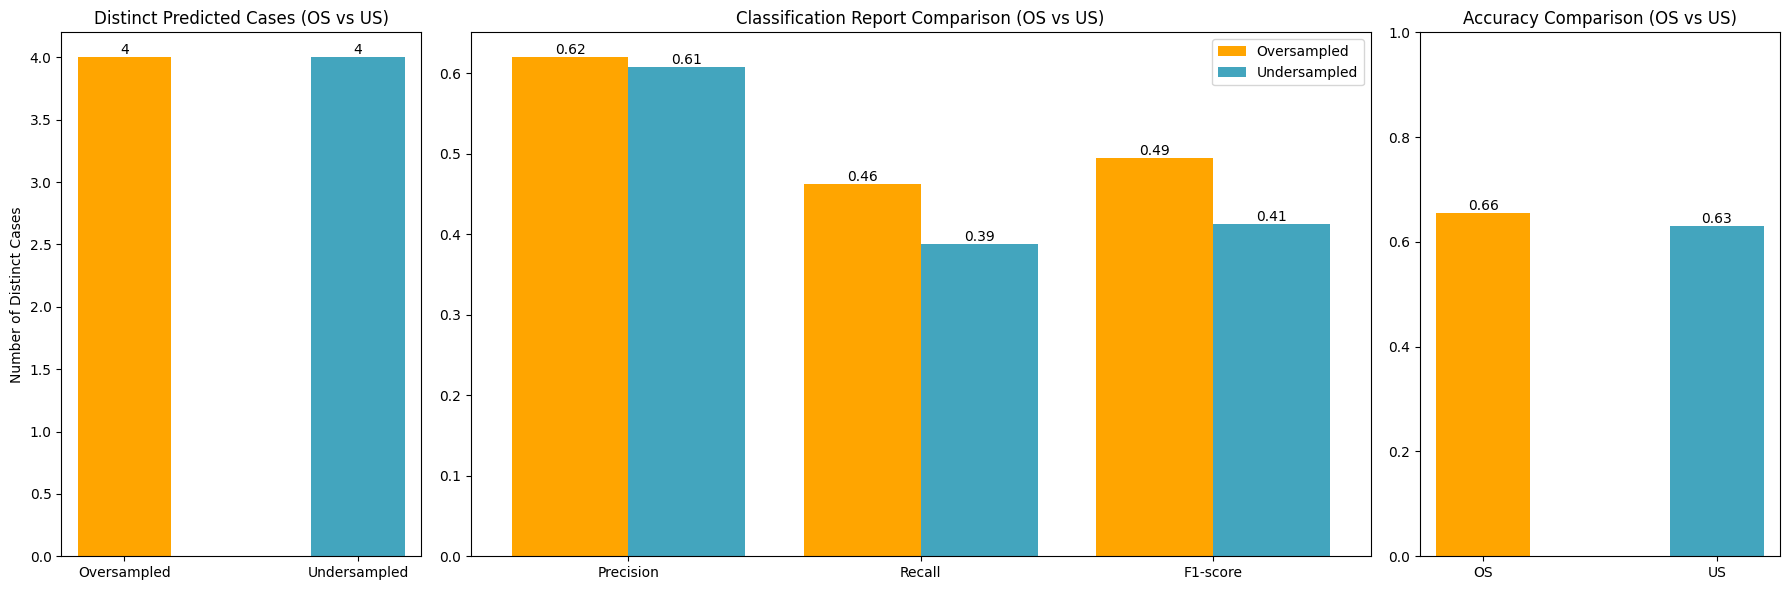

In [87]:
label_map = {'CERTIFIED': 0, 'CERTIFIED-WITHDRAWN': 1, 'DENIED': 2, 'WITHDRAWN': 3}
labels = list(label_map.keys())

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for Undersampled data
disp_us = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix_US, display_labels=labels)
disp_us.plot(ax=axs[0], cmap=plt.cm.viridis)  
axs[0].set_title("Confusion Matrix (Undersampled)")
axs[0].tick_params(axis='x', rotation=90)

# Plot the confusion matrix for Oversampled data
disp_os = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix_OS, display_labels=labels)
disp_os.plot(ax=axs[1], cmap=plt.cm.viridis)  
axs[1].set_title("Confusion Matrix (Oversampled)")
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# Count the number of distinct predicted cases
distinct_cases_OS = len(unique_counts_xgb_OS)
distinct_cases_US = len(unique_counts_xgb_US)

# Extract classification report metrics for OS and US
def extract_report_data(report):
    lines = report.split('\n')
    data = []
    for line in lines[2:6]:
        line_data = line.split()
        data.append([float(line_data[1]), float(line_data[2]), float(line_data[3])])  # precision, recall, f1-score
    return np.array(data)

metrics_OS = extract_report_data(xgb_class_report_OS)
metrics_US = extract_report_data(xgb_class_report_US)
metrics_labels = ['Precision', 'Recall', 'F1-score']

colors = ['orange', '#43A5BE']  

fig, axs = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2.5, 1]})

# Plot 1: Distinct Predicted Cases (Oversampled vs Undersampled)
bars1 = axs[0].bar(['Oversampled', 'Undersampled'], [distinct_cases_OS, distinct_cases_US], width=0.4, color=colors)
axs[0].set_title('Distinct Predicted Cases (OS vs US)')
axs[0].set_ylabel('Number of Distinct Cases')

for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Plot 2: Classification Report Metrics (Precision, Recall, F1-score)
x = np.arange(len(metrics_labels))
bars2_1 = axs[1].bar(x - 0.2, metrics_OS.mean(axis=0), 0.4, label='Oversampled', color=colors[0])
bars2_2 = axs[1].bar(x + 0.2, metrics_US.mean(axis=0), 0.4, label='Undersampled', color=colors[1])
axs[1].set_title('Classification Report Comparison (OS vs US)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(metrics_labels)
axs[1].legend()

for bar in bars2_1:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

for bar in bars2_2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

# Plot 3: Accuracy Comparison (Oversampled vs Undersampled)
bars3 = axs[2].bar(['OS', 'US'], [xgb_accuracy_OS, xgb_accuracy_US], width=0.4, color=colors)
axs[2].set_title('Accuracy Comparison (OS vs US)')
axs[2].set_ylim([0, 1])

for bar in bars3:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Plotting all Models accuracy for undersampled data

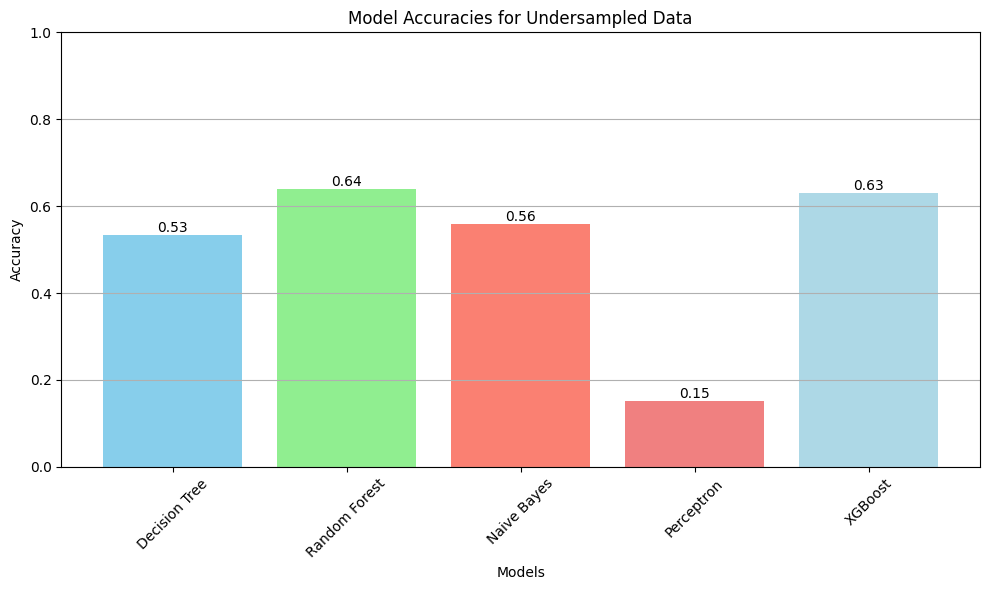

In [88]:
accuracies_US = {
    'Decision Tree': accuracy_dtrees_US,
    'Random Forest': rf_accuracy_US,  
    'Naive Bayes': nb_accuracy_US,      
    'Perceptron': perceptron_accuracy_US, 
    'XGBoost': xgb_accuracy_US
}

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(accuracies_US)), accuracies_US.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])

plt.xticks(range(len(accuracies_US)), accuracies_US.keys(), rotation=45)
plt.title('Model Accuracies for Undersampled Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.grid(axis='y')

# Display the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout() 
plt.show()


### Plotting all models accuracy for oversampled data

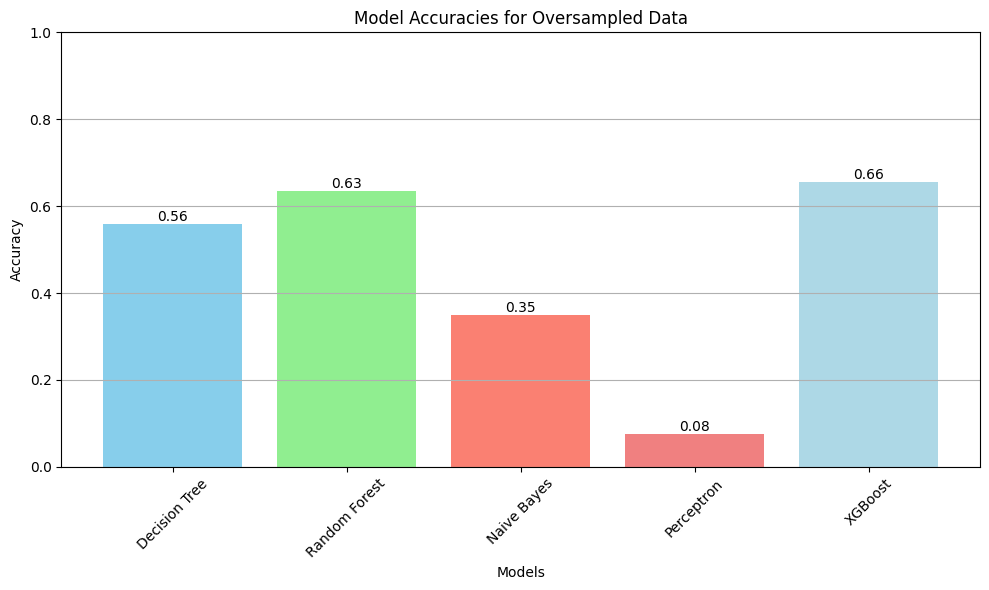

In [89]:
accuracies_OS = {
    'Decision Tree': accuracy_dtrees_OS,
    'Random Forest': rf_accuracy_OS,  
    'Naive Bayes': nb_accuracy_OS,      
    'Perceptron': perceptron_accuracy_OS,  
    'XGBoost': xgb_accuracy_OS
}

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(accuracies_OS)), accuracies_OS.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])

plt.xticks(range(len(accuracies_OS)), accuracies_OS.keys(), rotation=45)
plt.title('Model Accuracies for Oversampled Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()  
plt.show()


In [90]:

le_y_xgb_US = LabelEncoder()
y_xgb_encoded_US = le_y_xgb_US.fit_transform(y_undersampled)

X_train_xgb_US, X_test_xgb_US, y_train_xgb_US, y_test_xgb_US = train_test_split(X_undersampled, y_xgb_encoded_US, test_size=0.2, random_state=42)

# Perform Min-Max Scaling
X_train_xgb_US[columns_to_scale] = scaler.fit_transform(X_train_xgb_US[columns_to_scale])  # Fit and transform on train data
X_test_xgb_US[columns_to_scale] = scaler.transform(X_test_xgb_US[columns_to_scale])  

X_train_minmax_xgb_US = X_train_xgb_US  
X_test_minmax_xgb_US = X_test_xgb_US

xgb_model_minmax_US = XGBClassifier( eval_metric='logloss', enable_categorical=True)

xgb_model_minmax_US.fit(X_train_minmax_xgb_US, y_train_xgb_US)

y_xgb_pred_US = xgb_model_minmax_US.predict(X_test_minmax_xgb_US)

xgb_accuracy_minmax_US = accuracy_score(y_test_xgb_US, y_xgb_pred_US)
xgb_conf_matrix_minmax_US = confusion_matrix(y_test_xgb_US, y_xgb_pred_US)
xgb_class_report_minmax_US = classification_report(y_test_xgb_US, y_xgb_pred_US, zero_division=0)

# print(f'XGBoost Accuracy: {xgb_accuracy_US:.2f}')
# print('XGBoost Confusion Matrix:')
# print(xgb_conf_matrix_US)
# print('XGBoost Classification Report:')
# print(xgb_class_report_US)

predictions_xgb_minmax_US = pd.DataFrame({
    'Actual': y_test_xgb_US,
    'Predicted': y_xgb_pred_US
})

unique_counts_xgb_minmax_US = predictions_xgb_minmax_US['Predicted'].value_counts()

In [91]:

le_y_xgb_OS = LabelEncoder()
y_xgb_encoded_OS = le_y_xgb_OS.fit_transform(y_OS)

# Convert object columns to categorical type and encode them
categorical_columns = ['VISA_CLASS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'EMPLOYER_NAME', 
                       'SOC_CODE', 'JOB_TITLE', 'WORKSITE', 'COLI']

for col in categorical_columns:
    le = LabelEncoder()  
    X_OS.loc[:, col] = le.fit_transform(X_OS[col].astype(str))  # Convert to integers

# Convert to categorical type
X_OS[categorical_columns] = X_OS[categorical_columns].astype('category')

X_train_xgb_OS, X_test_xgb_OS, y_train_xgb_OS, y_test_xgb_OS = train_test_split(X_OS, y_xgb_encoded_OS, test_size=0.2, random_state=42)

# Perform Min-Max Scaling
X_train_xgb_OS[columns_to_scale] = scaler.fit_transform(X_train_xgb_OS[columns_to_scale])  # Fit and transform on train data
X_test_xgb_OS[columns_to_scale] = scaler.transform(X_test_xgb_OS[columns_to_scale])  

X_train_xgb_minmax_OS = X_train_xgb_OS  
X_test_xgb_minmax_OS = X_test_xgb_OS

xgb_model_minmax_OS = XGBClassifier(eval_metric='logloss', enable_categorical=True)

xgb_model_minmax_OS.fit(X_train_xgb_minmax_OS, y_train_xgb_OS)

y_xgb_pred_OS = xgb_model_minmax_OS.predict(X_test_xgb_minmax_OS)

xgb_accuracy_minmax_OS = accuracy_score(y_test_xgb_OS, y_xgb_pred_OS)
xgb_conf_matrix_minmax_OS = confusion_matrix(y_test_xgb_OS, y_xgb_pred_OS)
xgb_class_report_minmax_OS = classification_report(y_test_xgb_OS, y_xgb_pred_OS, zero_division=0)

# print(f'XGBoost Accuracy: {xgb_accuracy_OS:.2f}')
# print('XGBoost Confusion Matrix:')
# print(xgb_conf_matrix_OS)
# print('XGBoost Classification Report:')
# print(xgb_class_report_OS)

predictions_xgb_minmax_OS = pd.DataFrame({
    'Actual': y_test_xgb_OS,
    'Predicted': y_xgb_pred_OS
})

unique_counts_xgb_minmax_OS = predictions_xgb_minmax_OS['Predicted'].value_counts()

C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2045025297.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_OS[categorical_columns] = X_OS[categorical_columns].astype('category')


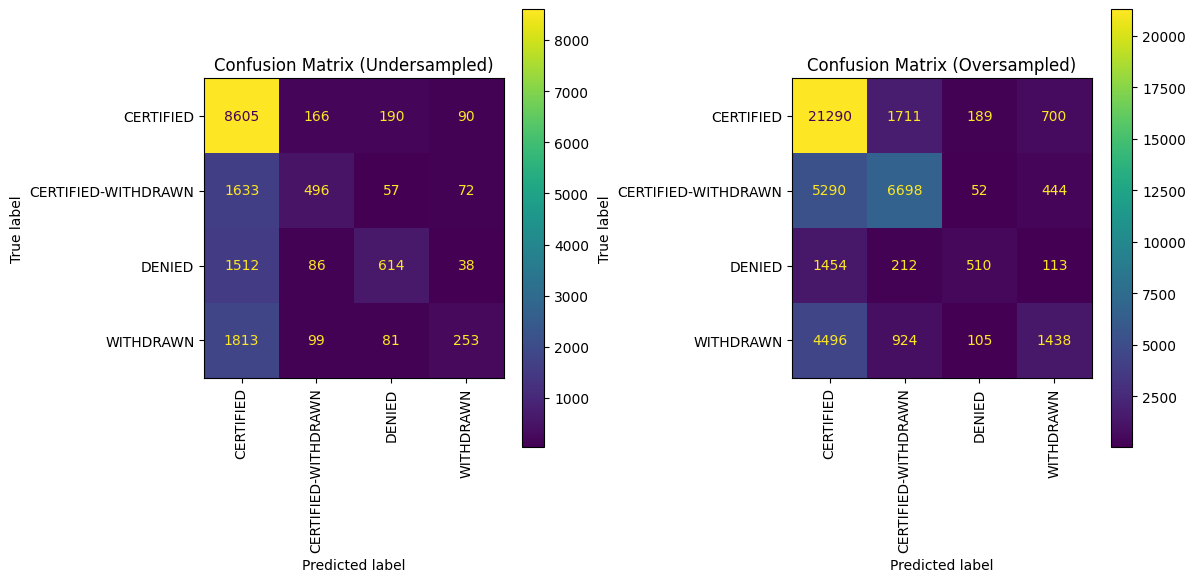

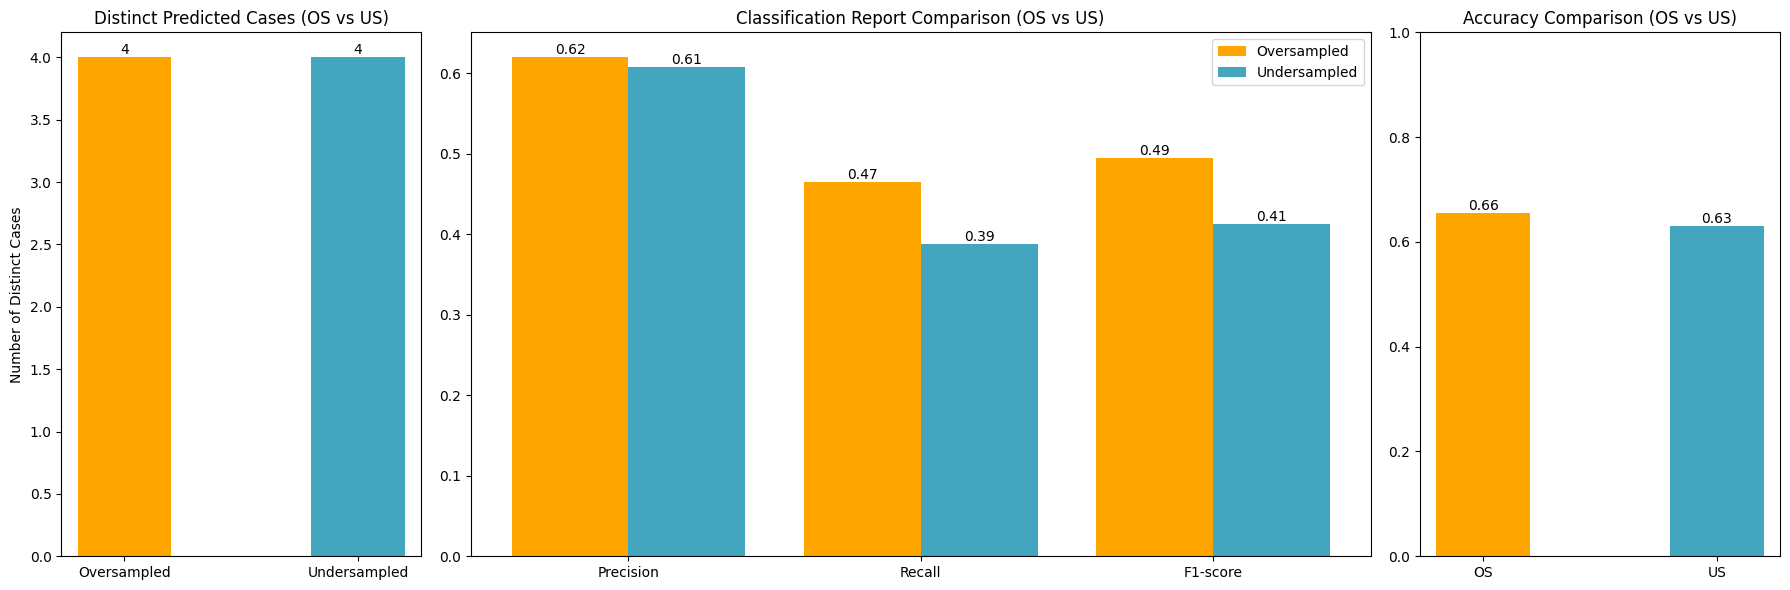

In [92]:
label_map = {'CERTIFIED': 0, 'CERTIFIED-WITHDRAWN': 1, 'DENIED': 2, 'WITHDRAWN': 3}
labels = list(label_map.keys())

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for Undersampled data
disp_us = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix_minmax_US, display_labels=labels)
disp_us.plot(ax=axs[0], cmap=plt.cm.viridis)  
axs[0].set_title("Confusion Matrix (Undersampled)")
axs[0].tick_params(axis='x', rotation=90)

# Plot the confusion matrix for Oversampled data
disp_os = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix_minmax_OS, display_labels=labels)
disp_os.plot(ax=axs[1], cmap=plt.cm.viridis)  
axs[1].set_title("Confusion Matrix (Oversampled)")
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# Count the number of distinct predicted cases
distinct_cases_minmax_OS = len(unique_counts_xgb_minmax_OS)
distinct_cases_minmax_US = len(unique_counts_xgb_minmax_US)

# Extract classification report metrics for OS and US
def extract_report_data(report):
    lines = report.split('\n')
    data = []
    for line in lines[2:6]:
        line_data = line.split()
        data.append([float(line_data[1]), float(line_data[2]), float(line_data[3])])  # precision, recall, f1-score
    return np.array(data)

metrics_OS = extract_report_data(xgb_class_report_minmax_OS)
metrics_US = extract_report_data(xgb_class_report_minmax_US)
metrics_labels = ['Precision', 'Recall', 'F1-score']

colors = ['orange', '#43A5BE']  

fig, axs = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2.5, 1]})

# Plot 1: Distinct Predicted Cases (Oversampled vs Undersampled)
bars1 = axs[0].bar(['Oversampled', 'Undersampled'], [distinct_cases_minmax_OS, distinct_cases_minmax_US], width=0.4, color=colors)
axs[0].set_title('Distinct Predicted Cases (OS vs US)')
axs[0].set_ylabel('Number of Distinct Cases')

for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Plot 2: Classification Report Metrics (Precision, Recall, F1-score)
x = np.arange(len(metrics_labels))
bars2_1 = axs[1].bar(x - 0.2, metrics_OS.mean(axis=0), 0.4, label='Oversampled', color=colors[0])
bars2_2 = axs[1].bar(x + 0.2, metrics_US.mean(axis=0), 0.4, label='Undersampled', color=colors[1])
axs[1].set_title('Classification Report Comparison (OS vs US)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(metrics_labels)
axs[1].legend()

for bar in bars2_1:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

for bar in bars2_2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

# Plot 3: Accuracy Comparison (Oversampled vs Undersampled)
bars3 = axs[2].bar(['OS', 'US'], [xgb_accuracy_minmax_OS, xgb_accuracy_minmax_US], width=0.4, color=colors)
axs[2].set_title('Accuracy Comparison (OS vs US)')
axs[2].set_ylim([0, 1])

for bar in bars3:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


## K-Fold Cross Validation

In [93]:
# K-Fold Setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold cross-validation

classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(random_state=None)
}

classifiers_xgb = {
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=0, enable_categorical=True)
}

# Function to run K-Fold cross-validation for each model
def run_kfold(X, y, classifiers, kf):
    results = {}
    for name, clf in classifiers.items():
        print(f"Running {name}...")
        fold_accuracies = []
        fold_class_reports = []
        fold_conf_matrices = []

        # Loop through K-Folds
        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)
            class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

            fold_accuracies.append(accuracy)
            fold_conf_matrices.append(conf_matrix)
            fold_class_reports.append(class_report)

        # Store results for each classifier
        results[name] = {
            "accuracies": fold_accuracies,
            "confusion_matrices": fold_conf_matrices,
            "classification_reports": fold_class_reports
        }

    return results
y_normal = df['CASE_STATUS']
X_normal = df.loc[:, df.columns != 'CASE_STATUS']

# Encode categorical features for Decision Tree, Random Forest, and Naive Bayes
categorical_columns = X_normal.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    X_normal.loc[:, col] = le.fit_transform(X_normal[col].astype(str))

# For XGBoost, categorical columns are converted properly
X_normal_xgb = df.loc[:, df.columns != 'CASE_STATUS']  
for col in ['VISA_CLASS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'EMPLOYER_NAME', 
    'SOC_CODE', 'JOB_TITLE', 'WORKSITE', 'COLI']:
    X_normal_xgb[col] = le.fit_transform(X_normal_xgb[col].astype(str))  # Convert to integers

all_results = {
    "unsampled": {},
    "undersampled": {},
    "oversampled": {}
}

# Run K-Fold cross-validation for unsampled data
all_results["unsampled"]["classifiers"] = run_kfold(X_normal, y_normal, classifiers, kf)
all_results["unsampled"]["classifiers_xgb"] = run_kfold(X_normal_xgb, y_normal, classifiers_xgb, kf)

# Prepare Undersampled Data
y_undersampled = df_undersampled['CASE_STATUS']
X_undersampled = df_undersampled.loc[:, df_undersampled.columns != 'CASE_STATUS']
for col in X_undersampled.select_dtypes(include=['object']).columns:
    X_undersampled[col] = le.fit_transform(X_undersampled[col].astype(str))

# For XGBoost in undersampled data
X_undersampled_xgb = X_undersampled.copy()
for col in X_undersampled.select_dtypes(include=['object']).columns:
    X_undersampled_xgb[col] = pd.Categorical(X_undersampled_xgb[col])

# Run K-Fold cross-validation for undersampled data
all_results["undersampled"]["classifiers"] = run_kfold(X_undersampled, y_undersampled, classifiers, kf)
all_results["undersampled"]["classifiers_xgb"] = run_kfold(X_undersampled_xgb, y_undersampled, classifiers_xgb, kf)

# Prepare Oversampled Data
y_OS = df['CASE_STATUS']
X_OS = df.loc[:, df.columns != 'CASE_STATUS']
for col in X_OS.select_dtypes(include=['object']).columns:
    X_OS[col] = le.fit_transform(X_OS[col].astype(str))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_OS_resampled, y_OS_resampled = smote.fit_resample(X_OS, y_OS)

# For XGBoost in oversampled data
X_OS_resampled_xgb = X_OS_resampled.copy()
for col in X_OS_resampled.select_dtypes(include=['object']).columns:
    X_OS_resampled_xgb[col] = pd.Categorical(X_OS_resampled_xgb[col])

# Run K-Fold cross-validation for oversampled data
all_results["oversampled"]["classifiers"] = run_kfold(X_OS_resampled, y_OS_resampled, classifiers, kf)
all_results["oversampled"]["classifiers_xgb"] = run_kfold(X_OS_resampled_xgb, y_OS_resampled, classifiers_xgb, kf)


C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2757658609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_normal_xgb[col] = le.fit_transform(X_normal_xgb[col].astype(str))  # Convert to integers
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2757658609.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_normal_xgb[col] = le.fit_transform(X_normal_xgb[col].astype(str))  # Convert to integers
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2757658609.py:62: SettingWithCopyWarning: 
A value is t

Running Decision Tree...
Running Random Forest...
Running Naive Bayes...
Running Perceptron...
Running XGBoost...


C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2757658609.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_undersampled[col] = le.fit_transform(X_undersampled[col].astype(str))
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2757658609.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_undersampled[col] = le.fit_transform(X_undersampled[col].astype(str))
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2757658609.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Running Decision Tree...
Running Random Forest...
Running Naive Bayes...
Running Perceptron...
Running XGBoost...


C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2757658609.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_OS[col] = le.fit_transform(X_OS[col].astype(str))
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2757658609.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_OS[col] = le.fit_transform(X_OS[col].astype(str))
C:\Users\acer\AppData\Local\Temp\ipykernel_39308\2757658609.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

Running Decision Tree...
Running Random Forest...
Running Naive Bayes...
Running Perceptron...
Running XGBoost...


### Plotting K-fold result

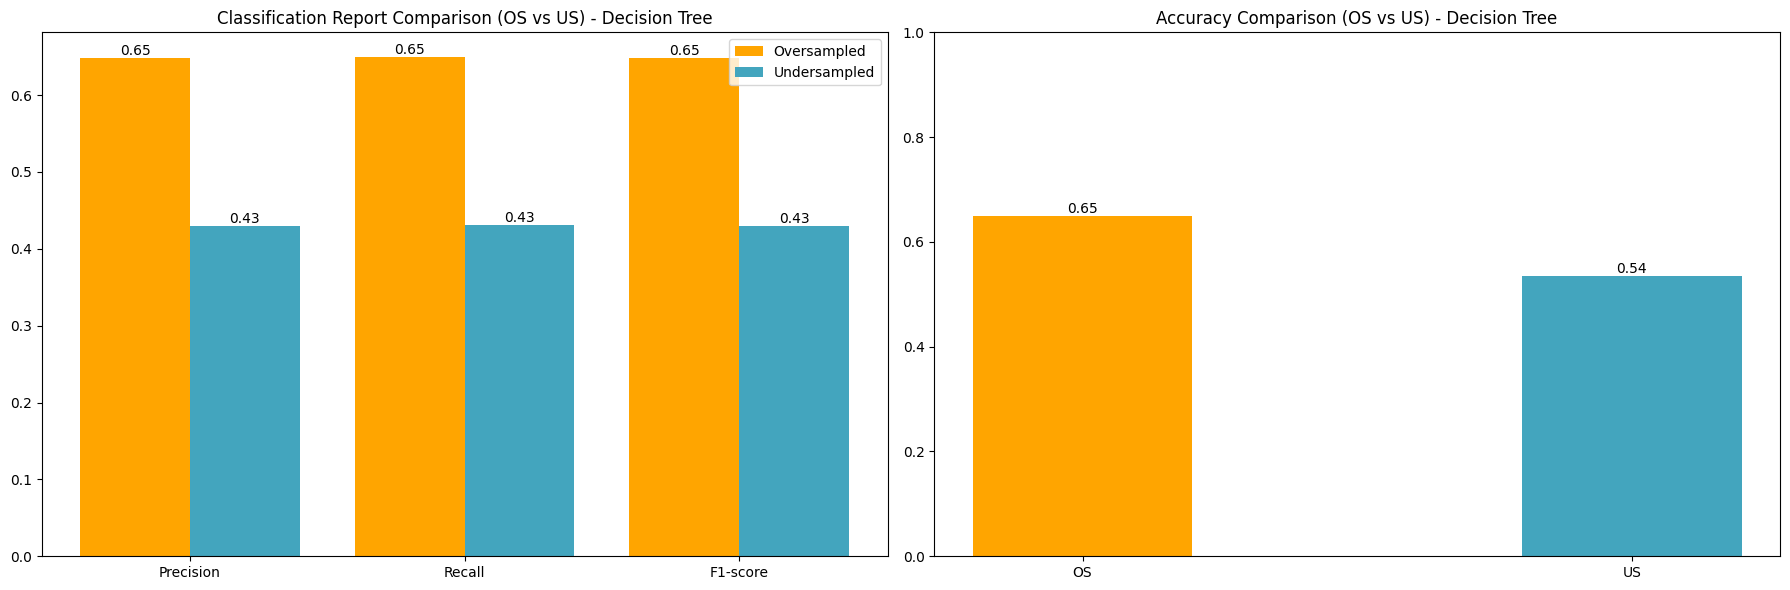

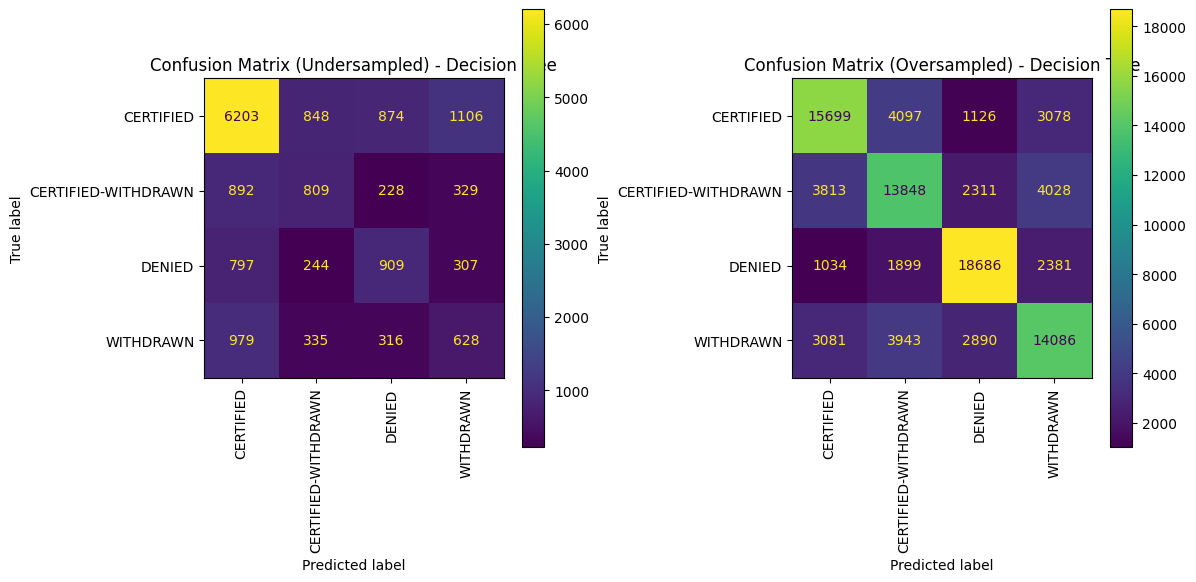

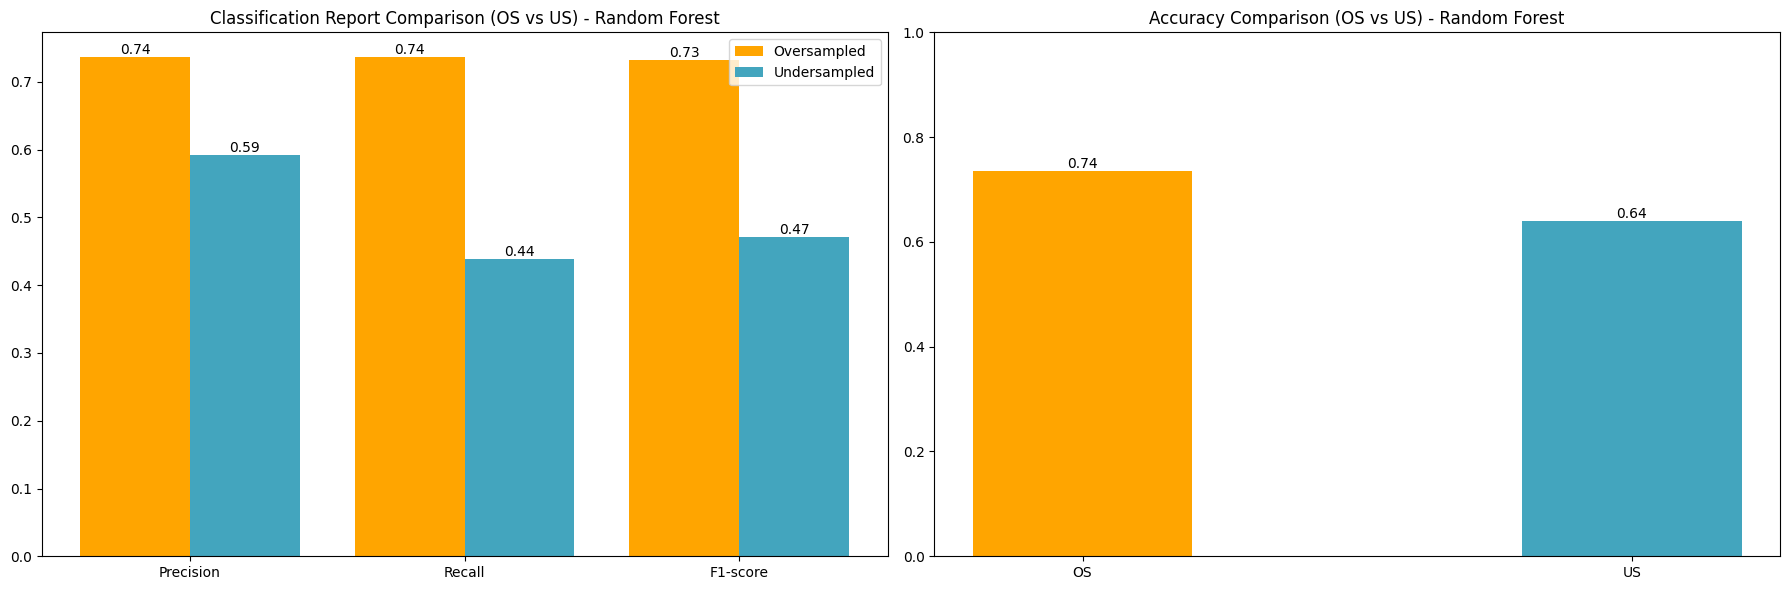

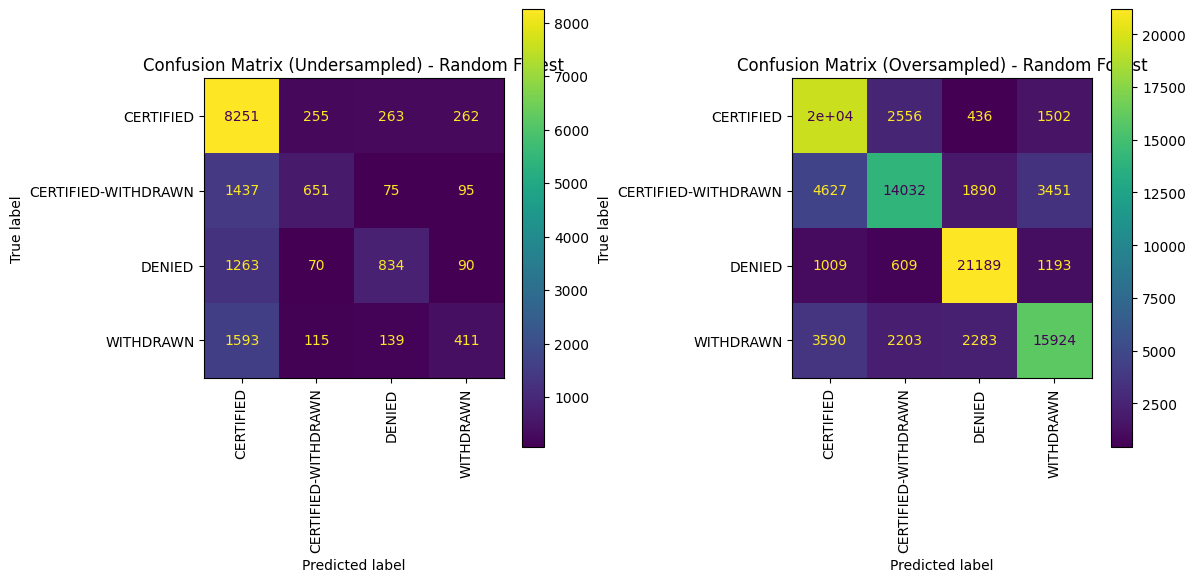

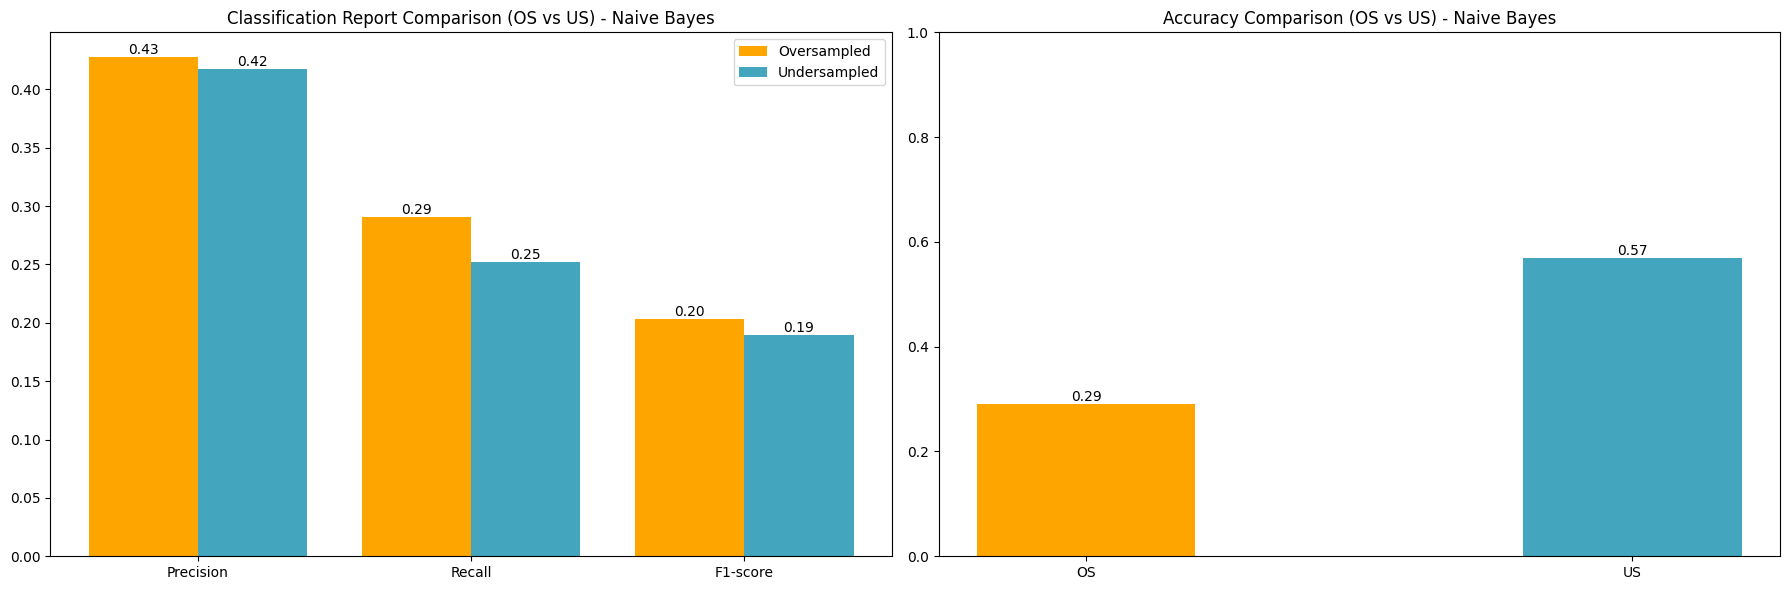

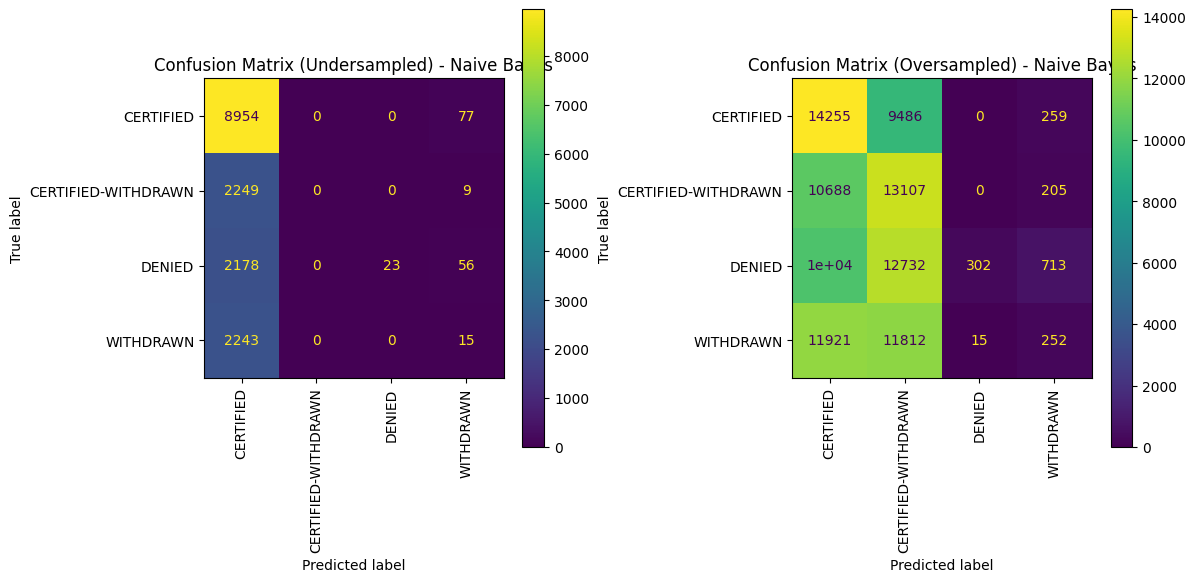

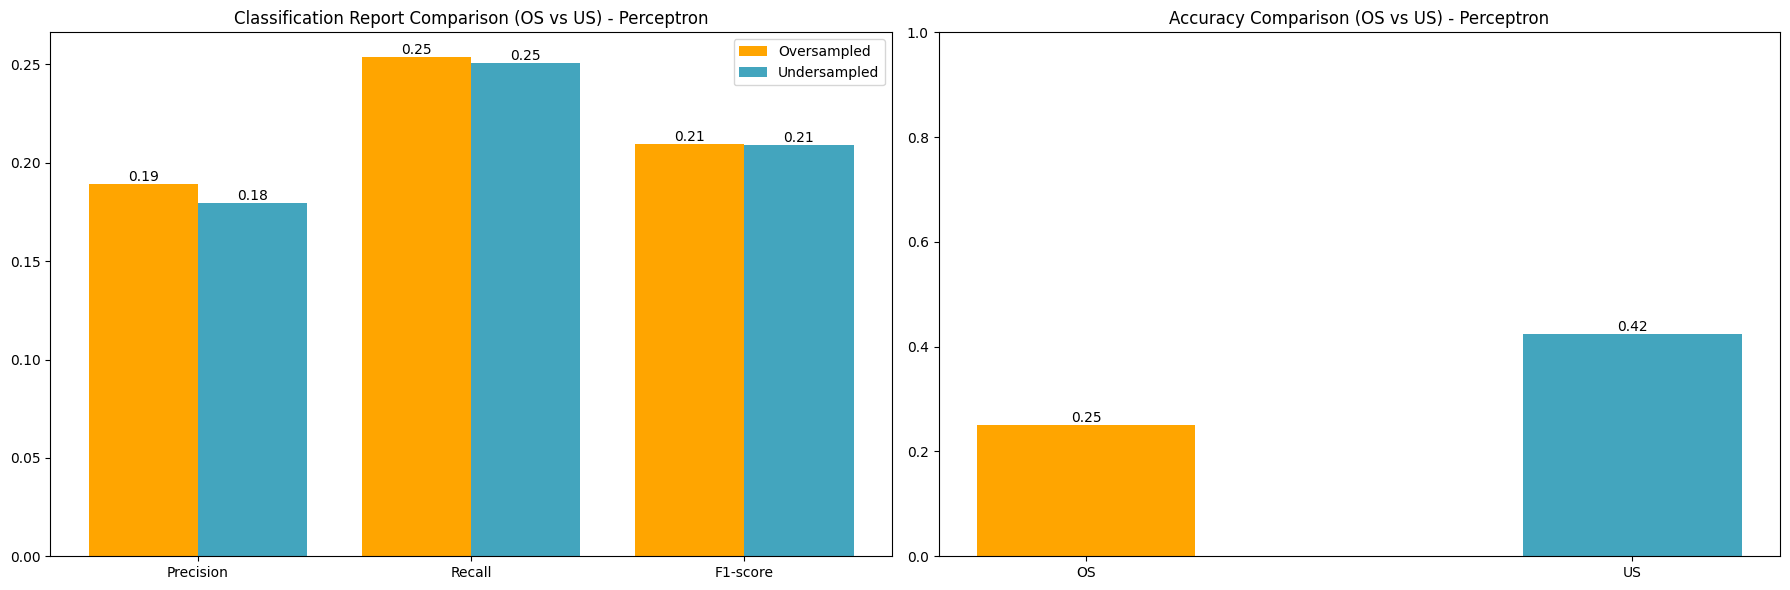

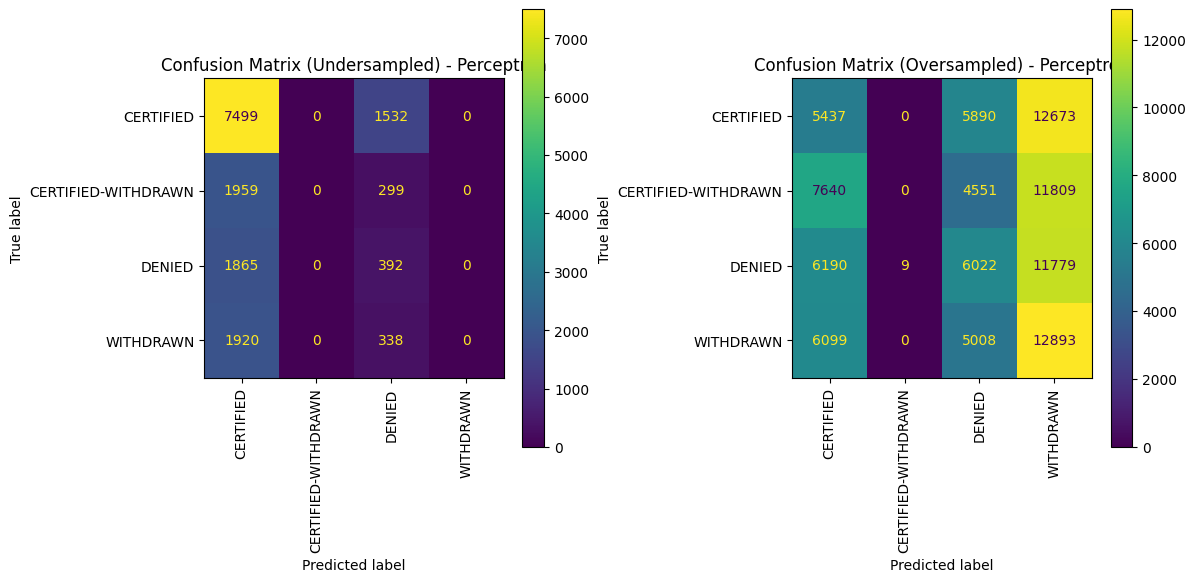

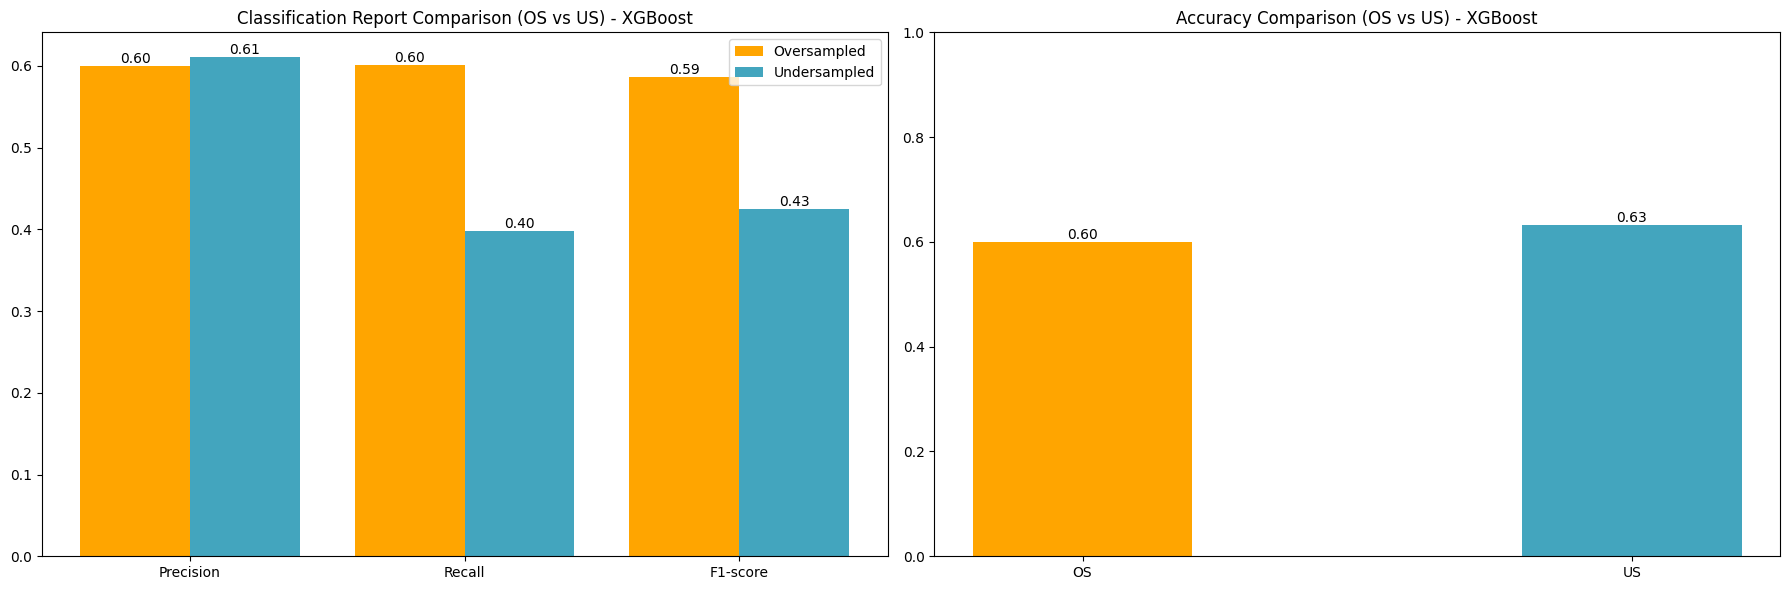

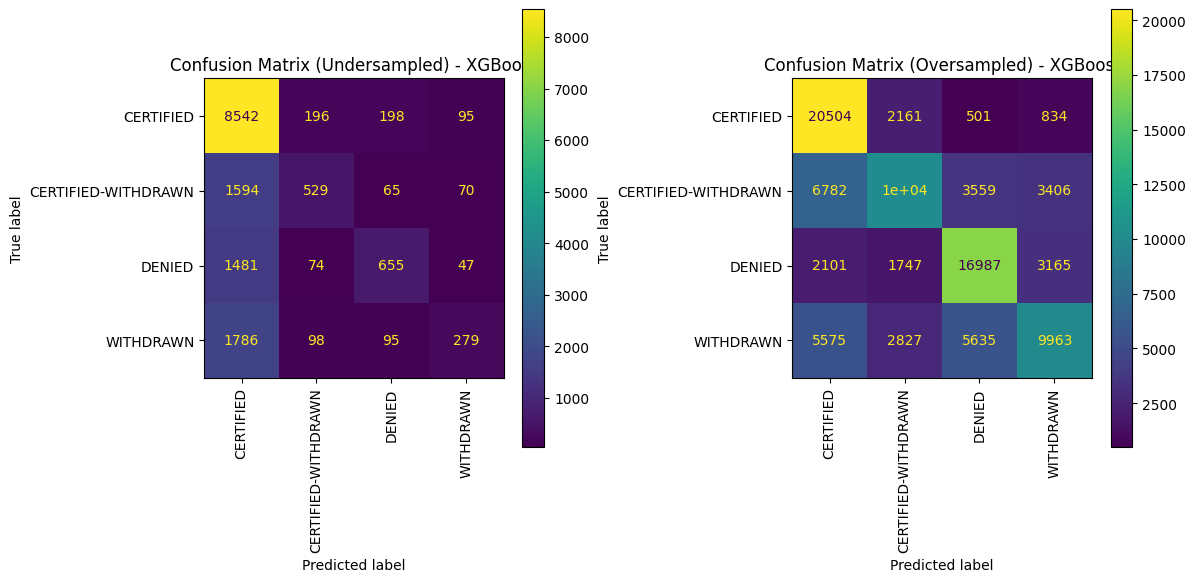

In [94]:
label_map = {'CERTIFIED': 0, 'CERTIFIED-WITHDRAWN': 1, 'DENIED': 2, 'WITHDRAWN': 3}
labels = list(label_map.keys())

# Function to extract precision, recall, and f1-score from the classification report
def extract_report_data(report):
    metrics = np.array([report[str(i)]['precision'] for i in range(len(label_map))])  # Extract precision for each class
    recall = np.array([report[str(i)]['recall'] for i in range(len(label_map))])      # Extract recall for each class
    f1_score = np.array([report[str(i)]['f1-score'] for i in range(len(label_map))])  # Extract F1 score for each class
    return np.array([metrics, recall, f1_score]).T  


# Function to create the plots for each model
def plot_results_for_model(model_name, conf_matrix_US, conf_matrix_OS, class_report_US, class_report_OS, accuracy_US, accuracy_OS, 
                        #    distinct_cases_US, distinct_cases_OS
                           ):
    metrics_OS = extract_report_data(class_report_OS)
    metrics_US = extract_report_data(class_report_US)
    metrics_labels = ['Precision', 'Recall', 'F1-score']
    colors = ['orange', '#43A5BE']  

    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Plot 2: Classification Report Metrics (Precision, Recall, F1-score)
    x = np.arange(len(metrics_labels))
    bars2_1 = axs[0].bar(x - 0.2, metrics_OS.mean(axis=0), 0.4, label='Oversampled', color=colors[0])
    bars2_2 = axs[0].bar(x + 0.2, metrics_US.mean(axis=0), 0.4, label='Undersampled', color=colors[1])
    axs[0].set_title(f'Classification Report Comparison (OS vs US) - {model_name}')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(metrics_labels)
    axs[0].legend()

    # Add value labels on top of the bars for Plot 2
    for bar in bars2_1:
        yval = bar.get_height()
        axs[0].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

    for bar in bars2_2:
        yval = bar.get_height()
        axs[0].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

    # Plot 3: Accuracy Comparison (Oversampled vs Undersampled)
    bars3 = axs[1].bar(['OS', 'US'], [accuracy_OS, accuracy_US], width=0.4, color=colors)
    axs[1].set_title(f'Accuracy Comparison (OS vs US) - {model_name}')
    axs[1].set_ylim([0, 1])

    # Add value labels on top of the bars for Plot 3
    for bar in bars3:
        yval = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Confusion matrix plots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the confusion matrix for Undersampled data
    disp_us = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_US, display_labels=labels)
    disp_us.plot(ax=axs[0], cmap=plt.cm.viridis)
    axs[0].set_title(f"Confusion Matrix (Undersampled) - {model_name}")
    axs[0].tick_params(axis='x', rotation=90)

    # Plot the confusion matrix for Oversampled data
    disp_os = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_OS, display_labels=labels)
    disp_os.plot(ax=axs[1], cmap=plt.cm.viridis)
    axs[1].set_title(f"Confusion Matrix (Oversampled) - {model_name}")
    axs[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Loop through each model in both classifiers and classifiers_xgb, and plot the results
for model_name in classifiers:
    # print(model_dict)
    # for model_name in model_dict.keys():
        
        conf_matrix_US = all_results["undersampled"]["classifiers"][model_name]['confusion_matrices'][-1]  # Confusion matrix for US (last fold)
        conf_matrix_OS = all_results["oversampled"]["classifiers"][model_name]['confusion_matrices'][-1]   # Confusion matrix for OS (last fold)

        class_report_US = all_results["undersampled"]["classifiers"][model_name]['classification_reports'][-1]  # Stored classification report (US)
        class_report_OS = all_results["oversampled"]["classifiers"][model_name]['classification_reports'][-1]   # Stored classification report (OS)

        accuracy_US = np.mean(all_results["undersampled"]["classifiers"][model_name]['accuracies'])  # Mean accuracy (US)
        accuracy_OS = np.mean(all_results["oversampled"]["classifiers"][model_name]['accuracies'])   # Mean accuracy (OS)

        # distinct_cases_US = len(np.unique(all_results["undersampled"]["classifiers"][model_name]['predictions'][-1]))  # Adjust this key based on your structure
        # distinct_cases_OS = len(np.unique(all_results["oversampled"]["classifiers"][model_name]['predictions'][-1]))   # Adjust this key as well
        # print(class_report_US)

        plot_results_for_model(
            model_name,
            conf_matrix_US, conf_matrix_OS,
            class_report_US, class_report_OS,
            accuracy_US, accuracy_OS,
            # distinct_cases_US, distinct_cases_OS
        )

#now plotting for xgb
for model_name in classifiers_xgb:
        # print(all_results["undersampled"]["classifiers"])
    # for model_name in model_dict.keys():
        conf_matrix_US = all_results["undersampled"]["classifiers_xgb"][model_name]['confusion_matrices'][-1]  # Confusion matrix for US (last fold)
        conf_matrix_OS = all_results["oversampled"]["classifiers_xgb"][model_name]['confusion_matrices'][-1]   # Confusion matrix for OS (last fold)

        class_report_US = all_results["undersampled"]["classifiers_xgb"][model_name]['classification_reports'][-1]  # Stored classification report (US)
        class_report_OS = all_results["oversampled"]["classifiers_xgb"][model_name]['classification_reports'][-1]   # Stored classification report (OS)

        accuracy_US = np.mean(all_results["undersampled"]["classifiers_xgb"][model_name]['accuracies'])  # Mean accuracy (US)
        accuracy_OS = np.mean(all_results["oversampled"]["classifiers_xgb"][model_name]['accuracies'])   # Mean accuracy (OS)

        # distinct_cases_US = len(np.unique(all_results["undersampled"]["classifiers"][model_name]['predictions'][-1]))  # Adjust this key based on your structure
        # distinct_cases_OS = len(np.unique(all_results["oversampled"]["classifiers"][model_name]['predictions'][-1]))   # Adjust this key as well
        # print(class_report_US)
        
        plot_results_for_model(
            model_name,
            conf_matrix_US, conf_matrix_OS,
            class_report_US, class_report_OS,
            accuracy_US, accuracy_OS,
            # distinct_cases_US, distinct_cases_OS
        )



### Plotting K-fold cross validation result of models for unsampled data

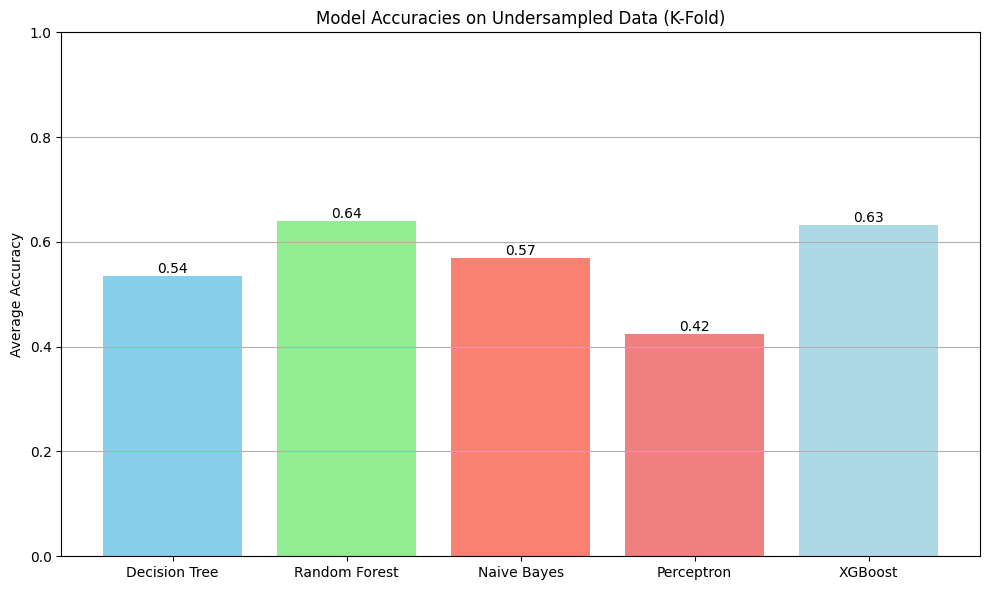

In [95]:
# Extract the accuracies for each model from the undersampled results
undersampled_results = all_results["undersampled"]
x_labels = []
accuracies = []
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue']  #

# Loop through the classifiers and their accuracies
for name, result in undersampled_results["classifiers"].items():
    avg_accuracy = np.mean(result["accuracies"])
    x_labels.append(name)
    accuracies.append(avg_accuracy)

# Include XGBoost accuracies
for name, result in undersampled_results["classifiers_xgb"].items():
    avg_accuracy = np.mean(result["accuracies"])
    x_labels.append(name)
    accuracies.append(avg_accuracy)

plt.figure(figsize=(10, 6))
bars = plt.bar(x_labels, accuracies, color=colors[:len(x_labels)]) 

plt.ylabel('Average Accuracy')
plt.title('Model Accuracies on Undersampled Data (K-Fold)')
plt.ylim(0, 1) 
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Plotting K-Fold cross validation result of models for oversampled data

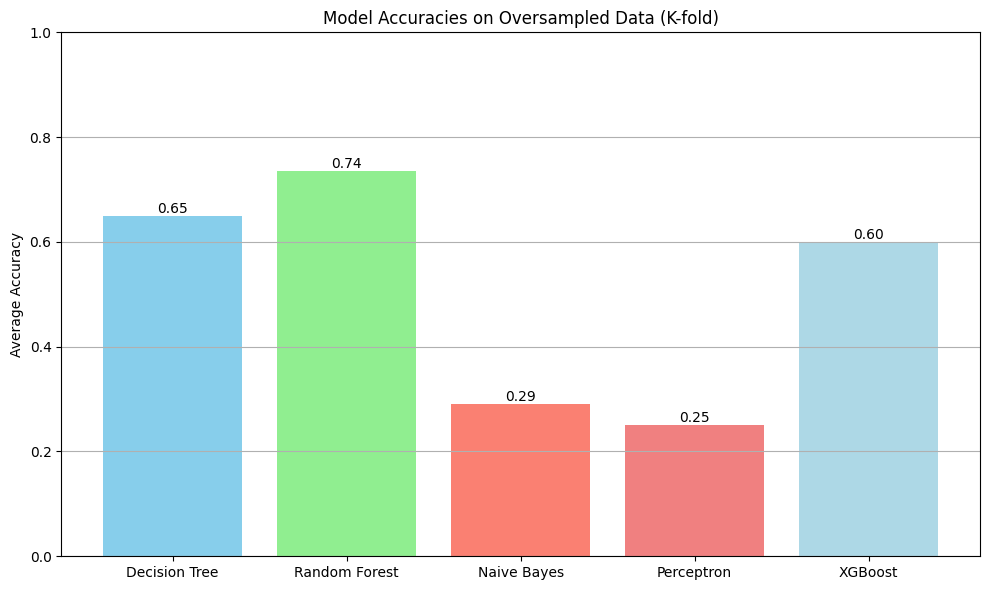

In [96]:
undersampled_results = all_results["oversampled"]
x_labels = []
accuracies = []
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue']  

# Loop through the classifiers and their accuracies
for name, result in undersampled_results["classifiers"].items():
    avg_accuracy = np.mean(result["accuracies"])
    x_labels.append(name)
    accuracies.append(avg_accuracy)

# Include XGBoost accuracies
for name, result in undersampled_results["classifiers_xgb"].items():
    avg_accuracy = np.mean(result["accuracies"])
    x_labels.append(name)
    accuracies.append(avg_accuracy)

plt.figure(figsize=(10, 6))
bars = plt.bar(x_labels, accuracies, color=colors[:len(x_labels)]) 

plt.ylabel('Average Accuracy')
plt.title('Model Accuracies on Oversampled Data (K-fold)')
plt.ylim(0, 1) 
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


## MLP

In [97]:
X_OS = df.loc[:, df.columns != 'CASE_STATUS']
y_OS = df['CASE_STATUS']
# print(y)

categorical_cols_OS = X_OS.select_dtypes(include=['object']).columns

label_encoders_OS = {}

for col in categorical_cols_OS:
    le_OS = LabelEncoder()
    X_OS.loc[:, col] = le_OS.fit_transform(X_OS[col].astype(str))  # Convert to string to handle any non-string values
    label_encoders_OS[col] = le_OS 

X_train_before_OS, X_test_OS, y_train_before_OS, y_test_OS = train_test_split(X_OS, y_OS, test_size=0.2, random_state=None)

# Now apply SMOTE to the encoded features
smote = SMOTE(random_state=None)
X_train_OS, y_train_OS = smote.fit_resample(X_train_before_OS, y_train_before_OS)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_OS).value_counts())

# Perform Min-Max Scaling
X_train_OS[columns_to_scale] = scaler.fit_transform(X_train_OS[columns_to_scale])  # Fit and transform on train data
X_test_OS[columns_to_scale] = scaler.transform(X_test_OS[columns_to_scale])  

X_train_minmax_OS = X_train_OS # Fit and transform on training data
X_test_minmax_OS = X_test_OS

Class distribution after SMOTE:
CASE_STATUS
3    95950
0    95950
1    95950
2    95950
Name: count, dtype: int64


### Grid search

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [ (256, 128), (256, 128, 64)],  # Vary number and size of layers
    'activation': ['relu', 'tanh'],                           # Different activation functions
    'solver': ['adam'],                                # Optimization algorithms
    'learning_rate_init': [1e-2, 0.1],                # Learning rate strategies
    # 'alpha': [0.0001, 0.001, 0.01],                           # Regularization strength
    'max_iter': [128, 256],                                   # Maximum iterations
    'batch_size': [64, 128, 256]
}


mlp = MLPClassifier(random_state=42)

grid_search = GridSearchCV(estimator=mlp,
                           param_grid=param_grid,
                           scoring='accuracy',   # Metric for evaluation
                           cv=3,                 # 3-fold cross-validation
                           verbose=2,            # Progress output
                           n_jobs=-1) 

grid_search.fit(X_train_US, y_train_US)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_US, y_test_US)
print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'activation': 'relu', 'batch_size': 256, 'hidden_layer_sizes': (256, 128, 64), 'learning_rate_init': 0.01, 'max_iter': 128, 'solver': 'adam'}
Best Cross-Validation Score: 0.5719415289185945
Test Accuracy with Best Hyperparameters: 0.5703


### undersampled

In [99]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

mlp_US =best_model
# X_train_US, X_test_US, y_train_US, y_test_US = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=None)
X_tmp=X_train_minmax_US
y_tmp=y_train_US
Xt_tmp=X_test_minmax_US
yt_tmp=y_test_US


# Reduce to 12 components
pca = PCA(n_components=12)
X_train_selected = pca.fit_transform(X_train_minmax_US)
X_test_selected = pca.transform(X_test_minmax_US)
X_train_minmax_US=X_train_selected
X_test_minmax_US=X_test_selected

# mlp_US = MLPClassifier(hidden_layer_sizes=(256, 128),  # 3 hidden layers with decreasing sizes
#                      activation='relu',                # Activation function for hidden layers
#                      solver='adam',                    # Optimization algorithm
#                      learning_rate_init=0.01,         # Adjust learning rate during training
#                      max_iter=100,                     # Maximum number of iterations
#                      random_state=42,
#                      batch_size=256)

accuracy_mlp_US, conf_matrix_mlp_US, class_report_mlp_US, unique_counts_mlp_US=evaluate_model(mlp_US, X_train_minmax_US, y_train_US, X_test_minmax_US, y_test_US)
X_train_minmax_US=X_tmp
y_train_US=y_tmp
X_test_minmax_US=Xt_tmp
y_test_US=yt_tmp


In [100]:
print(accuracy_mlp_US)

0.5703258462511863


In [101]:
# X_train_OS, X_test_OS, y_train_OS, y_test_OS = train_test_split(X_OS, y_OS, test_size=0.2, random_state=None)

mlp_OS = MLPClassifier(hidden_layer_sizes=(256, 128),  # 3 hidden layers with decreasing sizes
                     activation='relu',                # Activation function for hidden layers
                     solver='adam',                    # Optimization algorithm
                     learning_rate_init=0.01,         # Adjust learning rate during training
                     max_iter=100,                     # Maximum number of iterations
                     random_state=42,
                     batch_size=256)
# mlp_OS =best_model
accuracy_mlp_OS, conf_matrix_mlp_OS, class_report_mlp_OS, unique_counts_mlp_OS=evaluate_model(mlp_OS, X_train_minmax_OS, y_train_OS, X_test_OS, y_test_OS)

In [102]:
print(accuracy_mlp_OS)

0.15300486564678034


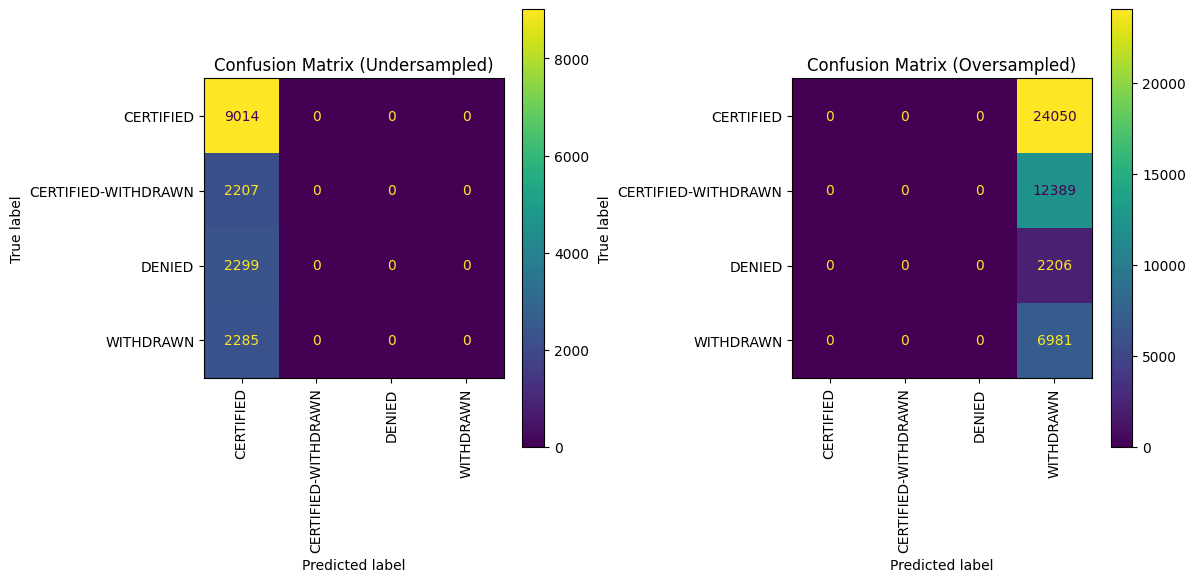

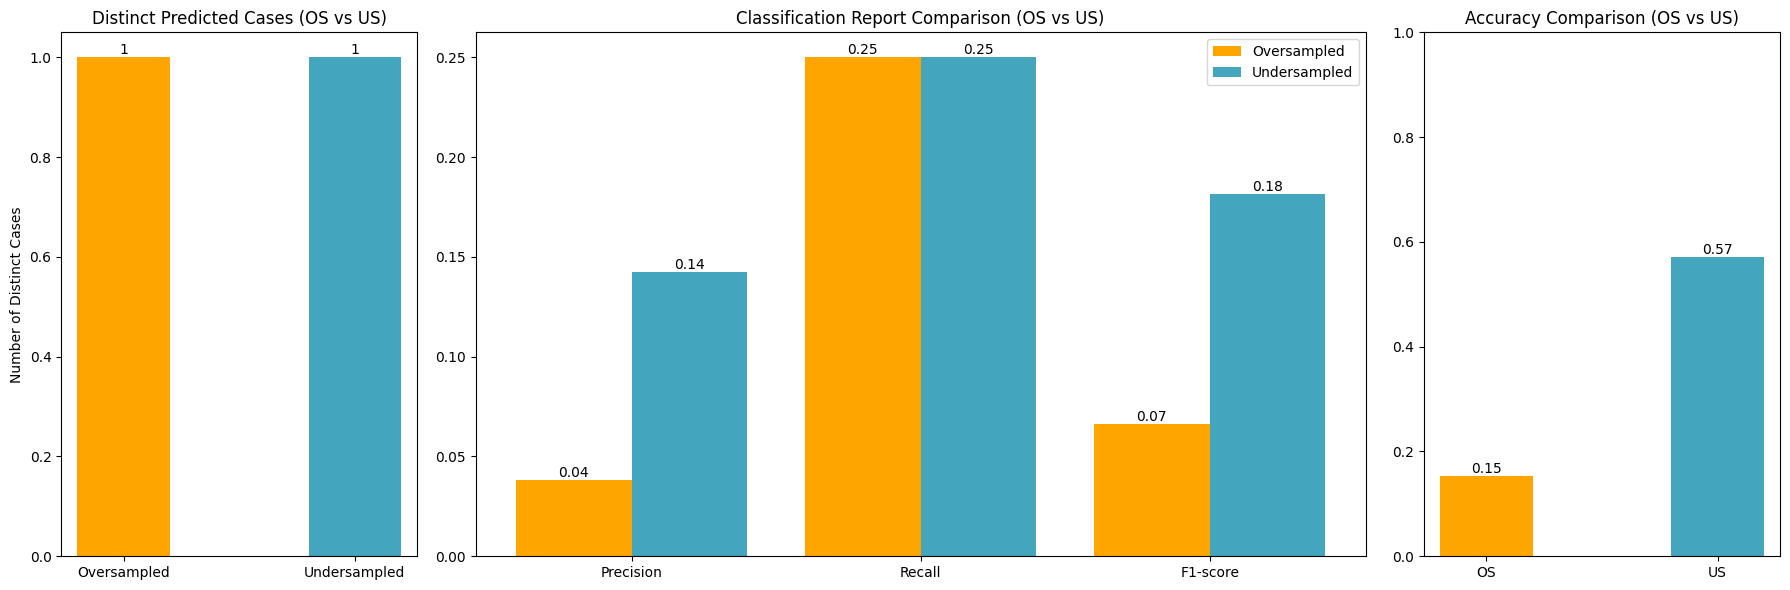

In [103]:
plot_classification_results(conf_matrix_mlp_OS, conf_matrix_mlp_US, 
                            class_report_mlp_OS, class_report_mlp_US, 
                            unique_counts_mlp_OS, unique_counts_mlp_US, 
                            accuracy_mlp_OS, accuracy_mlp_US, 
                            label_map)

## SVM

In [104]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# # Initialize SVM classifier
# # svm_US = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)

# param_grid = {
#     'C': [0.1, 1, 10, 100],            # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'], # Different kernel types
#     'gamma': ['scale', 'auto'],         # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
#     'degree': [2, 3, 4],                # Degree of polynomial kernel (only used if `kernel='poly'`)
# }

# svm = SVC(random_state=42)

# grid_search = GridSearchCV(estimator=svm,
#                            param_grid=param_grid,
#                            scoring='accuracy',   # Metric to evaluate performance
#                            cv=3,                 # 3-fold cross-validation
#                            verbose=2,            # Show progress
#                            n_jobs=-1)            # Use all available CPU cores

# grid_search.fit(X_train_US, y_train_US)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Score:", grid_search.best_score_)

# # Use the best estimator to make predictions
# best_svm = grid_search.best_estimator_
# y_pred_US = best_svm.predict(X_test_US)

# # Evaluate performance
# svm_accuracy_US = accuracy_score(y_test_US, y_pred_US)
# print(f"Test Set Accuracy: {svm_accuracy_US:.2f}")


# # accuracy_svm_US, conf_matrix_svm_US, class_report_svm_US, unique_counts_svm_US=evaluate_model(svm_US, X_train_minmax_US, y_train_US, X_test_minmax_US, y_test_US)

# # print(accuracy_svm_US)

In [105]:
# svm_US=best_svm
from sklearn.svm import SVC

svm_US = SVC(kernel='rbf', C=10, gamma='auto', decision_function_shape='ovo',random_state=42)
# svm_US=best_svm

accuracy_svm_US, conf_matrix_svm_US, class_report_svm_US, unique_counts_svm_US=evaluate_model(svm_US, X_train_minmax_US, y_train_US, X_test_minmax_US, y_test_US)

print(accuracy_svm_US)
print(unique_counts_svm_US)


0.6036697247706422
Predicted
0    14023
2      675
1      590
3      517
Name: count, dtype: int64


In [106]:
from sklearn.svm import SVC

# # Initialize SVM classifier
# svm_OS = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)

svm_OS = SVC(kernel='rbf', C=1, gamma='auto', decision_function_shape='ovo',  random_state=42)
X_train_minmax_OS = np.array(X_train_minmax_OS)
X_test_minmax_OS = np.array(X_test_minmax_OS)
y_train_OS = np.array(y_train_OS)
y_test_OS = np.array(y_test_OS)

accuracy_svm_OS, conf_matrix_svm_OS, class_report_svm_OS, unique_counts_svm_OS=evaluate_model(svm_OS, X_train_minmax_OS, y_train_OS, X_test_minmax_OS, y_test_OS)

print(accuracy_svm_OS)

0.36639196949107966


In [107]:
print(unique_counts_svm_OS)

Predicted
3    29913
0     9312
1     5369
2     1032
Name: count, dtype: int64


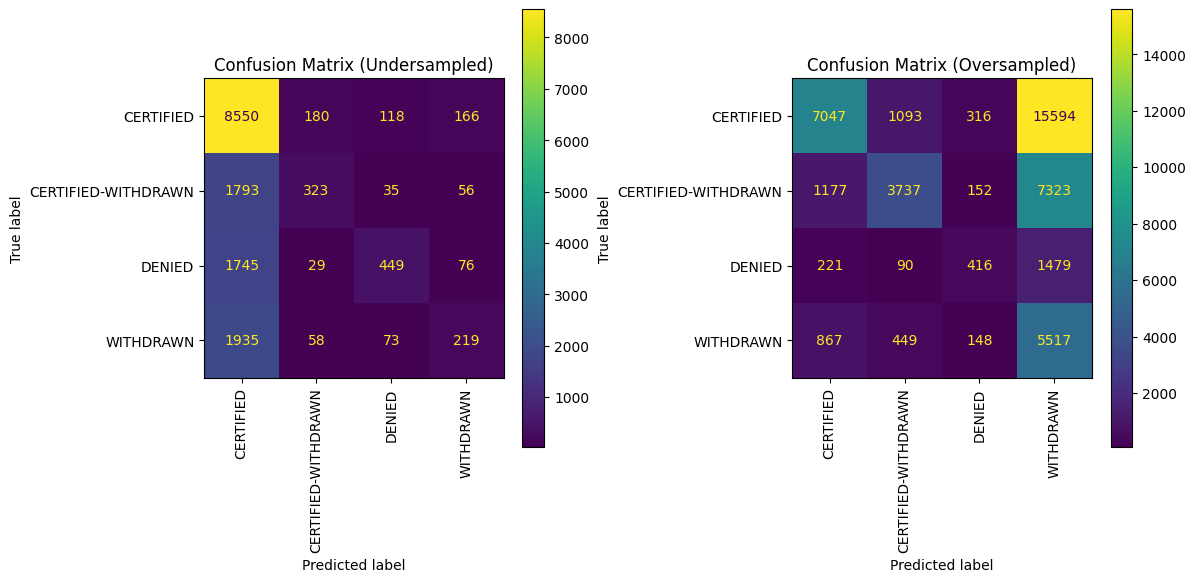

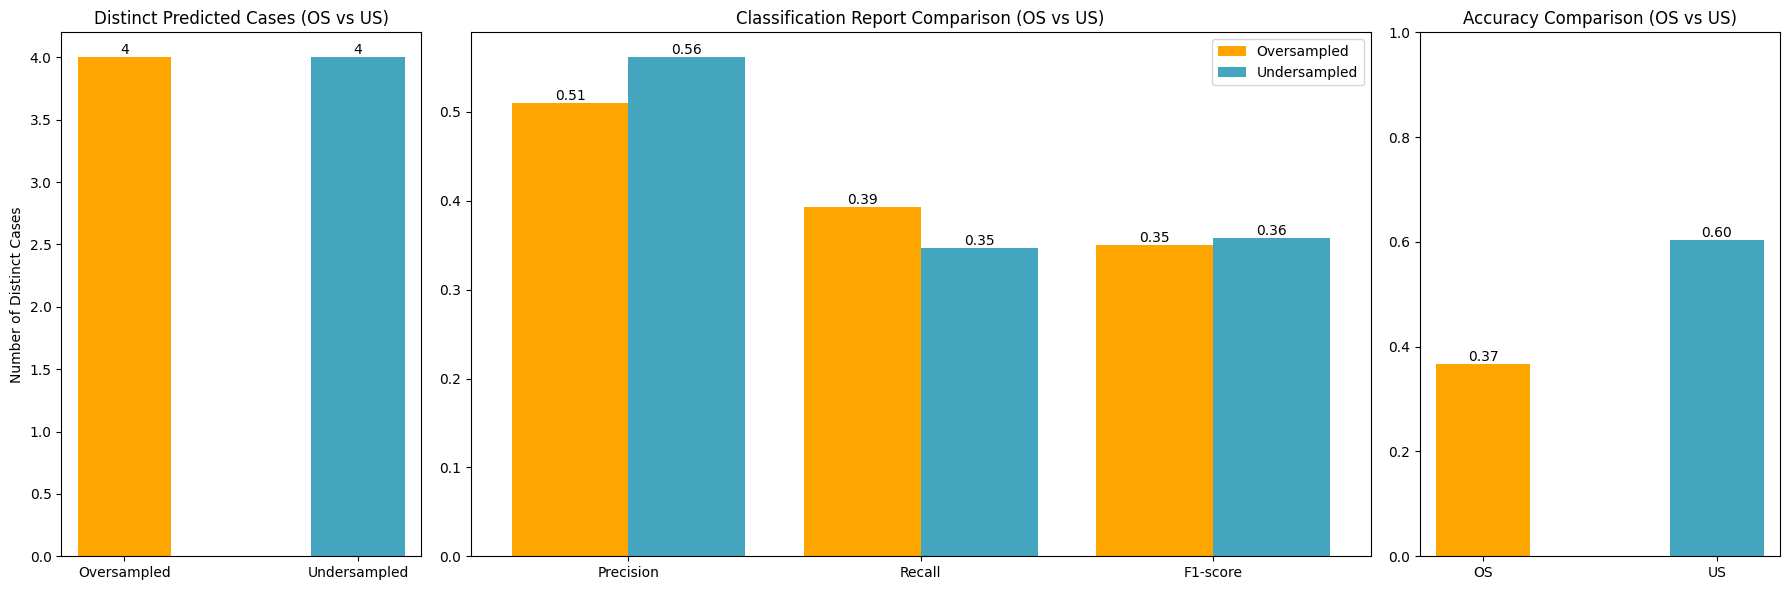

In [108]:
plot_classification_results(conf_matrix_svm_OS, conf_matrix_svm_US, 
                            class_report_svm_OS, class_report_svm_US, 
                            unique_counts_svm_OS, unique_counts_svm_US, 
                            accuracy_svm_OS, accuracy_svm_US, 
                            label_map)


In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.2],
    'max_depth': [5]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_US, y_train_US)

print("Best Parameters:", grid_search.best_params_)
best_gbc = grid_search.best_estimator_


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


In [110]:

# Instantiate the Gradient Boosting Classifier
# gbc_US = GradientBoostingClassifier(
#     n_estimators=100,  # Number of boosting stages
#     learning_rate=0.1,  # Shrinks the contribution of each tree
#     max_depth=3,       # Maximum depth of the individual trees
#     random_state=42    # For reproducibility
# )

gbc_US=best_gbc

# X_tmp=X_train_minmax_US
# y_tmp=y_train_US
# Xt_tmp=X_test_minmax_US
# yt_tmp=y_test_US
# selected_features_US=rfefunc(gbc_US, 12, X_train_minmax_US, y_train_US)
# Use `.iloc` for boolean indexing in a DataFrame
# X_train_minmax_US = X_train_minmax_US.iloc[:, selected_features_US]
# X_test_minmax_US = X_test_minmax_US.iloc[:, selected_features_US]
accuracy_gbc_US, conf_matrix_gbc_US, class_report_gbc_US, unique_counts_gbc_US=evaluate_model(gbc_US, X_train_minmax_US, y_train_US, X_test_minmax_US, y_test_US)
# X_train_minmax_US=X_tmp
# y_train_US=y_tmp
# X_test_minmax_US=Xt_tmp
# y_test_US=yt_tmp
print(accuracy_gbc_US)
print(unique_counts_gbc_US)


0.6336602341031319
Predicted
0    13255
2     1036
1      968
3      546
Name: count, dtype: int64


In [111]:
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import GradientBoostingClassifier

# # Example data
# data = {'VISA_CLASS': 'H-1B1', 'NEW_EMPLOYMENT': '0', 'CONTINUED_EMPLOYMENT': '0', 'CHANGE_PREVIOUS_EMPLOYMENT': '0', 'NEW_CONCURRENT_EMPLOYMENT': '0', 'CHANGE_EMPLOYER': '0', 'AMENDED_PETITION': '0', 'EMPLOYER_NAME': 'adsf', 'SOC_CODE': '15-1199', 'JOB_TITLE': 'adf', 'AGENT_REPRESENTING_EMPLOYER': '0', 'WILLFUL_VIOLATOR': '0', 'H-1B_DEPENDENT': '0', 'TOTAL_WORKER_POSITIONS': '1.0', 'FULL_TIME_POSITION': '0', 'PREVAILING_WAGE_1': '69701.0', 'WORKSITE': 'NEW YORK', 'lat': '62.165726', 'lng': '-113.948051', 'COLI': '1341'}

# # Columns to scale
# columns_to_scale = ['PREVAILING_WAGE_1', 'COLI']

# # Create DataFrame
# df_tmp2 = pd.DataFrame([data])

# # Ensure numeric columns are treated as numeric
# df_tmp2[columns_to_scale] = df_tmp2[columns_to_scale].apply(pd.to_numeric, errors='coerce')

# # Select all columns except 'CASE_STATUS'
# X_normal_tc = df_tmp2.loc[:, df_tmp2.columns != 'CASE_STATUS']

# # Identify categorical columns
# categorical_columns = X_normal_tc.select_dtypes(include=['object']).columns

# # Initialize OneHotEncoder
# onehotencoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# # Apply OneHotEncoder to categorical features
# X_categorical_encoded = onehotencoder.fit_transform(X_normal_tc[categorical_columns])

# # Create a DataFrame from the encoded features
# encoded_feature_names = onehotencoder.get_feature_names_out(categorical_columns)
# X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=encoded_feature_names)

# # Drop the original categorical columns and merge encoded features
# X_normal_tc = X_normal_tc.drop(categorical_columns, axis=1).reset_index(drop=True)
# X_normal_tc = pd.concat([X_normal_tc, X_categorical_encoded_df.reset_index(drop=True)], axis=1)

# # Initialize and fit MinMaxScaler for numeric columns
# scaler = MinMaxScaler()
# X_normal_tc[columns_to_scale] = scaler.fit_transform(X_normal_tc[columns_to_scale])

# # Simulating model prediction
# # Replace with your trained GradientBoostingClassifier
# # gbc_US = GradientBoostingClassifier()
# # gbc_US.fit(np.random.rand(10, X_normal_tc.shape[1]), np.random.randint(0, 2, 10))  # Dummy training

# # Predict
# res = gbc_US.predict(X_normal_tc)

# # Output
# print("Original Dictionary:")
# print(data)
# print("\nTransformed Features:")
# print(X_normal_tc)
# print("\nPrediction Result:")
# print(res)


In [112]:

# # Instantiate the Gradient Boosting Classifier
# gbc_OS= GradientBoostingClassifier(
#     n_estimators=100,  # Number of boosting stages
#     learning_rate=0.1,  # Shrinks the contribution of each tree
#     max_depth=3,       # Maximum depth of the individual trees
#     random_state=42    # For reproducibility
# )

gbc_OS=best_gbc
accuracy_gbc_OS, conf_matrix_gbc_OS, class_report_gbc_OS, unique_counts_gbc_OS=evaluate_model(gbc_OS, X_train_minmax_OS, y_train_OS, X_test_minmax_OS, y_test_OS)

print(accuracy_gbc_OS)
print(unique_counts_gbc_OS)


0.6134879235523605
Predicted
0    32566
1     8995
3     2668
2     1397
Name: count, dtype: int64


In [113]:
print(best_gbc)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200,
                           random_state=42)


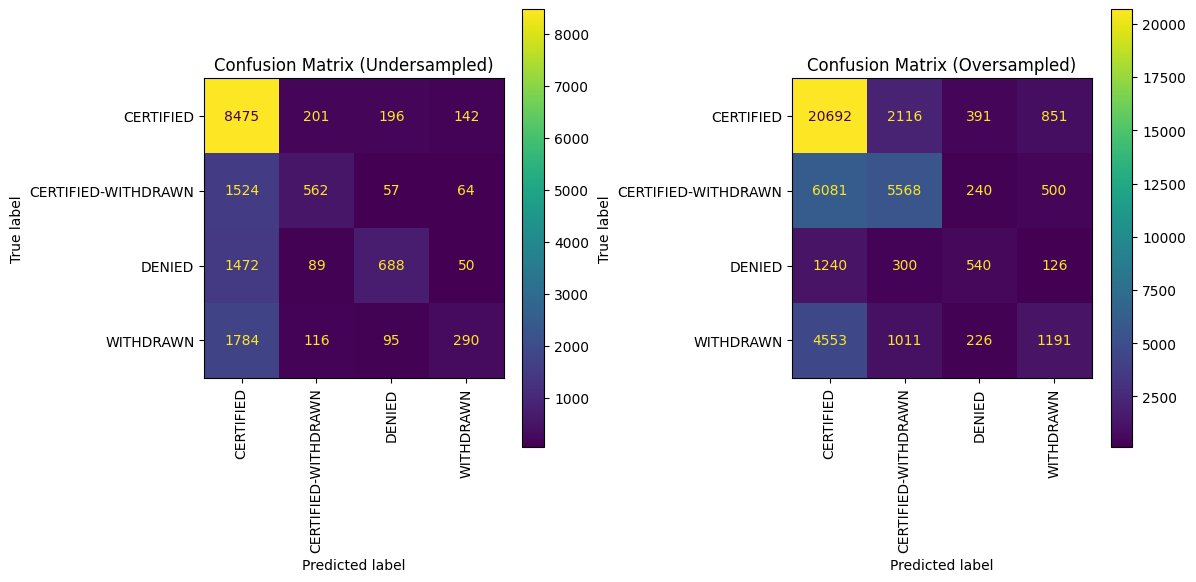

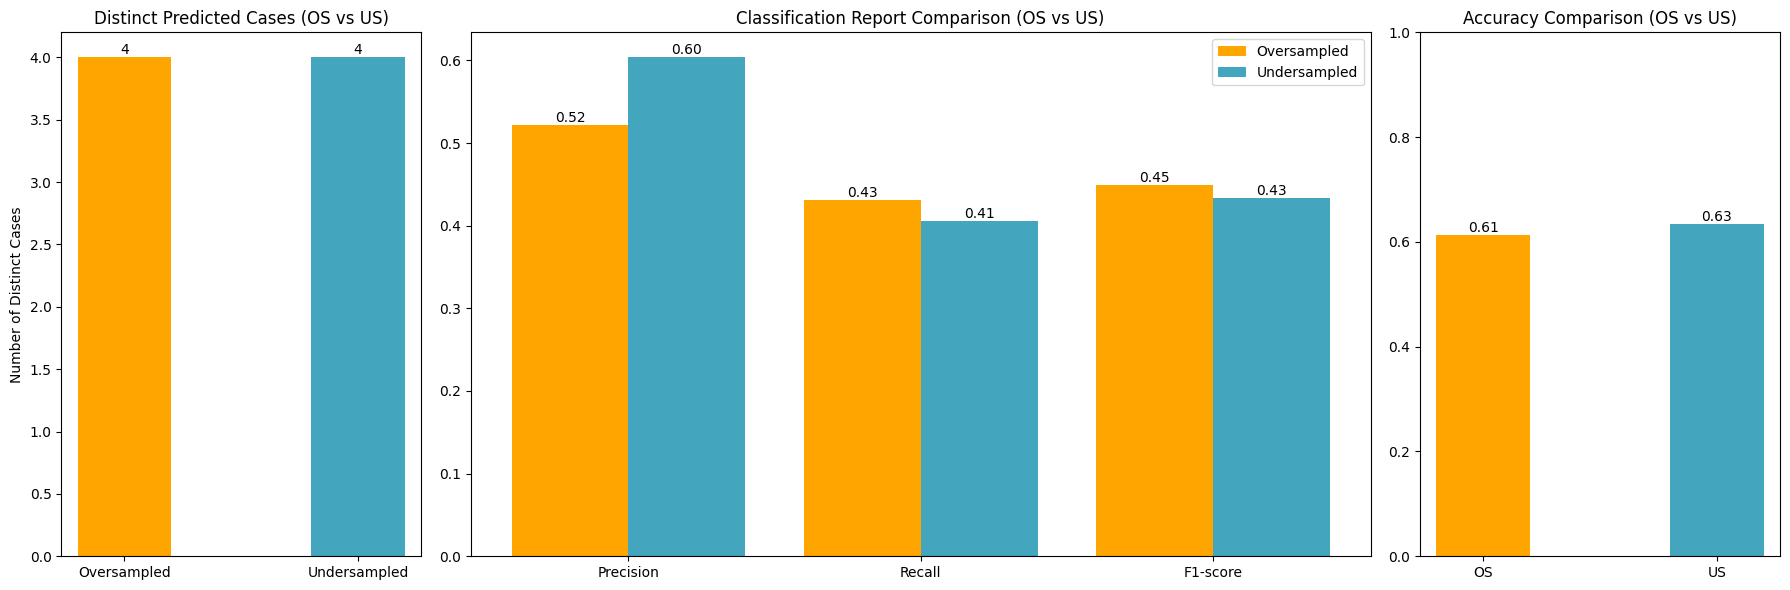

In [114]:
plot_classification_results(conf_matrix_gbc_OS, conf_matrix_gbc_US, 
                            class_report_gbc_OS, class_report_gbc_US, 
                            unique_counts_gbc_OS, unique_counts_gbc_US, 
                            accuracy_gbc_OS, accuracy_gbc_US, 
                            label_map)

In [115]:
import pickle

# Assuming you have a trained model, for example, an MLP model
# ml_model is the trained model (e.g., MLPClassifier, RandomForestClassifier, etc.)
ml_model = gbc_US

# Save the model to a file using pickle
with open('ml_model.pkl', 'wb') as file:
    pickle.dump(ml_model, file)

print("Model saved successfully!")


Model saved successfully!


In [116]:
def evaluate_model2(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    predictions_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })
    unique_counts = predictions_df['Predicted'].value_counts()
    return accuracy, conf_matrix, class_report, unique_counts, y_pred


In [117]:
from sklearn.mixture import GaussianMixture

param_grid = {
    'n_components': [2, 3, 4, 5, 6],  # Number of components (clusters)
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'max_iter': [100, 200, 300],  # Maximum iterations
    # 'tol': [1e-3, 1e-4],  # Convergence tolerance
    'init_params': ['kmeans']  # Initialization methods
}
# Initialize GaussianMixture model
gm_model = GaussianMixture(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gm_model,
                           param_grid=param_grid,
                           scoring='accuracy',  # You can change this depending on your goal
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1,  # Use all available CPUs for parallel processing
                           verbose=1)  # To see the progress

# Fit the grid search
grid_search.fit(X_train_minmax_OS, y_train_OS)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")
best_gm_model = grid_search.best_estimator_

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameters: {'covariance_type': 'diag', 'init_params': 'kmeans', 'max_iter': 100, 'n_components': 2}
Best cross-validation score: 0.24975177175455818


In [118]:
# Initialize GaussianMixture model
gm_US = best_gm_model

accuracy_gm_US, conf_matrix_gm_US, class_report_gm_US, unique_counts_gm_US , y_pred_gm_US = evaluate_model2(gm_US, X_train_minmax_US, y_train_US, X_test_minmax_US, y_test_US)

print(accuracy_gm_US)
print(unique_counts_gm_US)

0.15292628914900347
Predicted
1    15152
0      653
Name: count, dtype: int64


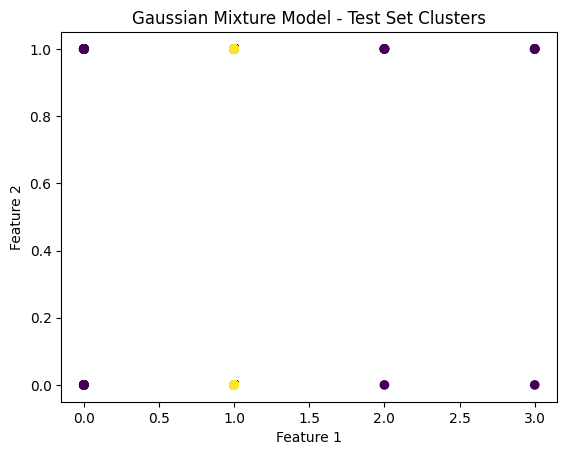

In [119]:
import matplotlib.pyplot as plt

# Ensure that X_test_minmax_US is a NumPy array
X_test_minmax_US = X_test_minmax_US.values if isinstance(X_test_minmax_US, pd.DataFrame) else X_test_minmax_US

# Plot the first two features (if X_test_minmax_US has more than 2 features)
plt.scatter(X_test_minmax_US[:, 0], X_test_minmax_US[:, 1], c=y_pred_gm_US, cmap='viridis', marker='o')
plt.title('Gaussian Mixture Model - Test Set Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [120]:
# Initialize GaussianMixture model
gm_OS = best_gm_model

accuracy_gm_OS, conf_matrix_gm_OS, class_report_gm_OS, unique_counts_gm_OS , y_pred_gm_OS= evaluate_model2(gm_OS, X_train_minmax_OS, y_train_OS, X_test_minmax_OS, y_test_OS)

print(accuracy_gm_OS)
print(unique_counts_gm_OS)


0.5177530355499057
Predicted
0    44419
1     1207
Name: count, dtype: int64


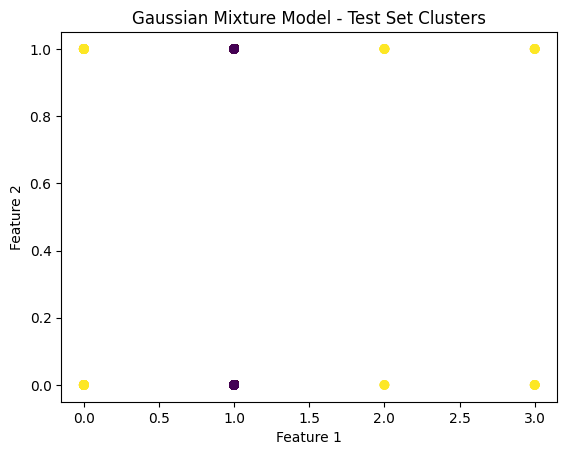

In [121]:
import matplotlib.pyplot as plt
X_test_minmax_OS = X_test_minmax_OS.values if isinstance(X_test_minmax_OS, pd.DataFrame) else X_test_minmax_OS

# Plot the first two features (if X_train_minmax_OS has more than 2 features)
plt.scatter(X_test_minmax_OS[:, 0], X_test_minmax_OS[:, 1], c=y_pred_gm_OS, cmap='viridis', marker='o')
plt.title('Gaussian Mixture Model - Test Set Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


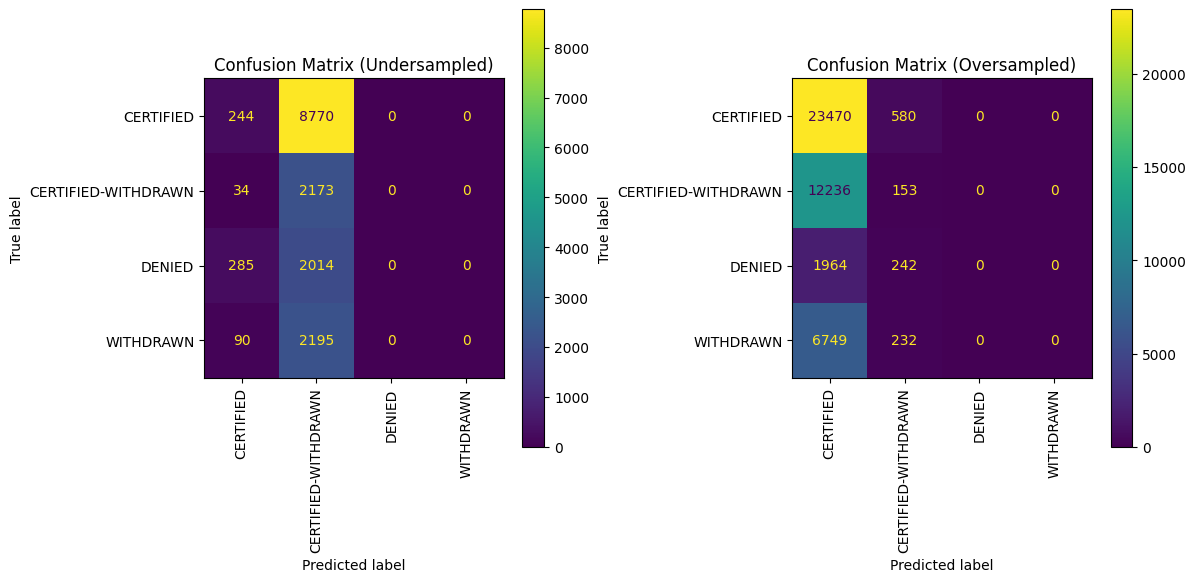

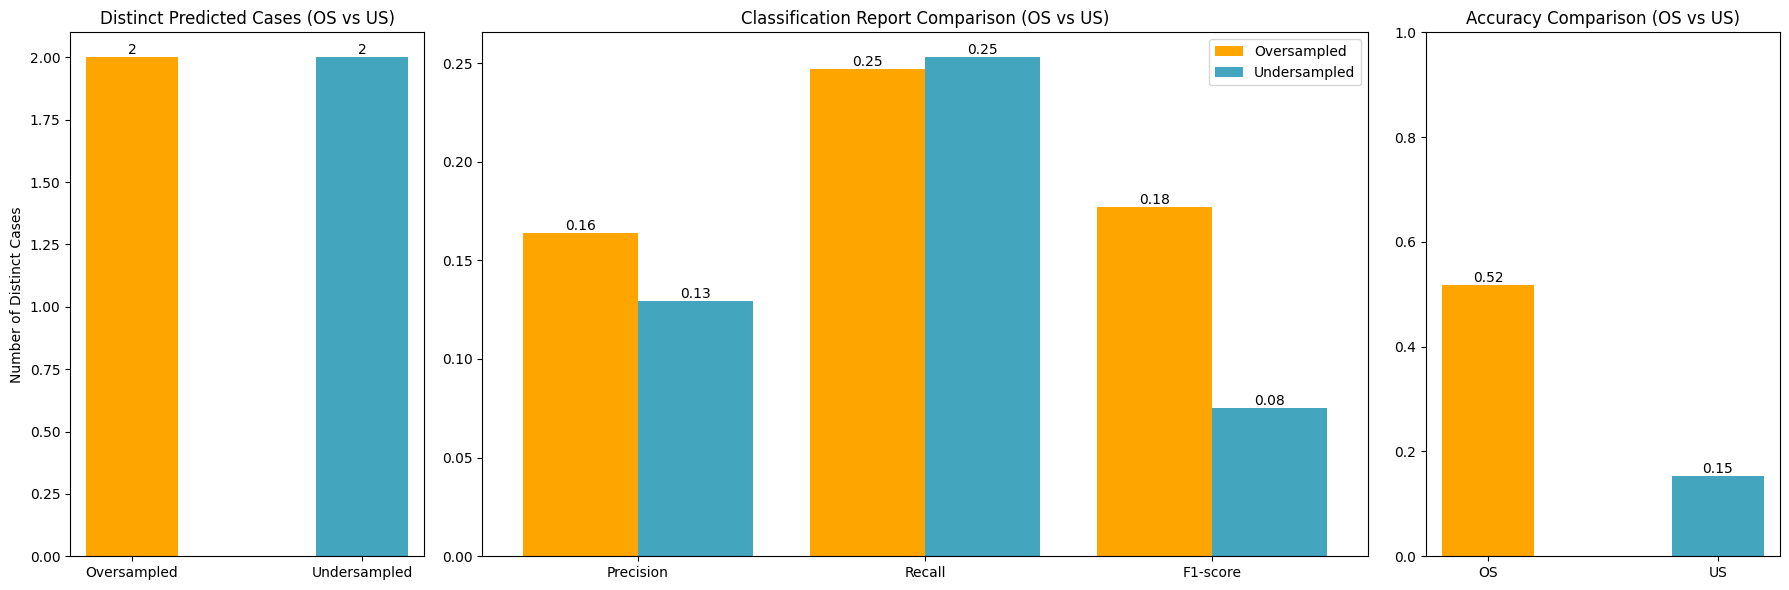

In [122]:
plot_classification_results(
    conf_matrix_gm_OS, conf_matrix_gm_US, 
    class_report_gm_OS, class_report_gm_US, 
    unique_counts_gm_OS, unique_counts_gm_US, 
    accuracy_gm_OS, accuracy_gm_US, 
    label_map
)

In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

def evaluate_model2(model, X_train):
    # Fit the model
    model.fit(X_train)
    
    # For clustering, there's no y_train or y_test, but we can calculate clustering quality metrics
    labels = model.labels_
    
    # Calculate silhouette score to evaluate the clustering performance
    silhouette_avg = silhouette_score(X_train, labels, metric='euclidean')
    
    # Count the number of samples in each cluster
    predictions_df = pd.DataFrame({'Cluster': labels})
    unique_counts = predictions_df['Cluster'].value_counts()
    
    return silhouette_avg, unique_counts, labels, model.cluster_centers_

# KMeans clustering
k_means_dict_OS = {}  # cluster size : model outputs
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)

    # Evaluate KMeans model
    silhouette_avg, unique_counts, labels, centers = evaluate_model2(kmeans, X_train_minmax_OS)
    k_means_dict_OS[f'cl_size_{i}'] = (silhouette_avg, unique_counts, labels, centers)
    # Output results
    print("For Cluster size == ", i)
    print("Silhouette Score:", silhouette_avg)
    print("Cluster counts:", unique_counts)
    # print("Cluster centers:", centers)
    print("Accuracy == ", accuracy_score(y_train_OS, labels)*100)
    print("\n")


For Cluster size ==  2
Silhouette Score: 0.4187767492454434
Cluster counts: Cluster
0    217783
1    166017
Name: count, dtype: int64
Accuracy ==  24.423658155289214


For Cluster size ==  3
Silhouette Score: 0.38737995400395714
Cluster counts: Cluster
0    180686
2    104720
1     98394
Name: count, dtype: int64
Accuracy ==  27.112558624283484


For Cluster size ==  4
Silhouette Score: 0.3983261111349035
Cluster counts: Cluster
0    118850
2    100526
3     93456
1     70968
Name: count, dtype: int64
Accuracy ==  25.443981240229284


For Cluster size ==  5
Silhouette Score: 0.38698641327054395
Cluster counts: Cluster
4    111661
1     85397
2     66324
0     63165
3     57253
Name: count, dtype: int64
Accuracy ==  17.760812923397605


For Cluster size ==  6
Silhouette Score: 0.3827641286086015
Cluster counts: Cluster
4    87236
5    62725
2    61726
0    61003
3    56621
1    54489
Name: count, dtype: int64
Accuracy ==  15.656070870244921


For Cluster size ==  7
Silhouette Score: 0.3

In [124]:
k_means_dict_US = {}  # cluster size : model outputs
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)

    # Evaluate KMeans model
    silhouette_avg, unique_counts, labels, centers = evaluate_model2(kmeans, X_train_minmax_US)
    k_means_dict_US[f'cl_size_{i}'] = (silhouette_avg, unique_counts, labels, centers)
    # Output results
    print("For Cluster size == ", i)
    print("Silhouette Score:", silhouette_avg)
    print("Cluster counts:", unique_counts)
    # print("Cluster centers:", centers)
    print("Accuracy == ", accuracy_score(y_train_US, labels)*100)
    print("\n")


For Cluster size ==  2
Silhouette Score: 0.34446054332172155
Cluster counts: Cluster
1    34830
0    28388
Name: count, dtype: int64
Accuracy ==  32.24239931665032


For Cluster size ==  3
Silhouette Score: 0.3899053329430478
Cluster counts: Cluster
1    23496
0    21866
2    17856
Name: count, dtype: int64
Accuracy ==  28.888924040621344


For Cluster size ==  4
Silhouette Score: 0.4094307952784935
Cluster counts: Cluster
2    20015
0    16303
1    15312
3    11588
Name: count, dtype: int64
Accuracy ==  23.507545319371065


For Cluster size ==  5
Silhouette Score: 0.37150008111624955
Cluster counts: Cluster
3    14591
2    13814
4    11841
1    11575
0    11397
Name: count, dtype: int64
Accuracy ==  18.184694232655257


For Cluster size ==  6
Silhouette Score: 0.3490239726863061
Cluster counts: Cluster
4    12766
2    11927
1    11615
5     9481
3     9146
0     8283
Name: count, dtype: int64
Accuracy ==  14.707836375715777


For Cluster size ==  7
Silhouette Score: 0.3599627818676144

In [125]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score

for cluster_size in k_means_dict_OS.keys():

    print(cluster_size)
    labels_ = k_means_dict_OS[cluster_size][2]
    silhouette_ = k_means_dict_OS[cluster_size][0]
    print("Classification Report:")
    print(f"Silhouette Score (Training Set): {silhouette_}")
    print("Accuracy == ", accuracy_score(y_train_OS, labels_)*100)
    print(classification_report(y_train_OS, labels_, zero_division=0))


cl_size_2
Classification Report:
Silhouette Score (Training Set): 0.4187767492454434
Accuracy ==  24.423658155289214
              precision    recall  f1-score   support

           0       0.26      0.58      0.36     95950
           1       0.23      0.39      0.29     95950
           2       0.00      0.00      0.00     95950
           3       0.00      0.00      0.00     95950

    accuracy                           0.24    383800
   macro avg       0.12      0.24      0.16    383800
weighted avg       0.12      0.24      0.16    383800

cl_size_3
Classification Report:
Silhouette Score (Training Set): 0.38737995400395714
Accuracy ==  27.112558624283484
              precision    recall  f1-score   support

           0       0.27      0.51      0.35     95950
           1       0.26      0.27      0.26     95950
           2       0.28      0.31      0.29     95950
           3       0.00      0.00      0.00     95950

    accuracy                           0.27    383800
   m

In [126]:
for cluster_size in k_means_dict_US.keys():

    print(cluster_size)
    labels_ = k_means_dict_US[cluster_size][2]
    silhouette_ = k_means_dict_US[cluster_size][0]
    print("Classification Report:")
    print(f"Silhouette Score (Training Set): {silhouette_}")
    print("Accuracy == ", accuracy_score(y_train_US, labels_)*100)
    print(classification_report(y_train_US, labels_, zero_division=0))

cl_size_2
Classification Report:
Silhouette Score (Training Set): 0.34446054332172155
Accuracy ==  32.24239931665032
              precision    recall  f1-score   support

           0       0.55      0.43      0.49     36142
           1       0.13      0.52      0.21      9082
           2       0.00      0.00      0.00      8990
           3       0.00      0.00      0.00      9004

    accuracy                           0.32     63218
   macro avg       0.17      0.24      0.18     63218
weighted avg       0.34      0.32      0.31     63218

cl_size_3
Classification Report:
Silhouette Score (Training Set): 0.3899053329430478
Accuracy ==  28.888924040621344
              precision    recall  f1-score   support

           0       0.55      0.33      0.41     36142
           1       0.14      0.37      0.20      9082
           2       0.17      0.33      0.22      8990
           3       0.00      0.00      0.00      9004

    accuracy                           0.29     63218
   ma

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Define hyperparameter grid
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid_search.fit(X_train_minmax_US, y_train_US)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score: 0.5683507494884901


In [128]:
KNN_US = KNeighborsClassifier(n_neighbors=40, weights= 'distance', metric= 'manhattan', p=1, n_jobs=-1, algorithm='kd_tree')
accuracy_knn_US, conf_matrix_knn_US, class_report_knn_US, unique_counts_knn_US=evaluate_model(KNN_US, X_train_minmax_US, y_train_US, X_test_minmax_US, y_test_US)

print(accuracy_knn_US)


c:\Users\acer\Desktop\ML_Project\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.6006327111673521


In [129]:
tmp_X_train_minmax_OS = np.array(X_train_minmax_OS)
tmp_y_train_OS = np.array(y_train_OS)
tmp_X_test_minmax_OS = np.array(X_test_minmax_OS)
tmp_y_test_OS = np.array(y_test_OS)
KNN_OS = KNeighborsClassifier(n_neighbors=2, weights= 'uniform', metric= 'manhattan', p=1, n_jobs=-1, algorithm='auto')
# KNN_OS = grid_search.best_estimator_
accuracy_knn_OS, conf_matrix_knn_OS, class_report_knn_OS, unique_counts_knn_OS=evaluate_model(KNN_OS, tmp_X_train_minmax_OS, tmp_y_train_OS, tmp_X_test_minmax_OS, tmp_y_test_OS)

print(accuracy_knn_OS)


0.5373252093104809


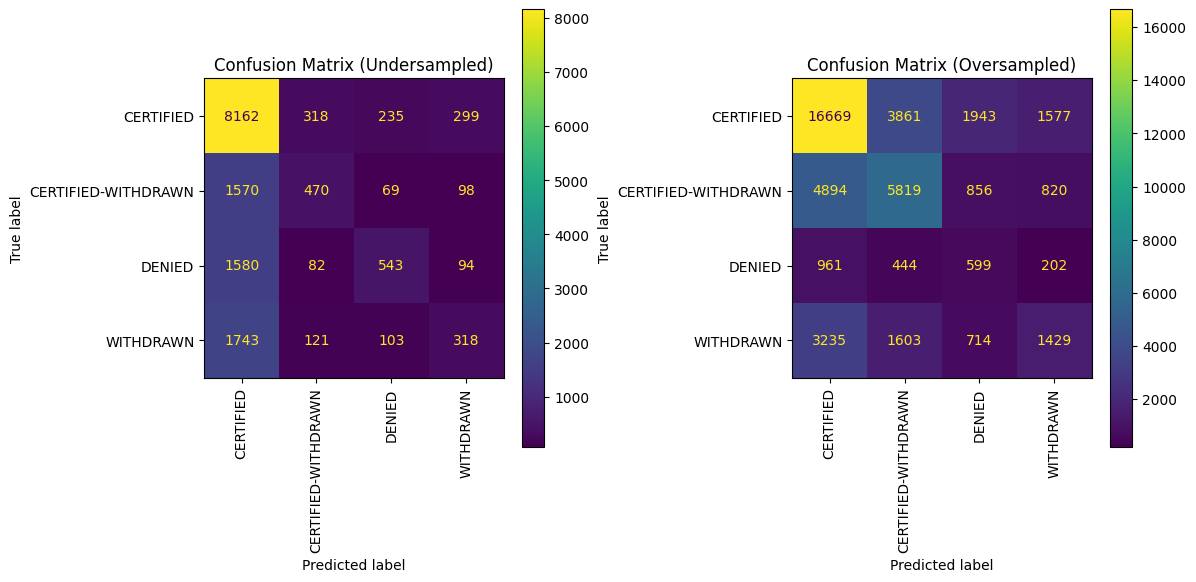

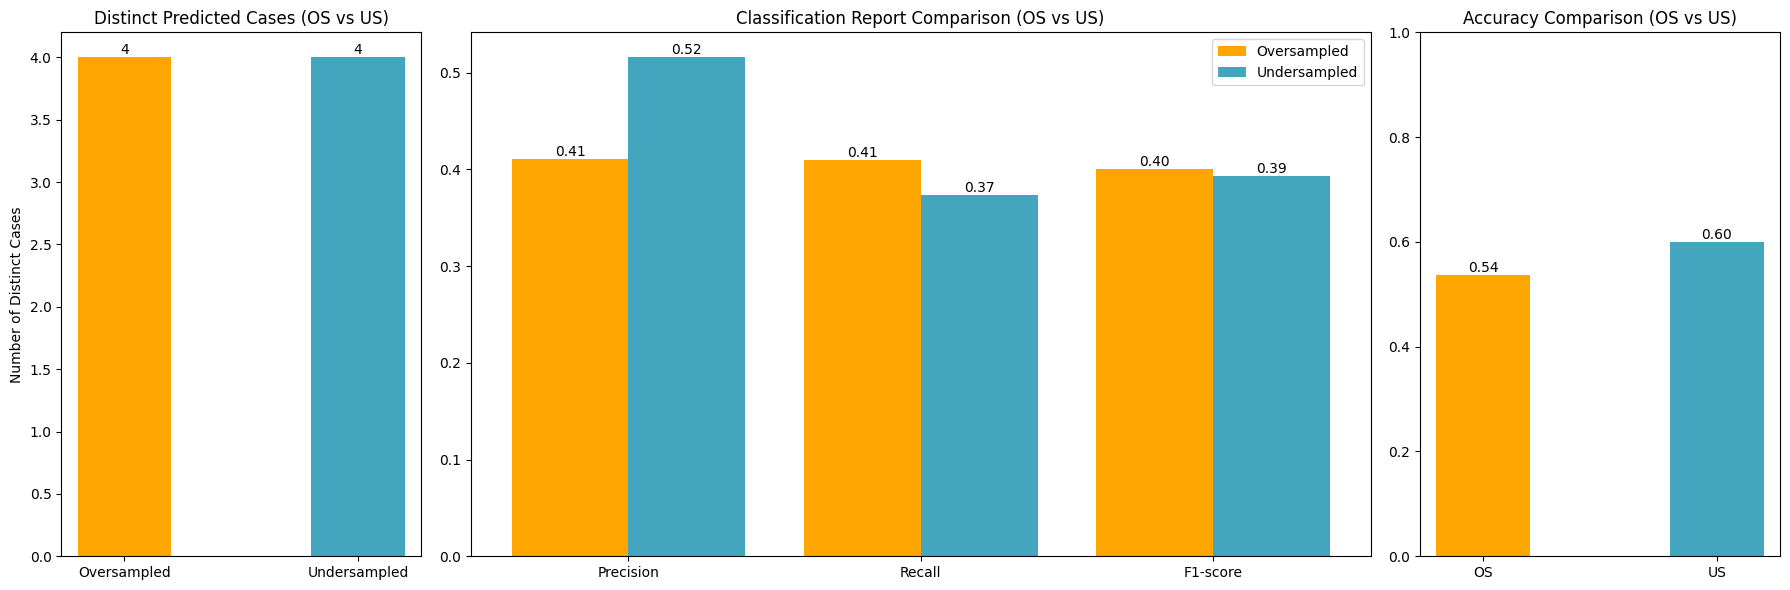

In [130]:
plot_classification_results(conf_matrix_knn_OS, conf_matrix_knn_US, 
                            class_report_knn_OS, class_report_knn_US, 
                            unique_counts_knn_OS, unique_counts_knn_US, 
                            accuracy_knn_OS, accuracy_knn_US, 
                            label_map)


In [131]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from keras.regularizers import l2
from keras.optimizers import Adam

from sklearn.preprocessing import OneHotEncoder



num_classes = 4
# Create a CNN model
def create_cnn_model(input_shape):
    model = Sequential()

    model.add(Input(shape=input_shape))
    # First convolutional layer
    model.add(Conv1D(1024, 5, activation='relu'))
    # model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(2))

    # Second convolutional layer
    model.add(Conv1D(512, 5, activation='relu'))
    model.add(MaxPooling1D(3))

    # Flatten the output
    model.add(Flatten())

    # Dense layers
    # model.add(Dense(256, activation='relu'))
    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Change this depending on your problem (sigmoid for binary, softmax for multi-class)

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Change loss for multi-class
    return model




In [132]:
# One-hot encoding the labels
from tensorflow.keras.utils import to_categorical

y_train_US_onehot = to_categorical(y_train_US, num_classes=num_classes)
y_test_US_onehot = to_categorical(y_test_US, num_classes=num_classes)

# Check if the objects are DataFrames or NumPy arrays
if isinstance(X_train_minmax_US, pd.DataFrame):
    X_train_minmax_US_cnn = X_train_minmax_US.to_numpy().reshape(X_train_minmax_US.shape[0], X_train_minmax_US.shape[1], 1)
else:
    X_train_minmax_US_cnn = X_train_minmax_US.reshape(X_train_minmax_US.shape[0], X_train_minmax_US.shape[1], 1)

if isinstance(X_test_minmax_US, pd.DataFrame):
    X_test_minmax_US_cnn = X_test_minmax_US.to_numpy().reshape(X_test_minmax_US.shape[0], X_test_minmax_US.shape[1], 1)
else:
    X_test_minmax_US_cnn = X_test_minmax_US.reshape(X_test_minmax_US.shape[0], X_test_minmax_US.shape[1], 1)

# Check the shape of the data
print("Train data shape:", X_train_minmax_US_cnn.shape)
print("Test data shape:", X_test_minmax_US_cnn.shape)

# Create the model
input_shape = X_train_minmax_US_cnn.shape[1:]  # (num_features, 1)
cnn_model_US = create_cnn_model(input_shape)

# Train the model
history_US = cnn_model_US.fit(
    X_train_minmax_US_cnn, y_train_US_onehot,
    validation_data=(X_test_minmax_US_cnn, y_test_US_onehot),
    epochs=20,
    batch_size=64,
    verbose=1
)


Train data shape: (63218, 20, 1)
Test data shape: (15805, 20, 1)
Epoch 1/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.5246 - loss: 71.7710 - val_accuracy: 0.5703 - val_loss: 4.0023
Epoch 2/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.5719 - loss: 3.7563 - val_accuracy: 0.5703 - val_loss: 3.1597
Epoch 3/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.5728 - loss: 3.0068 - val_accuracy: 0.5703 - val_loss: 2.6135
Epoch 4/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.5704 - loss: 2.5040 - val_accuracy: 0.5703 - val_loss: 2.1998
Epoch 5/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.5722 - loss: 2.1087 - val_accuracy: 0.5703 - val_loss: 1.8614
Epoch 6/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.5722 - loss: 1.7849 - val_accuracy: 0.5703 - val_loss: 1.5862
Epoch 7/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.5711 - loss: 1.5276 - val_accuracy: 0.5703 - val_loss: 1.3808
Epoch 8/20
988/988 ━━━━━

In [133]:
# Evaluate the model on the test set
loss, accuracy_cnn_US = cnn_model_US.evaluate(X_test_minmax_US_cnn, y_test_US_onehot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 1.1554
Test Accuracy: 0.5230


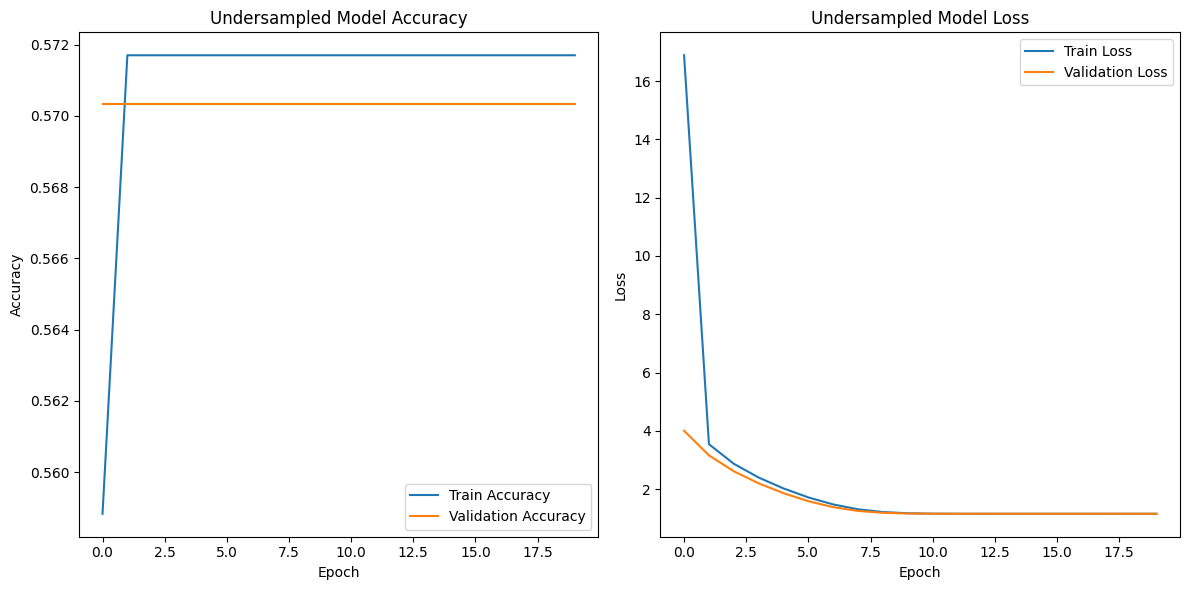

In [134]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_US.history['accuracy'], label='Train Accuracy')
plt.plot(history_US.history['val_accuracy'], label='Validation Accuracy')
plt.title('Undersampled Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_US.history['loss'], label='Train Loss')
plt.plot(history_US.history['val_loss'], label='Validation Loss')
plt.title('Undersampled Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [135]:
# X_train_minmax_OS_cnn = np.array(X_train_minmax_OS, dtype=np.float32)
# X_test_minmax_OS_cnn = np.array(X_test_minmax_OS, dtype=np.float32)
X_train_minmax_OS_cnn = np.array(X_train_minmax_OS, dtype=np.float32).reshape(
    X_train_minmax_OS.shape[0], X_train_minmax_OS.shape[1], 1
)
X_test_minmax_OS_cnn = np.array(X_test_minmax_OS, dtype=np.float32).reshape(
    X_test_minmax_OS.shape[0], X_test_minmax_OS.shape[1], 1
)
y_train_OS_onehot = np.array(y_train_OS, dtype=np.float32)
y_test_OS_onehot = np.array(y_test_OS, dtype=np.float32)
y_train_OS_onehot = to_categorical(y_train_OS, num_classes=num_classes)
y_test_OS_onehot = to_categorical(y_test_OS, num_classes=num_classes)
# X_train_minmax_OS_cnn = X_train_minmax_OS.to_numpy().reshape(X_train_minmax_OS.shape[0], X_train_minmax_OS.shape[1], 1)
# X_test_minmax_OS_cnn = X_test_minmax_OS.to_numpy().reshape(X_test_minmax_OS.shape[0], X_test_minmax_OS.shape[1], 1)
# X_train_minmax_US_cnn = X_train_minmax_US.reshape(X_train_minmax_US.shape[0], X_train_minmax_US.shape[1], 1)
# X_test_US_cnn = X_test_minmax_US.reshape(X_test_minmax_US.shape[0], X_test_minmax_US.shape[1], 1)
print(X_train_minmax_OS_cnn.dtype)
print(X_test_minmax_OS_cnn.dtype)
print(y_train_OS_onehot.dtype)
print(y_test_OS_onehot.dtype)

# Check the shape of the data
print(X_train_minmax_OS_cnn.shape)

# Create the model
input_shape = X_train_minmax_OS_cnn.shape[1:]  # (num_features, 1)
cnn_model_OS = create_cnn_model(input_shape)

# Train the model
history_OS = cnn_model_OS.fit(
    X_train_minmax_OS_cnn, y_train_OS_onehot,
    validation_data=(X_test_minmax_OS_cnn, y_test_OS_onehot),
    epochs=20,
    batch_size=512,
    verbose=1
)

float32
float32
float64
float64
(383800, 20, 1)
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 94s 124ms/step - accuracy: 0.2504 - loss: 158.3084 - val_accuracy: 0.2713 - val_loss: 4.8904
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 92s 123ms/step - accuracy: 0.2486 - loss: 4.7090 - val_accuracy: 0.5271 - val_loss: 4.2214
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 92s 123ms/step - accuracy: 0.2487 - loss: 4.0896 - val_accuracy: 0.2715 - val_loss: 3.7107
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 93s 125ms/step - accuracy: 0.2499 - loss: 3.5962 - val_accuracy: 0.1530 - val_loss: 3.2808
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 92s 123ms/step - accuracy: 0.2488 - loss: 3.1750 - val_accuracy: 0.0483 - val_loss: 2.8942
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 92s 122ms/step - accuracy: 0.2497 - loss: 2.8062 - val_accuracy: 0.1530 - val_loss: 2.5579
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 92s 123ms/step - accuracy: 0.2503 - loss: 2.4826 - val_accuracy: 0.2715 - val_loss: 2.2678
Epoch 8/20
750/750 ━━━━━━━━━━━━━━

In [136]:
# Evaluate the model on the test set
loss, accuracy_cnn_OS = cnn_model_OS.evaluate(X_test_minmax_OS_cnn, y_test_OS_onehot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 1.3896
Test Accuracy: 0.5230


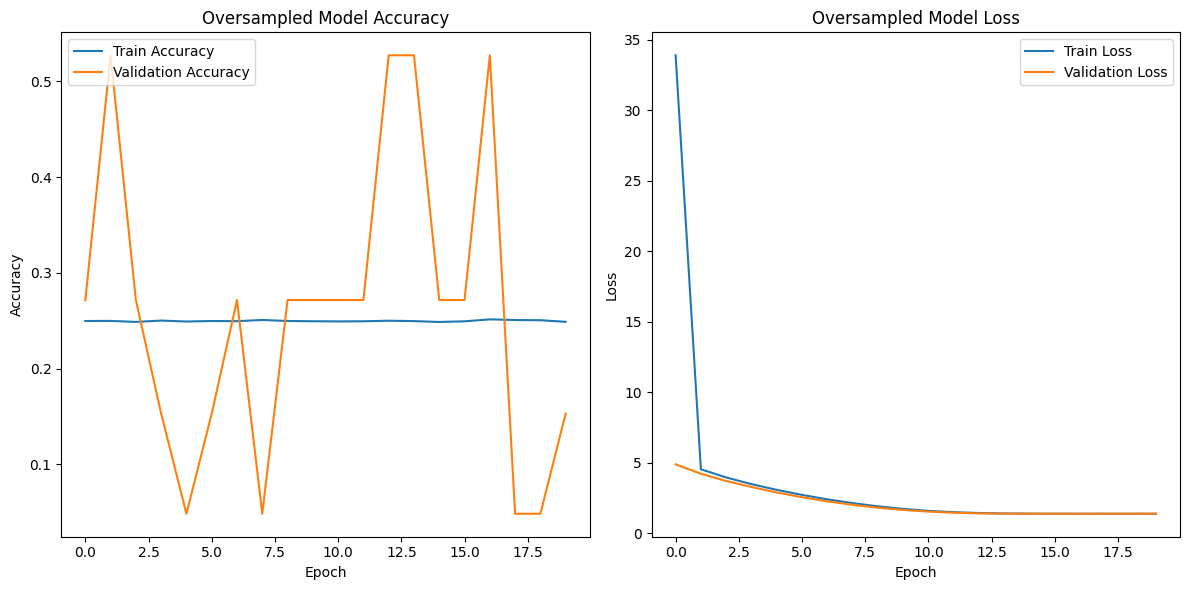

In [137]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_OS.history['accuracy'], label='Train Accuracy')
plt.plot(history_OS.history['val_accuracy'], label='Validation Accuracy')
plt.title('Oversampled Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_OS.history['loss'], label='Train Loss')
plt.plot(history_OS.history['val_loss'], label='Validation Loss')
plt.title('Oversampled Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


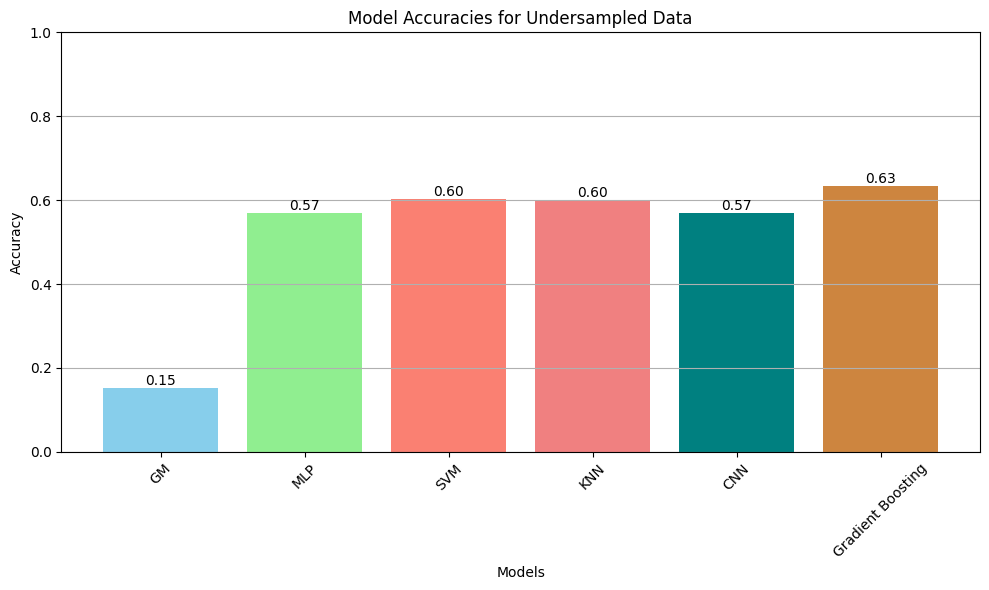

In [144]:
after_midsem_accuracies_US = {
    'GM' : accuracy_gm_US,
    'MLP': accuracy_mlp_US,
    'SVM': accuracy_svm_US,  
    'KNN': accuracy_knn_US,      
    'CNN': accuracy_cnn_US,
    'Gradient Boosting' : accuracy_gbc_US, 
}

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(after_midsem_accuracies_US)), after_midsem_accuracies_US.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'teal', 'peru'])

plt.xticks(range(len(after_midsem_accuracies_US)), after_midsem_accuracies_US.keys(), rotation=45)
plt.title('Model Accuracies for Undersampled Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.grid(axis='y')

# Display the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout() 
plt.show()

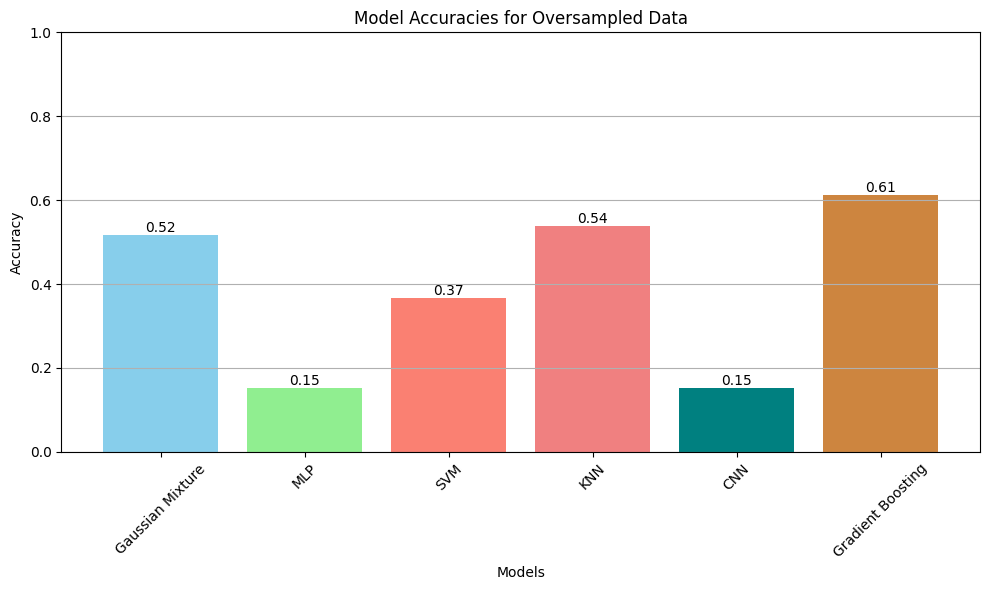

In [145]:
after_midsem_accuracies_OS = {
    'Gaussian Mixture' : accuracy_gm_OS,
    'MLP': accuracy_mlp_OS,
    'SVM': accuracy_svm_OS,  
    'KNN': accuracy_knn_OS,      
    'CNN': accuracy_cnn_OS, 
    'Gradient Boosting' : accuracy_gbc_OS
}

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(after_midsem_accuracies_OS)), after_midsem_accuracies_OS.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'teal', 'peru'])

plt.xticks(range(len(after_midsem_accuracies_OS)), after_midsem_accuracies_OS.keys(), rotation=45)
plt.title('Model Accuracies for Oversampled Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.grid(axis='y')

# Display the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout() 
plt.show()